# Download of GPS time series
This notebook collects GPS data given a lat-long box

In [2]:
# import modules
import requests, zipfile, io, gzip, glob, os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

Collect information about the GPS site location

In [25]:
# read csv file
gps_loc = pd.read_csv("gps_locations.csv",usecols=['station','latitude','longitude','elevation'],
    dtype={'latitude': np.float64, 'longitude': np.float64,'elevation':np.float64})
print(gps_loc)

     station   latitude   longitude    elevation
0       AB01  52.209503 -174.204758    25.483989
1       AB02  52.970604 -168.854671   192.803423
2       AB04  63.656863 -170.567443   136.547210
3       AB06  54.885321 -163.423455   500.432692
4       AB07  55.349275 -160.476760    89.571502
...      ...        ...         ...          ...
1805    WWAY -81.577000  -28.402700  1195.388000
1806    YBRA  45.122100 -109.267400  2072.518000
1807    YESX  28.378336 -108.919639  1506.487003
1808    YMER  77.432895  -24.326329  1070.068249
1809    YUMX  32.027692 -115.199203   -30.200000

[1810 rows x 4 columns]


In [26]:
# Pick a station
stalist = "AB01"
# index of the station chosen
ista=gps_loc[gps_loc["station"]==stalist].index.values.astype('int64')[0]

In [42]:
# OR select within a lat long box
latmin = 35.
latmax = 36.
longmin = -120.
longmax = -119.
ik=gps_loc[ (gps_loc["latitude"]>=latmin )& (gps_loc["latitude"]<latmax ) & (gps_loc["longitude"]>=longmin )& (gps_loc["longitude"]<longmax )].index.values.astype('int64')
# 

In [43]:
stalist = gps_loc["station"].iloc[ik].values.tolist()
print(stalist)
print(len(stalist))
print(stalist[0])

['BVPP', 'P522', 'P537', 'P543', 'P544', 'P545', 'P547', 'P563', 'P564', 'P565', 'P809', 'P810']
12
BVPP


## download data
Build URLs and download from the FTP server.

In [44]:
# initialize nested lists
df=[]
for ista,sta in enumerate(stalist):
    dfsta=[]
    print("Downloading and processing " + sta )
    
    
    # what's the lat long el
    iista=gps_loc[gps_loc["station"]==sta].index.values.astype('int64')[0]
    lat=gps_loc["latitude"].iloc[iista]
    lon=gps_loc["longitude"].iloc[iista]
    el=gps_loc["elevation"].iloc[iista]
    
    
    file_url="http://geodesy.unr.edu/gps_timeseries/tenv/IGS14/"+ sta + ".tenv"
    r = requests.get(file_url).text.splitlines()  # download, read text, split lines into a list
    ue=[];un=[];uv=[];se=[];sn=[];sv=[];date=[];date_year=[]
    for iday in r:  # this loops through the days of data
        crap=iday.split()
        if len(crap)<10:continue
        date.append((crap[1]))
        date_year.append(float(crap[2]))
        ue.append(float(crap[6])*1000)
        un.append(float(crap[7])*1000)
        uv.append(float(crap[8])*1000)
    #             # errors
        se.append(float(crap[10])*1000)
        sn.append(float(crap[11])*1000)
        sv.append(float(crap[12])*1000)

          # make dataframe
        crap={'station':sta,'latitude':lat,'longitude':lon,'elevation':el,'date':date,'date_year':date_year,'east':ue,'north':un,'up':uv}
        if len(df)==0:
            df = pd.DataFrame(crap, columns = ['station', 'latitude', 'longitude','elevation', 'date','date_year','east','north','up'])
        else:
            df=pd.concat([df,pd.DataFrame(crap, columns = ['station', 'date','date_year','east','north','up'])])
        if len(dfsta)==0:
            dfsta = pd.DataFrame(crap, columns = ['station', 'latitude', 'longitude','elevation', 'date','date_year','east','north','up'])
        else:
            dfstadf=pd.concat([dfsta,pd.DataFrame(crap, columns = ['station', 'latitude', 'longitude','elevation','date','date_year','east','north','up'])])

        
    dfsta.to_csv("gps_"+sta+".csv")



['BVPP', '02FEB02', '2002.0890', '52307', '1151', '6', '0.000000', '0.000000', '0.000000', '0.0083', '0.000762', '0.000880', '0.002953', '-0.016630', '-0.009367', '-0.126274']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '02FEB03', '2002.0917', '52308', '1152', '0', '-0.001551', '0.000974', '-0.007234', '0.0083', '0.000747', '0.000882', '0.002957', '0.011396', '-0.017445', '-0.159747']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '02FEB04', '2002.0945', '52309', '1152', '1', '-0.001286', '0.002112', '-0.004908', '0.0083', '0.000763', '0.000897', '0.003023', '0.022162', '-0.023742', '-0.165179']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.

0  0.0  
['BVPP', '02MAR14', '2002.1985', '52347', '1157', '4', '-0.005466', '0.000550', '-0.002697', '0.0083', '0.000752', '0.000866', '0.003049', '0.032079', '0.012568', '-0.135771']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '02MAR15', '2002.2012', '52348', '1157', '5', '-0.004200', '0.000287', '-0.003677', '0.0083', '0.000771', '0.000874', '0.003055', '0.011698', '-0.000184', '-0.102308']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '02MAR16', '2002.2040', '52349', '1157', '6', '-0.004852', '0.003035', '-0.002007', '0.0083', '0.000754', '0.000877', '0.003091', '0.037386', '-0.002474', '-0.145571']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34

0  0.0  
['BVPP', '02MAY08', '2002.3491', '52402', '1165', '3', '-0.012159', '0.001312', '0.001996', '0.0083', '0.000751', '0.000909', '0.003121', '0.089174', '-0.035351', '-0.110742']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '02MAY09', '2002.3518', '52403', '1165', '4', '-0.010614', '0.002959', '0.003257', '0.0083', '0.000746', '0.000895', '0.003073', '0.084298', '-0.052822', '-0.112976']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '02MAY11', '2002.3573', '52405', '1165', '6', '-0.009617', '0.002163', '0.004693', '0.0083', '0.000745', '0.000890', '0.003019', '0.090243', '-0.065130', '-0.107399']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.3475

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '02JUN22', '2002.4723', '52447', '1171', '6', '-0.012791', '0.002073', '0.005923', '0.0083', '0.000754', '0.000878', '0.003005', '0.028211', '-0.028409', '-0.116199']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '02JUN23', '2002.4750', '52448', '1172', '0', '-0.012572', '0.002380', '0.003998', '0.0083', '0.000746', '0.000895', '0.003061', '0.033303', '-0.015169', '-0.132164']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '02JUN24', '2002.4778', '52449', '1172', '1', '-0.014495', '0.000434', '0.005337', '0.0083', '0.000738', '0.

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '02JUL26', '2002.5654', '52481', '1176', '5', '-0.013981', '0.000285', '-0.000683', '0.0083', '0.000764', '0.000944', '0.003109', '-0.021439', '-0.007045', '-0.061695']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '02JUL27', '2002.5681', '52482', '1176', '6', '-0.017612', '-0.000174', '-0.004629', '0.0083', '0.000742', '0.000928', '0.003094', '0.011215', '-0.018713', '-0.105045']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '02JUL28', '2002.5708', '52483', '1177', '0', '-0.017558', '-0.001119', '-0.002484', '0.0083', '0.000773

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '02AUG29', '2002.6585', '52515', '1181', '4', '-0.017634', '-0.001569', '0.001368', '0.0083', '0.000744', '0.000887', '0.003074', '0.032430', '-0.050692', '-0.136768']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '02AUG30', '2002.6612', '52516', '1181', '5', '-0.022019', '0.001139', '-0.003499', '0.0083', '0.000782', '0.000936', '0.003228', '0.076562', '-0.043697', '-0.127380']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '02AUG31', '2002.6639', '52517', '1181', '6', '-0.018502', '0.000366', '-0.004637', '0.0083', '0.000826', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '02OCT01', '2002.7488', '52548', '1186', '2', '-0.019043', '-0.002247', '0.002016', '0.0083', '0.000756', '0.000937', '0.003058', '0.056002', '-0.049242', '-0.049587']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '02OCT02', '2002.7515', '52549', '1186', '3', '-0.015401', '0.000617', '0.011930', '0.0083', '0.000762', '0.000945', '0.003092', '0.043467', '-0.072715', '-0.020190']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '02OCT03', '2002.7543', '52550', '1186', '4', '-0.012296', '0.003472', '0.015859', '0.0083', '0.000778', '0

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '02NOV02', '2002.8364', '52580', '1190', '6', '-0.017876', '0.006323', '0.005900', '0.0083', '0.000801', '0.000933', '0.003197', '0.068751', '-0.012553', '-0.086596']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '02NOV03', '2002.8392', '52581', '1191', '0', '-0.019044', '0.002234', '0.007266', '0.0083', '0.000781', '0.000896', '0.003050', '0.046601', '-0.008166', '-0.049682']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '02NOV04', '2002.8419', '52582', '1191', '1', '-0.016074', '0.000813', '0.015866', '0.0083', '0.000749', '0.

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '02DEC03', '2002.9213', '52611', '1195', '2', '-0.017138', '0.006271', '0.002625', '0.0083', '0.000780', '0.000950', '0.003147', '0.059522', '-0.033096', '-0.065454']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '02DEC04', '2002.9240', '52612', '1195', '3', '-0.017931', '0.007418', '0.007103', '0.0083', '0.000819', '0.000969', '0.003264', '0.058209', '0.000563', '-0.058744']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '02DEC05', '2002.9268', '52613', '1195', '4', '-0.017686', '0.007441', '0.007759', '0.0083', '0.000783', '0.0

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '02DEC28', '2002.9897', '52636', '1198', '6', '-0.024222', '0.004307', '-0.005568', '0.0083', '0.000827', '0.000965', '0.003272', '0.067945', '-0.042900', '-0.130253']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '02DEC29', '2002.9925', '52637', '1199', '0', '-0.026383', '0.005763', '0.003006', '0.0083', '0.000844', '0.000965', '0.003389', '0.056097', '-0.010012', '-0.140059']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '02DEC30', '2002.9952', '52638', '1199', '1', '-0.024348', '0.004431', '-0.000032', '0.0083', '0.000808', '

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '03JAN21', '2003.0554', '52660', '1202', '2', '-0.031909', '0.004185', '-0.001914', '0.0083', '0.000795', '0.000943', '0.003141', '0.032996', '-0.066505', '-0.094381']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '03JAN22', '2003.0582', '52661', '1202', '3', '-0.027487', '0.007043', '0.001401', '0.0083', '0.000777', '0.000936', '0.003138', '0.071368', '-0.070241', '-0.118713']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '03JAN23', '2003.0609', '52662', '1202', '4', '-0.025968', '0.007271', '0.014821', '0.0083', '0.000794', '0

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '03MAR02', '2003.1650', '52700', '1208', '0', '-0.029884', '0.006997', '0.006720', '0.0083', '0.000785', '0.000963', '0.003204', '0.069936', '-0.049251', '-0.038678']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '03MAR03', '2003.1677', '52701', '1208', '1', '-0.030368', '0.006893', '0.010463', '0.0083', '0.000771', '0.000940', '0.003119', '0.067624', '-0.030525', '-0.055595']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '03MAR04', '2003.1704', '52702', '1208', '2', '-0.031012', '0.005789', '0.013671', '0.0083', '0.000785', '0.

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '03APR12', '2003.2772', '52741', '1213', '6', '-0.034783', '0.007271', '0.006511', '0.0083', '0.000759', '0.000921', '0.003157', '0.027210', '-0.033899', '-0.103296']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '03APR13', '2003.2799', '52742', '1214', '0', '-0.032384', '0.008259', '0.013040', '0.0083', '0.000752', '0.000931', '0.003151', '0.023735', '-0.027225', '-0.094200']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '03APR14', '2003.2827', '52743', '1214', '1', '-0.034074', '0.005624', '0.012371', '0.0083', '0.000755', '0.

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '03MAY18', '2003.3758', '52777', '1219', '0', '-0.033723', '0.006869', '0.011138', '0.0083', '0.000718', '0.000896', '0.003024', '0.042111', '-0.065445', '-0.071194']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '03MAY19', '2003.3785', '52778', '1219', '1', '-0.035908', '0.004466', '0.010213', '0.0083', '0.000713', '0.000894', '0.002957', '0.056156', '-0.014741', '-0.099525']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '03MAY20', '2003.3812', '52779', '1219', '2', '-0.035616', '0.005739', '0.003950', '0.0083', '0.000727', '0.

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '03JUN21', '2003.4689', '52811', '1223', '6', '-0.038666', '0.003531', '0.006567', '0.0083', '0.000738', '0.000885', '0.003037', '0.012909', '0.038402', '-0.119968']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '03JUN22', '2003.4716', '52812', '1224', '0', '-0.040907', '0.004409', '0.006687', '0.0083', '0.000718', '0.000865', '0.002949', '0.041776', '-0.011778', '-0.125393']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '03JUN23', '2003.4743', '52813', '1224', '1', '-0.041526', '0.004042', '0.015540', '0.0083', '0.000720', '0.0

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '03JUL23', '2003.5565', '52843', '1228', '3', '-0.042912', '0.001934', '0.004170', '0.0083', '0.000711', '0.000902', '0.002984', '0.053744', '-0.018522', '-0.085890']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '03JUL24', '2003.5592', '52844', '1228', '4', '-0.042270', '0.003615', '0.008796', '0.0083', '0.000720', '0.000888', '0.003008', '0.022523', '0.018755', '-0.100242']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '03JUL25', '2003.5619', '52845', '1228', '5', '-0.045366', '0.003230', '0.002664', '0.0083', '0.000738', '0.0

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '03AUG27', '2003.6523', '52878', '1233', '3', '-0.043538', '0.004872', '0.014459', '0.0083', '0.000735', '0.000871', '0.003013', '0.004111', '-0.020786', '-0.107267']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '03AUG28', '2003.6550', '52879', '1233', '4', '-0.043445', '0.004559', '0.008445', '0.0083', '0.000755', '0.000892', '0.003094', '0.070022', '-0.064756', '-0.116410']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '03AUG29', '2003.6578', '52880', '1233', '5', '-0.043106', '0.005619', '0.005640', '0.0083', '0.000736', '0.

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '03SEP29', '2003.7426', '52911', '1238', '1', '-0.047536', '0.005490', '0.009170', '0.0083', '0.000781', '0.000925', '0.003117', '-0.004957', '-0.034278', '-0.131758']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '03SEP30', '2003.7454', '52912', '1238', '2', '-0.047139', '0.006771', '0.011016', '0.0083', '0.000776', '0.000929', '0.003132', '0.024552', '-0.047195', '-0.122704']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '03OCT01', '2003.7481', '52913', '1238', '3', '-0.046602', '0.005579', '0.008635', '0.0083', '0.000791', '0

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '03OCT29', '2003.8248', '52941', '1242', '3', '-0.049831', '0.005664', '0.008559', '0.0083', '0.000781', '0.000945', '0.003216', '0.108684', '-0.056156', '-0.141592']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '03OCT30', '2003.8275', '52942', '1242', '4', '-0.052069', '0.004608', '0.001733', '0.0083', '0.000827', '0.000993', '0.003419', '0.053519', '-0.059195', '-0.069963']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '03OCT31', '2003.8303', '52943', '1242', '5', '-0.046348', '0.007200', '0.004398', '0.0083', '0.000736', '0.

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '03NOV25', '2003.8987', '52968', '1246', '2', '-0.052181', '0.004146', '0.007483', '0.0083', '0.000758', '0.000921', '0.003007', '0.050662', '-0.049047', '-0.047245']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '03NOV26', '2003.9014', '52969', '1246', '3', '-0.048753', '0.007576', '0.012791', '0.0083', '0.000733', '0.000861', '0.002878', '0.036505', '-0.008879', '-0.084633']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '03NOV27', '2003.9042', '52970', '1246', '4', '-0.049042', '0.009748', '0.006270', '0.0083', '0.000725', '0.

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '03DEC21', '2003.9699', '52994', '1250', '0', '-0.051756', '0.009487', '0.005304', '0.0083', '0.000756', '0.000907', '0.003067', '0.027559', '-0.019079', '-0.132434']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '03DEC22', '2003.9726', '52995', '1250', '1', '-0.050318', '0.011000', '0.005804', '0.0083', '0.000735', '0.000884', '0.002979', '0.057617', '-0.015003', '-0.117293']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '03DEC23', '2003.9754', '52996', '1250', '2', '-0.053114', '0.008966', '0.003724', '0.0083', '0.000746', '0.

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '04JAN25', '2004.0657', '53029', '1255', '0', '-0.056248', '0.006584', '0.000922', '0.0083', '0.000698', '0.000845', '0.002873', '0.035481', '-0.035768', '-0.136600']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '04JAN26', '2004.0684', '53030', '1255', '1', '-0.054473', '0.009371', '0.011036', '0.0083', '0.000696', '0.000838', '0.002873', '0.029105', '0.005425', '-0.143885']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '04JAN27', '2004.0712', '53031', '1255', '2', '-0.058782', '0.009277', '-0.004243', '0.0083', '0.000725', '0.

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '04FEB22', '2004.1424', '53057', '1259', '0', '-0.058844', '0.009045', '0.011939', '0.0083', '0.000710', '0.000854', '0.002882', '0.020804', '0.013919', '-0.107981']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '04FEB23', '2004.1451', '53058', '1259', '1', '-0.059617', '0.009250', '0.007282', '0.0083', '0.000710', '0.000842', '0.002854', '0.013437', '0.014573', '-0.132711']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '04FEB24', '2004.1478', '53059', '1259', '2', '-0.058990', '0.008571', '0.001067', '0.0083', '0.000716', '0.00

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '04MAR21', '2004.2190', '53085', '1263', '0', '-0.058754', '0.010118', '0.008927', '0.0083', '0.000750', '0.000894', '0.003125', '-0.008982', '0.026953', '-0.155338']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '04MAR22', '2004.2218', '53086', '1263', '1', '-0.061601', '0.010015', '0.010748', '0.0083', '0.000745', '0.000895', '0.003091', '-0.006248', '-0.013431', '-0.113633']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '04MAR23', '2004.2245', '53087', '1263', '2', '-0.059503', '0.009817', '0.009008', '0.0083', '0.000740', '0

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '04APR17', '2004.2930', '53112', '1266', '6', '-0.058794', '0.008434', '0.009315', '0.0083', '0.000698', '0.000850', '0.002843', '0.007270', '0.019619', '-0.092623']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '04APR18', '2004.2957', '53113', '1267', '0', '-0.063297', '0.008017', '0.006667', '0.0083', '0.000694', '0.000854', '0.002809', '-0.013570', '0.013666', '-0.087213']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '04APR19', '2004.2984', '53114', '1267', '1', '-0.060658', '0.008812', '0.008950', '0.0083', '0.000698', '0.0

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '04MAY13', '2004.3641', '53138', '1270', '4', '-0.064356', '0.007925', '0.010853', '0.0083', '0.000732', '0.000877', '0.002954', '-0.025735', '0.007189', '-0.083053']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '04MAY14', '2004.3669', '53139', '1270', '5', '-0.067486', '0.007983', '0.003067', '0.0083', '0.000732', '0.000879', '0.002953', '-0.009512', '0.035290', '-0.061528']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '04MAY15', '2004.3696', '53140', '1270', '6', '-0.065354', '0.007336', '0.011267', '0.0083', '0.000730', '0.

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '04JUN08', '2004.4353', '53164', '1274', '2', '-0.070124', '0.008684', '0.003814', '0.0083', '0.000703', '0.000841', '0.002877', '0.010964', '-0.027244', '-0.126149']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '04JUN09', '2004.4381', '53165', '1274', '3', '-0.071637', '0.008880', '0.017254', '0.0083', '0.000714', '0.000845', '0.002918', '-0.001380', '0.025349', '-0.087596']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '04JUN10', '2004.4408', '53166', '1274', '4', '-0.070204', '0.009498', '0.011326', '0.0083', '0.000709', '0.

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '04JUL03', '2004.5038', '53189', '1277', '6', '-0.071248', '0.006928', '-0.001885', '0.0083', '0.000712', '0.000872', '0.002896', '0.002990', '0.002815', '-0.106063']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '04JUL04', '2004.5065', '53190', '1278', '0', '-0.071546', '0.007931', '-0.005902', '0.0083', '0.000725', '0.000859', '0.002899', '0.002858', '0.013652', '-0.088574']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '04JUL05', '2004.5092', '53191', '1278', '1', '-0.072600', '0.007785', '0.000843', '0.0083', '0.000732', '0.

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '04AUG03', '2004.5886', '53220', '1282', '2', '-0.074207', '0.006945', '-0.000889', '0.0083', '0.000712', '0.000853', '0.002891', '0.012400', '0.001153', '-0.097857']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '04AUG04', '2004.5914', '53221', '1282', '3', '-0.074033', '0.006203', '-0.002851', '0.0083', '0.000718', '0.000860', '0.002942', '0.031052', '-0.030871', '-0.125427']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '04AUG05', '2004.5941', '53222', '1282', '4', '-0.073110', '0.006751', '-0.000803', '0.0083', '0.000709', '

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '04AUG30', '2004.6626', '53247', '1286', '1', '-0.077364', '0.008608', '0.007943', '0.0083', '0.000753', '0.000912', '0.003078', '-0.023201', '-0.058551', '-0.087187']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '04AUG31', '2004.6653', '53248', '1286', '2', '-0.074680', '0.008672', '0.006212', '0.0083', '0.000735', '0.000883', '0.002961', '-0.029657', '-0.006588', '-0.067176']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '04SEP01', '2004.6680', '53249', '1286', '3', '-0.075233', '0.007339', '0.007352', '0.0083', '0.000721', '

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '04SEP25', '2004.7337', '53273', '1289', '6', '-0.076005', '0.007225', '0.002418', '0.0083', '0.000725', '0.000885', '0.002892', '-0.034380', '0.001179', '-0.099670']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '04SEP26', '2004.7365', '53274', '1290', '0', '-0.077239', '0.008553', '0.004967', '0.0083', '0.000722', '0.000865', '0.002845', '-0.017330', '-0.009675', '-0.113168']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '04SEP27', '2004.7392', '53275', '1290', '1', '-0.076476', '0.009049', '0.002635', '0.0083', '0.000735', '0

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '04OCT25', '2004.8159', '53303', '1294', '1', '-0.078838', '0.009537', '0.005051', '0.0083', '0.000725', '0.000878', '0.002893', '-0.022919', '0.023557', '-0.052093']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '04OCT26', '2004.8186', '53304', '1294', '2', '-0.077140', '0.009668', '-0.000110', '0.0083', '0.000761', '0.000907', '0.003082', '-0.000538', '0.019606', '-0.093038']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '04OCT27', '2004.8214', '53305', '1294', '3', '-0.080033', '0.008613', '0.003340', '0.0083', '0.000733', '0

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '04NOV23', '2004.8953', '53332', '1298', '2', '-0.078112', '0.010538', '0.002364', '0.0083', '0.000759', '0.000888', '0.003008', '-0.006428', '-0.020739', '-0.139711']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '04NOV24', '2004.8980', '53333', '1298', '3', '-0.079620', '0.011653', '0.003151', '0.0083', '0.000783', '0.000901', '0.003062', '0.050002', '-0.043215', '-0.147672']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '04NOV25', '2004.9008', '53334', '1298', '4', '-0.080875', '0.011700', '0.006059', '0.0083', '0.000778', '0

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '04DEC24', '2004.9802', '53363', '1302', '5', '-0.084190', '0.012830', '-0.004393', '0.0083', '0.000743', '0.000879', '0.002942', '0.002347', '-0.054623', '-0.137346']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '04DEC25', '2004.9829', '53364', '1302', '6', '-0.084436', '0.012589', '-0.004276', '0.0083', '0.000726', '0.000863', '0.002879', '0.004001', '-0.051996', '-0.158695']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '04DEC26', '2004.9856', '53365', '1303', '0', '-0.084824', '0.013646', '0.000772', '0.0083', '0.000740', '

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '05JAN31', '2005.0842', '53401', '1308', '1', '-0.088061', '0.012550', '-0.013530', '0.0083', '0.000750', '0.000899', '0.003000', '0.043961', '0.012692', '-0.113621']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '05FEB01', '2005.0869', '53402', '1308', '2', '-0.088626', '0.011479', '-0.015330', '0.0083', '0.000735', '0.000892', '0.002956', '0.023187', '0.003483', '-0.103507']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '05FEB02', '2005.0897', '53403', '1308', '3', '-0.089553', '0.011889', '-0.015908', '0.0083', '0.000733', '0

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '05MAR01', '2005.1636', '53430', '1312', '2', '-0.092089', '0.012048', '-0.009026', '0.0083', '0.000736', '0.000919', '0.003020', '0.037055', '-0.025333', '-0.118083']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '05MAR02', '2005.1663', '53431', '1312', '3', '-0.090875', '0.011340', '-0.003594', '0.0083', '0.000744', '0.000925', '0.003099', '0.038278', '-0.048768', '-0.137373']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '05MAR03', '2005.1691', '53432', '1312', '4', '-0.089930', '0.010552', '-0.002691', '0.0083', '0.000744', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '05MAR25', '2005.2293', '53454', '1315', '5', '-0.094016', '0.010750', '-0.001346', '0.0083', '0.000740', '0.000927', '0.003048', '0.026838', '-0.006898', '-0.122338']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '05MAR26', '2005.2320', '53455', '1315', '6', '-0.093318', '0.010715', '0.000372', '0.0083', '0.000694', '0.000852', '0.002843', '0.023829', '-0.012940', '-0.100775']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '05MAR27', '2005.2348', '53456', '1316', '0', '-0.092587', '0.009331', '-0.001961', '0.0083', '0.000689', '

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '05APR20', '2005.3005', '53480', '1319', '3', '-0.094244', '0.009487', '-0.004008', '0.0083', '0.000741', '0.000959', '0.003034', '0.036205', '-0.010056', '-0.072982']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '05APR21', '2005.3032', '53481', '1319', '4', '-0.094823', '0.010521', '-0.005802', '0.0083', '0.000742', '0.000961', '0.003062', '0.057703', '-0.030821', '-0.083253']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '05APR22', '2005.3060', '53482', '1319', '5', '-0.096154', '0.011134', '-0.005216', '0.0083', '0.000743', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '05MAY17', '2005.3744', '53507', '1323', '2', '-0.098253', '0.012235', '-0.002870', '0.0083', '0.000731', '0.000918', '0.002997', '-0.009584', '-0.001251', '-0.080751']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '05MAY18', '2005.3771', '53508', '1323', '3', '-0.099099', '0.010928', '-0.000353', '0.0083', '0.000718', '0.000889', '0.002932', '-0.012581', '0.029982', '-0.099959']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '05MAY19', '2005.3799', '53509', '1323', '4', '-0.098601', '0.011548', '0.001424', '0.0083', '0.000725', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '05JUN11', '2005.4428', '53532', '1326', '6', '-0.099456', '0.010300', '-0.000940', '0.0083', '0.000715', '0.000863', '0.002888', '-0.013325', '0.001619', '-0.134607']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '05JUN12', '2005.4456', '53533', '1327', '0', '-0.098405', '0.011500', '-0.004665', '0.0083', '0.000723', '0.000879', '0.002966', '-0.014425', '0.031111', '-0.129824']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '05JUN13', '2005.4483', '53534', '1327', '1', '-0.099048', '0.011821', '-0.009789', '0.0083', '0.000721', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '05JUL05', '2005.5086', '53556', '1330', '2', '-0.103813', '0.010302', '-0.003090', '0.0083', '0.000714', '0.000867', '0.002913', '0.012271', '-0.035493', '-0.127809']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '05JUL06', '2005.5113', '53557', '1330', '3', '-0.104976', '0.009454', '-0.007031', '0.0083', '0.000702', '0.000882', '0.002931', '-0.005018', '0.004212', '-0.105409']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '05JUL07', '2005.5140', '53558', '1330', '4', '-0.105877', '0.009715', '-0.002165', '0.0083', '0.000707', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '05JUL29', '2005.5743', '53580', '1333', '5', '-0.100932', '0.008731', '-0.009004', '0.0083', '0.000722', '0.000876', '0.002963', '0.031227', '0.011590', '-0.091149']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '05JUL30', '2005.5770', '53581', '1333', '6', '-0.102344', '0.011333', '-0.008606', '0.0083', '0.000728', '0.000885', '0.003014', '0.035527', '0.000822', '-0.063288']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '05JUL31', '2005.5797', '53582', '1334', '0', '-0.102790', '0.008481', '-0.010039', '0.0083', '0.000731', '0

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '05AUG22', '2005.6400', '53604', '1337', '1', '-0.106216', '0.011207', '-0.004737', '0.0083', '0.000693', '0.000863', '0.002847', '0.006771', '0.003065', '-0.106476']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '05AUG23', '2005.6427', '53605', '1337', '2', '-0.106958', '0.009842', '-0.003423', '0.0083', '0.000715', '0.000861', '0.002908', '0.003951', '-0.024220', '-0.120490']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '05AUG24', '2005.6454', '53606', '1337', '3', '-0.106110', '0.009238', '0.001040', '0.0083', '0.000702', '0

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '05SEP20', '2005.7194', '53633', '1341', '2', '-0.106154', '0.013470', '0.007378', '0.0083', '0.000747', '0.000898', '0.003127', '0.014185', '0.004646', '-0.089982']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '05SEP21', '2005.7221', '53634', '1341', '3', '-0.106657', '0.013340', '-0.008040', '0.0083', '0.000726', '0.000887', '0.002993', '0.009932', '-0.021876', '-0.075703']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '05SEP22', '2005.7248', '53635', '1341', '4', '-0.106856', '0.013347', '-0.005742', '0.0083', '0.000695', '0

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '05OCT16', '2005.7906', '53659', '1345', '0', '-0.107780', '0.012597', '-0.000781', '0.0083', '0.000692', '0.000872', '0.002817', '0.003237', '-0.017089', '-0.078668']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '05OCT17', '2005.7933', '53660', '1345', '1', '-0.107647', '0.013355', '-0.000803', '0.0083', '0.000703', '0.000884', '0.002904', '0.005573', '-0.001493', '-0.113674']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '05OCT18', '2005.7960', '53661', '1345', '2', '-0.108044', '0.012233', '-0.003611', '0.0083', '0.000728', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '05NOV10', '2005.8590', '53684', '1348', '4', '-0.108713', '0.015579', '-0.009946', '0.0083', '0.000749', '0.000912', '0.003061', '0.027343', '-0.079496', '-0.126321']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '05NOV11', '2005.8617', '53685', '1348', '5', '-0.109907', '0.015237', '-0.007016', '0.0083', '0.000715', '0.000873', '0.002814', '0.016814', '-0.033663', '-0.115818']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '05NOV12', '2005.8645', '53686', '1348', '6', '-0.110782', '0.015589', '-0.003399', '0.0083', '0.000715', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '05DEC05', '2005.9274', '53709', '1352', '1', '-0.111521', '0.015314', '-0.012955', '0.0083', '0.000683', '0.000844', '0.002737', '0.004393', '0.016105', '-0.097027']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '05DEC06', '2005.9302', '53710', '1352', '2', '-0.109720', '0.015076', '-0.010363', '0.0083', '0.000689', '0.000854', '0.002771', '0.000971', '-0.011841', '-0.114984']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '05DEC07', '2005.9329', '53711', '1352', '3', '-0.111255', '0.015787', '-0.010025', '0.0083', '0.000690', '

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '05DEC30', '2005.9959', '53734', '1355', '5', '-0.116436', '0.013928', '-0.007100', '0.0083', '0.000726', '0.000869', '0.002914', '-0.001351', '0.050188', '-0.153186']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '05DEC31', '2005.9986', '53735', '1355', '6', '-0.114084', '0.014903', '0.001965', '0.0083', '0.000750', '0.000891', '0.003023', '-0.021458', '0.008930', '-0.127824']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '06JAN01', '2006.0014', '53736', '1356', '0', '-0.115409', '0.013793', '-0.011667', '0.0083', '0.000713', '

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '06JAN24', '2006.0643', '53759', '1359', '2', '-0.119017', '0.015095', '-0.015707', '0.0083', '0.000711', '0.000873', '0.002875', '-0.000067', '0.011211', '-0.167301']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '06JAN25', '2006.0671', '53760', '1359', '3', '-0.119083', '0.013525', '-0.010265', '0.0083', '0.000692', '0.000842', '0.002786', '0.006614', '0.008181', '-0.125934']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '06JAN26', '2006.0698', '53761', '1359', '4', '-0.116961', '0.013795', '-0.011005', '0.0083', '0.000678', '

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '06FEB18', '2006.1328', '53784', '1362', '6', '-0.120051', '0.016566', '-0.008352', '0.0083', '0.000680', '0.000848', '0.002825', '0.023661', '-0.024287', '-0.113817']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '06FEB19', '2006.1355', '53785', '1363', '0', '-0.119602', '0.014477', '-0.006824', '0.0083', '0.000699', '0.000869', '0.002885', '0.021621', '-0.044373', '-0.115211']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '06FEB20', '2006.1383', '53786', '1363', '1', '-0.120041', '0.014975', '-0.003928', '0.0083', '0.000678', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '06MAY09', '2006.3518', '53864', '1374', '2', '-0.127367', '0.015629', '-0.009988', '0.0083', '0.000694', '0.000852', '0.002852', '-0.000477', '-0.042564', '-0.128104']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '06MAY10', '2006.3546', '53865', '1374', '3', '-0.128076', '0.016036', '-0.005363', '0.0083', '0.000699', '0.000847', '0.002915', '0.011528', '-0.012734', '-0.122551']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '06MAY11', '2006.3573', '53866', '1374', '4', '-0.128216', '0.015026', '-0.007051', '0.0083', '0.000695',

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '06JUN03', '2006.4203', '53889', '1377', '6', '-0.127363', '0.014311', '-0.001345', '0.0083', '0.000728', '0.000897', '0.003059', '-0.034162', '-0.020122', '-0.151254']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '06JUN04', '2006.4230', '53890', '1378', '0', '-0.129962', '0.015745', '-0.008507', '0.0083', '0.000725', '0.000893', '0.003052', '-0.030998', '0.039612', '-0.160446']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '06JUN05', '2006.4257', '53891', '1378', '1', '-0.129200', '0.015188', '-0.000899', '0.0083', '0.000725',

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '06JUL08', '2006.5161', '53924', '1382', '6', '-0.132271', '0.013420', '-0.005547', '0.0083', '0.000697', '0.000863', '0.002927', '-0.023575', '0.009127', '-0.097265']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '06JUL09', '2006.5188', '53925', '1383', '0', '-0.133142', '0.012924', '-0.005620', '0.0083', '0.000709', '0.000879', '0.003010', '-0.048208', '0.009794', '-0.074755']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '06JUL10', '2006.5216', '53926', '1383', '1', '-0.132255', '0.011534', '-0.007261', '0.0083', '0.000701', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '06AUG01', '2006.5818', '53948', '1386', '2', '-0.133911', '0.013948', '-0.000621', '0.0083', '0.000679', '0.000821', '0.002734', '0.013230', '-0.013212', '-0.083723']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '06AUG02', '2006.5845', '53949', '1386', '3', '-0.132984', '0.013824', '-0.011721', '0.0083', '0.000703', '0.000847', '0.002877', '0.026638', '-0.018293', '-0.069827']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '06AUG03', '2006.5873', '53950', '1386', '4', '-0.131422', '0.014138', '-0.003228', '0.0083', '0.000703', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '06AUG25', '2006.6475', '53972', '1389', '5', '-0.137861', '0.013154', '0.001094', '0.0083', '0.000715', '0.000861', '0.002931', '-0.032307', '0.011768', '-0.048007']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '06AUG26', '2006.6502', '53973', '1389', '6', '-0.136535', '0.013518', '-0.000797', '0.0083', '0.000718', '0.000846', '0.002865', '-0.031608', '0.031154', '-0.082997']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '06AUG27', '2006.6530', '53974', '1390', '0', '-0.135488', '0.012529', '-0.002210', '0.0083', '0.000724', '

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '06SEP18', '2006.7132', '53996', '1393', '1', '-0.135195', '0.016371', '-0.002402', '0.0083', '0.000678', '0.000828', '0.002713', '-0.008406', '0.004491', '-0.064329']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '06SEP19', '2006.7159', '53997', '1393', '2', '-0.136445', '0.014317', '-0.005301', '0.0083', '0.000681', '0.000825', '0.002741', '-0.005028', '0.023429', '-0.059733']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '06SEP20', '2006.7187', '53998', '1393', '3', '-0.135958', '0.014294', '-0.007275', '0.0083', '0.000690', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '06OCT14', '2006.7844', '54022', '1396', '6', '-0.136504', '0.017710', '-0.000028', '0.0083', '0.000707', '0.000830', '0.002865', '-0.021690', '0.001820', '-0.061789']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '06OCT15', '2006.7871', '54023', '1397', '0', '-0.138306', '0.016221', '0.001778', '0.0083', '0.000712', '0.000828', '0.002829', '-0.005387', '-0.017907', '-0.100212']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '06OCT16', '2006.7899', '54024', '1397', '1', '-0.139385', '0.018202', '0.003251', '0.0083', '0.000697', '

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '06NOV07', '2006.8501', '54046', '1400', '2', '-0.140492', '0.018280', '-0.008652', '0.0083', '0.000708', '0.000833', '0.002847', '0.009094', '-0.020536', '-0.107590']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '06NOV08', '2006.8528', '54047', '1400', '3', '-0.141596', '0.015345', '-0.008566', '0.0083', '0.000736', '0.000856', '0.002973', '-0.022113', '0.015845', '-0.120904']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '06NOV09', '2006.8556', '54048', '1400', '4', '-0.141797', '0.016425', '-0.009322', '0.0083', '0.000740', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '06DEC01', '2006.9158', '54070', '1403', '5', '-0.140702', '0.019389', '-0.011233', '0.0083', '0.000693', '0.000815', '0.002768', '-0.011253', '0.026496', '-0.048463']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '06DEC02', '2006.9185', '54071', '1403', '6', '-0.145023', '0.017367', '-0.012043', '0.0083', '0.000684', '0.000805', '0.002706', '0.000845', '-0.000160', '-0.087861']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '06DEC03', '2006.9213', '54072', '1404', '0', '-0.143151', '0.018015', '-0.008751', '0.0083', '0.000689', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '06DEC25', '2006.9815', '54094', '1407', '1', '-0.144269', '0.016517', '-0.017160', '0.0083', '0.000694', '0.000789', '0.002716', '0.011839', '0.038757', '-0.072023']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '06DEC26', '2006.9843', '54095', '1407', '2', '-0.145144', '0.019358', '-0.009024', '0.0083', '0.000704', '0.000797', '0.002794', '0.004533', '0.013015', '-0.099295']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '06DEC27', '2006.9870', '54096', '1407', '3', '-0.145661', '0.015631', '-0.010049', '0.0083', '0.000754', '0

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '07JAN18', '2007.0472', '54118', '1410', '4', '-0.146856', '0.018059', '-0.020425', '0.0083', '0.000698', '0.000800', '0.002720', '0.011234', '-0.009150', '-0.084083']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '07JAN19', '2007.0500', '54119', '1410', '5', '-0.145603', '0.019396', '-0.014550', '0.0083', '0.000683', '0.000815', '0.002757', '0.042928', '0.001985', '-0.088899']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '07JAN20', '2007.0527', '54120', '1410', '6', '-0.146854', '0.018884', '-0.009586', '0.0083', '0.000681', '

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '07FEB11', '2007.1129', '54142', '1414', '0', '-0.146436', '0.020051', '-0.006748', '0.0083', '0.000700', '0.000801', '0.002740', '0.008063', '0.008282', '-0.075245']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '07FEB12', '2007.1157', '54143', '1414', '1', '-0.146469', '0.018681', '-0.010019', '0.0083', '0.000688', '0.000793', '0.002697', '0.009379', '-0.006980', '-0.115235']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '07FEB13', '2007.1184', '54144', '1414', '2', '-0.145913', '0.019160', '-0.012897', '0.0083', '0.000683', '

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '07MAR07', '2007.1786', '54166', '1417', '3', '-0.149211', '0.019102', '0.000663', '0.0083', '0.000698', '0.000802', '0.002712', '0.019059', '-0.013086', '-0.079580']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '07MAR08', '2007.1814', '54167', '1417', '4', '-0.149624', '0.018477', '-0.006011', '0.0083', '0.000682', '0.000793', '0.002660', '0.006804', '0.005122', '-0.124452']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '07MAR09', '2007.1841', '54168', '1417', '5', '-0.149276', '0.018207', '-0.013900', '0.0083', '0.000680', '0

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '07MAR31', '2007.2444', '54190', '1420', '6', '-0.151586', '0.019613', '-0.003683', '0.0083', '0.000671', '0.000796', '0.002634', '0.031387', '-0.024295', '-0.103753']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '07APR01', '2007.2471', '54191', '1421', '0', '-0.152448', '0.018363', '-0.003752', '0.0083', '0.000667', '0.000800', '0.002617', '0.027318', '-0.024514', '-0.079219']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '07APR02', '2007.2498', '54192', '1421', '1', '-0.154415', '0.019223', '0.000232', '0.0083', '0.000663', '

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '07APR24', '2007.3101', '54214', '1424', '2', '-0.154672', '0.020377', '-0.009165', '0.0083', '0.000674', '0.000819', '0.002686', '0.041957', '-0.057261', '-0.103071']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '07APR25', '2007.3128', '54215', '1424', '3', '-0.154176', '0.019344', '-0.013300', '0.0083', '0.000677', '0.000809', '0.002667', '0.038902', '-0.028547', '-0.099004']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '07APR26', '2007.3155', '54216', '1424', '4', '-0.154947', '0.021046', '-0.013865', '0.0083', '0.000666', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '07MAY18', '2007.3758', '54238', '1427', '5', '-0.157739', '0.020049', '-0.010542', '0.0083', '0.000674', '0.000822', '0.002671', '0.044110', '-0.026516', '-0.089257']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '07MAY19', '2007.3785', '54239', '1427', '6', '-0.155257', '0.019154', '-0.007035', '0.0083', '0.000671', '0.000811', '0.002675', '0.020737', '-0.008249', '-0.103857']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '07MAY20', '2007.3812', '54240', '1428', '0', '-0.157406', '0.019324', '-0.011473', '0.0083', '0.000672', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '07JUN11', '2007.4415', '54262', '1431', '1', '-0.160231', '0.019752', '-0.006052', '0.0083', '0.000693', '0.000824', '0.002760', '0.014631', '-0.032487', '-0.065459']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '07JUN12', '2007.4442', '54263', '1431', '2', '-0.161491', '0.018467', '-0.006291', '0.0083', '0.000697', '0.000823', '0.002771', '0.039291', '-0.036542', '-0.117861']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '07JUN13', '2007.4470', '54264', '1431', '3', '-0.161156', '0.018840', '-0.014486', '0.0083', '0.000671', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '07JUL05', '2007.5072', '54286', '1434', '4', '-0.158631', '0.018020', '-0.006618', '0.0083', '0.000668', '0.000808', '0.002663', '0.015281', '-0.032806', '-0.106930']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '07JUL06', '2007.5099', '54287', '1434', '5', '-0.157122', '0.018445', '-0.004716', '0.0083', '0.000689', '0.000828', '0.002789', '0.058891', '-0.084722', '-0.125709']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '07JUL07', '2007.5127', '54288', '1434', '6', '-0.158574', '0.017509', '-0.012381', '0.0083', '0.000679', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '07JUL29', '2007.5729', '54310', '1438', '0', '-0.162840', '0.015933', '-0.001883', '0.0083', '0.000687', '0.000828', '0.002830', '0.018563', '-0.022248', '-0.132801']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '07JUL30', '2007.5756', '54311', '1438', '1', '-0.159863', '0.019022', '-0.005777', '0.0083', '0.000690', '0.000826', '0.002851', '0.013311', '0.000377', '-0.122904']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '07JUL31', '2007.5784', '54312', '1438', '2', '-0.160014', '0.017732', '-0.006276', '0.0083', '0.000680', '

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '07AUG22', '2007.6386', '54334', '1441', '3', '-0.162023', '0.019616', '-0.003346', '0.0083', '0.000693', '0.000835', '0.002805', '-0.004326', '0.013905', '-0.139165']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '07AUG23', '2007.6413', '54335', '1441', '4', '-0.161918', '0.020694', '-0.009941', '0.0083', '0.000676', '0.000838', '0.002754', '-0.001355', '-0.015899', '-0.120415']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '07AUG24', '2007.6441', '54336', '1441', '5', '-0.161594', '0.019221', '-0.000336', '0.0083', '0.000704',

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '07SEP15', '2007.7043', '54358', '1444', '6', '-0.164388', '0.019899', '-0.006068', '0.0083', '0.000703', '0.000881', '0.002904', '0.043301', '-0.056282', '-0.124001']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '07SEP16', '2007.7070', '54359', '1445', '0', '-0.164613', '0.021337', '-0.007251', '0.0083', '0.000694', '0.000855', '0.002787', '0.023764', '-0.037918', '-0.113553']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '07SEP17', '2007.7098', '54360', '1445', '1', '-0.164639', '0.019504', '-0.005793', '0.0083', '0.000701', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '07OCT09', '2007.7700', '54382', '1448', '2', '-0.163291', '0.021267', '0.000401', '0.0083', '0.000722', '0.000863', '0.002833', '0.032150', '-0.049788', '-0.120530']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '07OCT10', '2007.7728', '54383', '1448', '3', '-0.165744', '0.022579', '-0.000742', '0.0083', '0.000699', '0.000867', '0.002918', '0.013232', '-0.013817', '-0.141032']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '07OCT11', '2007.7755', '54384', '1448', '4', '-0.167605', '0.022136', '-0.006970', '0.0083', '0.000671', '

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '07NOV02', '2007.8357', '54406', '1451', '5', '-0.166990', '0.021100', '-0.009820', '0.0083', '0.000664', '0.000803', '0.002640', '0.025375', '-0.024914', '-0.114873']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '07NOV03', '2007.8385', '54407', '1451', '6', '-0.167625', '0.020952', '-0.010367', '0.0083', '0.000672', '0.000809', '0.002689', '0.032574', '-0.027842', '-0.132448']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '07NOV04', '2007.8412', '54408', '1452', '0', '-0.169134', '0.020845', '-0.010271', '0.0083', '0.000665', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '07NOV27', '2007.9042', '54431', '1455', '2', '-0.171108', '0.022133', '-0.012590', '0.0083', '0.000686', '0.000813', '0.002732', '0.038215', '-0.012339', '-0.085981']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '07NOV28', '2007.9069', '54432', '1455', '3', '-0.171412', '0.022081', '-0.014333', '0.0083', '0.000683', '0.000804', '0.002691', '0.030525', '-0.016729', '-0.093405']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '07NOV29', '2007.9097', '54433', '1455', '4', '-0.171118', '0.021350', '-0.008720', '0.0083', '0.000689', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '07DEC21', '2007.9699', '54455', '1458', '5', '-0.173275', '0.023681', '-0.016000', '0.0083', '0.000690', '0.000831', '0.002794', '-0.006985', '0.043458', '-0.135649']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '07DEC22', '2007.9726', '54456', '1458', '6', '-0.174271', '0.021386', '-0.019729', '0.0083', '0.000684', '0.000821', '0.002729', '0.004100', '0.031473', '-0.148597']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '07DEC23', '2007.9754', '54457', '1459', '0', '-0.172609', '0.021279', '-0.017055', '0.0083', '0.000683', '

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '08JAN14', '2008.0356', '54479', '1462', '1', '-0.172000', '0.024756', '-0.009716', '0.0083', '0.000673', '0.000805', '0.002700', '0.031914', '-0.025449', '-0.132071']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '08JAN15', '2008.0383', '54480', '1462', '2', '-0.172023', '0.024177', '-0.008210', '0.0083', '0.000680', '0.000814', '0.002735', '0.033903', '-0.015544', '-0.096883']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '08JAN16', '2008.0411', '54481', '1462', '3', '-0.173346', '0.024282', '-0.006807', '0.0083', '0.000753', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '08FEB07', '2008.1013', '54503', '1465', '4', '-0.172542', '0.025364', '-0.007437', '0.0083', '0.000688', '0.000823', '0.002778', '0.020461', '-0.015055', '-0.140166']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '08FEB08', '2008.1040', '54504', '1465', '5', '-0.171703', '0.024261', '-0.005675', '0.0083', '0.000669', '0.000816', '0.002715', '0.026448', '-0.020630', '-0.116418']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '08FEB09', '2008.1068', '54505', '1465', '6', '-0.171529', '0.023590', '-0.008343', '0.0083', '0.000669', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '08MAR02', '2008.1670', '54527', '1469', '0', '-0.174926', '0.023392', '-0.004673', '0.0083', '0.000684', '0.000815', '0.002761', '0.017743', '0.009623', '-0.125751']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '08MAR03', '2008.1697', '54528', '1469', '1', '-0.176566', '0.023313', '-0.011248', '0.0083', '0.000675', '0.000812', '0.002728', '0.028763', '-0.031822', '-0.117011']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '08MAR04', '2008.1725', '54529', '1469', '2', '-0.175719', '0.023297', '-0.012133', '0.0083', '0.000677', '

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '08MAR26', '2008.2327', '54551', '1472', '3', '-0.178153', '0.022638', '-0.009912', '0.0083', '0.000691', '0.000835', '0.002795', '0.037617', '-0.070429', '-0.140549']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '08MAR27', '2008.2355', '54552', '1472', '4', '-0.180280', '0.023082', '-0.016888', '0.0083', '0.000699', '0.000844', '0.002820', '0.035280', '-0.047843', '-0.139137']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '08MAR28', '2008.2382', '54553', '1472', '5', '-0.178733', '0.023519', '-0.011314', '0.0083', '0.000689', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '08APR19', '2008.2984', '54575', '1475', '6', '-0.179762', '0.026503', '-0.008102', '0.0083', '0.000654', '0.000819', '0.002692', '0.023681', '-0.017325', '-0.139797']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '08APR20', '2008.3012', '54576', '1476', '0', '-0.178674', '0.025094', '-0.004982', '0.0083', '0.000656', '0.000818', '0.002686', '0.021573', '-0.010711', '-0.126560']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '08APR21', '2008.3039', '54577', '1476', '1', '-0.181213', '0.023969', '-0.007751', '0.0083', '0.000657', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '08MAY13', '2008.3641', '54599', '1479', '2', '-0.183635', '0.022357', '-0.005207', '0.0083', '0.000657', '0.000846', '0.002734', '0.037298', '-0.017342', '-0.123284']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '08MAY14', '2008.3669', '54600', '1479', '3', '-0.183631', '0.023738', '-0.005402', '0.0083', '0.000665', '0.000843', '0.002766', '0.003891', '0.018011', '-0.126881']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '08MAY15', '2008.3696', '54601', '1479', '4', '-0.181887', '0.024727', '-0.007631', '0.0083', '0.000663', '

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '08JUN06', '2008.4298', '54623', '1482', '5', '-0.185576', '0.024689', '-0.005194', '0.0083', '0.000679', '0.000838', '0.002776', '0.017276', '0.003960', '-0.137989']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '08JUN07', '2008.4326', '54624', '1482', '6', '-0.185961', '0.021879', '-0.002733', '0.0083', '0.000691', '0.000851', '0.002792', '0.012675', '-0.010681', '-0.130103']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '08JUN08', '2008.4353', '54625', '1483', '0', '-0.185024', '0.025363', '-0.008015', '0.0083', '0.000677', '

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '08JUN30', '2008.4956', '54647', '1486', '1', '-0.184452', '0.023058', '-0.012891', '0.0083', '0.000674', '0.000837', '0.002788', '-0.005649', '0.003702', '-0.134941']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '08JUL01', '2008.4983', '54648', '1486', '2', '-0.185867', '0.024112', '-0.003882', '0.0083', '0.000655', '0.000824', '0.002705', '0.008074', '-0.029839', '-0.153939']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '08JUL02', '2008.5010', '54649', '1486', '3', '-0.185596', '0.024306', '-0.005327', '0.0083', '0.000662', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '08JUL24', '2008.5613', '54671', '1489', '4', '-0.187598', '0.023311', '-0.002702', '0.0083', '0.000911', '0.001198', '0.003915', '0.104751', '-0.119940', '-0.127368']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '08JUL25', '2008.5640', '54672', '1489', '5', '-0.188652', '0.023536', '-0.007263', '0.0083', '0.000919', '0.001201', '0.003971', '0.107075', '-0.037367', '-0.154719']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '08JUL26', '2008.5667', '54673', '1489', '6', '-0.187713', '0.023385', '-0.010728', '0.0083', '0.000906', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '08AUG17', '2008.6270', '54695', '1493', '0', '-0.188290', '0.024850', '-0.007249', '0.0083', '0.000667', '0.000848', '0.002817', '0.022715', '-0.033730', '-0.144464']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '08AUG18', '2008.6297', '54696', '1493', '1', '-0.189287', '0.023190', '-0.004644', '0.0083', '0.000671', '0.000852', '0.002819', '0.028031', '-0.017219', '-0.161338']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '08AUG19', '2008.6324', '54697', '1493', '2', '-0.188743', '0.022805', '-0.005745', '0.0083', '0.000666', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '08SEP10', '2008.6927', '54719', '1496', '3', '-0.189197', '0.023282', '-0.006499', '0.0083', '0.000674', '0.000854', '0.002825', '0.019482', '-0.035697', '-0.107604']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '08SEP11', '2008.6954', '54720', '1496', '4', '-0.189102', '0.024653', '-0.007108', '0.0083', '0.000670', '0.000849', '0.002810', '0.027404', '-0.022008', '-0.127681']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '08SEP12', '2008.6982', '54721', '1496', '5', '-0.190216', '0.025063', '-0.001338', '0.0083', '0.000680', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '08OCT04', '2008.7584', '54743', '1499', '6', '-0.192193', '0.027685', '-0.002310', '0.0083', '0.000677', '0.000851', '0.002865', '0.008259', '0.031923', '-0.142929']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '08OCT05', '2008.7611', '54744', '1500', '0', '-0.194067', '0.025404', '-0.003377', '0.0083', '0.000670', '0.000841', '0.002817', '0.014158', '-0.012857', '-0.154955']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '08OCT06', '2008.7639', '54745', '1500', '1', '-0.193158', '0.026522', '-0.006471', '0.0083', '0.000656', '

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '08OCT28', '2008.8241', '54767', '1503', '2', '-0.193571', '0.025548', '-0.012782', '0.0083', '0.000659', '0.000850', '0.002740', '0.049390', '-0.031144', '-0.162601']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '08OCT29', '2008.8268', '54768', '1503', '3', '-0.194347', '0.024184', '-0.006966', '0.0083', '0.000668', '0.000854', '0.002783', '0.050329', '-0.021448', '-0.173299']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '08OCT30', '2008.8296', '54769', '1503', '4', '-0.195063', '0.023431', '-0.006976', '0.0083', '0.000664', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '08NOV21', '2008.8898', '54791', '1506', '5', '-0.194482', '0.026409', '-0.007381', '0.0083', '0.000683', '0.000841', '0.002781', '0.024857', '-0.014840', '-0.115958']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '08NOV22', '2008.8925', '54792', '1506', '6', '-0.195558', '0.026203', '-0.008816', '0.0083', '0.000669', '0.000832', '0.002774', '0.045981', '-0.009794', '-0.142108']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '08NOV23', '2008.8953', '54793', '1507', '0', '-0.196158', '0.023970', '-0.009983', '0.0083', '0.000672', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '08DEC15', '2008.9555', '54815', '1510', '1', '-0.198610', '0.030049', '0.003011', '0.0083', '0.000667', '0.000835', '0.002784', '0.032856', '0.002223', '-0.107071']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '08DEC16', '2008.9582', '54816', '1510', '2', '-0.198393', '0.026781', '0.003237', '0.0083', '0.000659', '0.000833', '0.002744', '0.032049', '-0.033630', '-0.125812']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '08DEC17', '2008.9610', '54817', '1510', '3', '-0.197959', '0.026548', '-0.007131', '0.0083', '0.000651', '0.

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '09JAN08', '2009.0212', '54839', '1513', '4', '-0.201964', '0.026795', '-0.012285', '0.0083', '0.000681', '0.000839', '0.002806', '0.035247', '-0.050790', '-0.110938']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '09JAN09', '2009.0240', '54840', '1513', '5', '-0.199394', '0.028333', '-0.008368', '0.0083', '0.000680', '0.000829', '0.002776', '0.032681', '-0.042299', '-0.135543']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '09JAN10', '2009.0267', '54841', '1513', '6', '-0.198498', '0.029711', '-0.013307', '0.0083', '0.000671', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '09FEB01', '2009.0869', '54863', '1517', '0', '-0.199973', '0.026788', '-0.013103', '0.0083', '0.000668', '0.000820', '0.002735', '0.033420', '-0.034681', '-0.105108']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '09FEB02', '2009.0897', '54864', '1517', '1', '-0.199505', '0.028307', '-0.011941', '0.0083', '0.000660', '0.000813', '0.002696', '0.034746', '-0.022171', '-0.082810']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '09FEB03', '2009.0924', '54865', '1517', '2', '-0.200018', '0.029201', '-0.011945', '0.0083', '0.000666', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '09FEB25', '2009.1526', '54887', '1520', '3', '-0.201650', '0.026854', '-0.009189', '0.0083', '0.000687', '0.000823', '0.002784', '0.041321', '-0.045037', '-0.096762']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '09FEB26', '2009.1554', '54888', '1520', '4', '-0.203012', '0.027193', '-0.010355', '0.0083', '0.000689', '0.000824', '0.002793', '0.028742', '-0.029606', '-0.128106']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '09FEB27', '2009.1581', '54889', '1520', '5', '-0.203860', '0.027584', '-0.008630', '0.0083', '0.000686', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '09MAR21', '2009.2183', '54911', '1523', '6', '-0.206246', '0.029094', '-0.003005', '0.0083', '0.000670', '0.000816', '0.002722', '0.025602', '-0.012267', '-0.116169']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '09MAR22', '2009.2211', '54912', '1524', '0', '-0.204720', '0.029938', '-0.002581', '0.0083', '0.000700', '0.000856', '0.002947', '-0.000612', '0.040155', '-0.114280']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '09MAR23', '2009.2238', '54913', '1524', '1', '-0.208519', '0.028220', '-0.009932', '0.0083', '0.000663', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '09APR14', '2009.2841', '54935', '1527', '2', '-0.210627', '0.028129', '-0.012696', '0.0083', '0.000681', '0.000847', '0.002793', '-0.019562', '0.027198', '-0.121885']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '09APR15', '2009.2868', '54936', '1527', '3', '-0.210254', '0.026848', '-0.008834', '0.0083', '0.000676', '0.000841', '0.002755', '0.006854', '0.006324', '-0.116340']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '09APR16', '2009.2895', '54937', '1527', '4', '-0.210306', '0.028496', '-0.012082', '0.0083', '0.000675', '

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '09MAY08', '2009.3498', '54959', '1530', '5', '-0.211880', '0.027339', '-0.006342', '0.0083', '0.000678', '0.000844', '0.002792', '0.004450', '0.033290', '-0.105208']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '09MAY09', '2009.3525', '54960', '1530', '6', '-0.210676', '0.026937', '-0.006400', '0.0083', '0.000679', '0.000837', '0.002787', '0.004940', '0.031934', '-0.103522']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '09MAY10', '2009.3552', '54961', '1531', '0', '-0.211911', '0.029497', '-0.004234', '0.0083', '0.000672', '0

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '09JUN01', '2009.4155', '54983', '1534', '1', '-0.211908', '0.026452', '-0.003257', '0.0083', '0.000685', '0.000848', '0.002858', '0.011072', '0.004074', '-0.128457']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '09JUN02', '2009.4182', '54984', '1534', '2', '-0.211563', '0.027239', '-0.009191', '0.0083', '0.000686', '0.000846', '0.002846', '0.003763', '0.011968', '-0.141056']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '09JUN03', '2009.4209', '54985', '1534', '3', '-0.211823', '0.027682', '-0.006150', '0.0083', '0.000687', '0

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '09JUN25', '2009.4812', '55007', '1537', '4', '-0.216159', '0.026990', '-0.000745', '0.0083', '0.000687', '0.000841', '0.002814', '0.003569', '-0.005740', '-0.116878']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '09JUN26', '2009.4839', '55008', '1537', '5', '-0.216901', '0.027135', '-0.001685', '0.0083', '0.000692', '0.000846', '0.002851', '-0.010500', '0.016402', '-0.107982']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '09JUN27', '2009.4867', '55009', '1537', '6', '-0.215046', '0.027624', '-0.004839', '0.0083', '0.000696', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '09JUL19', '2009.5469', '55031', '1541', '0', '-0.215155', '0.027292', '0.000359', '0.0083', '0.000685', '0.000832', '0.002846', '0.020404', '-0.015408', '-0.097400']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '09JUL20', '2009.5496', '55032', '1541', '1', '-0.216702', '0.027016', '-0.004276', '0.0083', '0.000688', '0.000830', '0.002851', '0.011692', '-0.013126', '-0.111095']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '09JUL21', '2009.5524', '55033', '1541', '2', '-0.216650', '0.026988', '-0.006435', '0.0083', '0.000691', '

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '09AUG12', '2009.6126', '55055', '1544', '3', '-0.218562', '0.027319', '-0.005639', '0.0083', '0.000687', '0.000840', '0.002804', '-0.028882', '0.011862', '-0.105951']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '09AUG13', '2009.6153', '55056', '1544', '4', '-0.217594', '0.026393', '-0.006431', '0.0083', '0.000691', '0.000845', '0.002845', '-0.010537', '0.027603', '-0.114445']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '09AUG14', '2009.6181', '55057', '1544', '5', '-0.216919', '0.027837', '-0.009259', '0.0083', '0.000682', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '09SEP05', '2009.6783', '55079', '1547', '6', '-0.220450', '0.027257', '-0.011438', '0.0083', '0.000697', '0.000852', '0.002850', '-0.038146', '0.007612', '-0.111943']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '09SEP06', '2009.6810', '55080', '1548', '0', '-0.220218', '0.027339', '-0.005440', '0.0083', '0.000712', '0.000847', '0.002910', '-0.003602', '0.004604', '-0.128186']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '09SEP07', '2009.6838', '55081', '1548', '1', '-0.222250', '0.028160', '-0.007648', '0.0083', '0.000676', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '09SEP29', '2009.7440', '55103', '1551', '2', '-0.221576', '0.027201', '-0.003998', '0.0083', '0.000724', '0.000873', '0.003001', '0.014995', '0.022700', '-0.119816']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '09SEP30', '2009.7467', '55104', '1551', '3', '-0.222274', '0.028096', '-0.004204', '0.0083', '0.000690', '0.000835', '0.002855', '0.008068', '-0.001803', '-0.114441']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '09OCT01', '2009.7495', '55105', '1551', '4', '-0.223456', '0.027921', '-0.007111', '0.0083', '0.000675', '

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '09OCT23', '2009.8097', '55127', '1554', '5', '-0.224035', '0.028658', '-0.006016', '0.0083', '0.000700', '0.000845', '0.002829', '-0.029451', '0.007159', '-0.076493']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '09OCT24', '2009.8125', '55128', '1554', '6', '-0.224180', '0.029165', '-0.001403', '0.0083', '0.000713', '0.000850', '0.002876', '-0.016918', '0.019460', '-0.081805']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '09OCT25', '2009.8152', '55129', '1555', '0', '-0.225684', '0.029335', '-0.002776', '0.0083', '0.000708', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '09NOV16', '2009.8754', '55151', '1558', '1', '-0.224993', '0.029756', '-0.009801', '0.0083', '0.000711', '0.000844', '0.002866', '-0.020069', '0.022061', '-0.080564']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '09NOV17', '2009.8782', '55152', '1558', '2', '-0.223820', '0.028244', '-0.001877', '0.0083', '0.000721', '0.000871', '0.002983', '-0.016354', '-0.008822', '-0.096423']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '09NOV18', '2009.8809', '55153', '1558', '3', '-0.225796', '0.028443', '-0.003682', '0.0083', '0.000719',

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '09DEC10', '2009.9411', '55175', '1561', '4', '-0.227400', '0.030822', '-0.000218', '0.0083', '0.000688', '0.000836', '0.002828', '0.027778', '-0.027493', '-0.083546']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '09DEC11', '2009.9439', '55176', '1561', '5', '-0.227428', '0.032062', '-0.000641', '0.0083', '0.000696', '0.000850', '0.002839', '-0.020317', '0.001466', '-0.047938']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '09DEC12', '2009.9466', '55177', '1561', '6', '-0.224038', '0.034912', '-0.002292', '0.0083', '0.000705', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '10JAN04', '2010.0096', '55200', '1565', '1', '-0.227100', '0.033405', '-0.009759', '0.0083', '0.000678', '0.000820', '0.002771', '0.017399', '-0.008411', '-0.091207']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '10JAN05', '2010.0123', '55201', '1565', '2', '-0.226270', '0.034518', '-0.010339', '0.0083', '0.000670', '0.000824', '0.002755', '0.015148', '-0.012230', '-0.095662']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '10JAN06', '2010.0151', '55202', '1565', '3', '-0.228220', '0.033211', '-0.009224', '0.0083', '0.000676', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '10JAN28', '2010.0753', '55224', '1568', '4', '-0.228705', '0.033303', '-0.014585', '0.0083', '0.000683', '0.000822', '0.002781', '-0.009286', '0.016167', '-0.070329']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '10JAN29', '2010.0780', '55225', '1568', '5', '-0.228292', '0.032678', '-0.013165', '0.0083', '0.000675', '0.000818', '0.002738', '0.012458', '-0.004000', '-0.092563']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '10JAN30', '2010.0808', '55226', '1568', '6', '-0.231143', '0.032506', '-0.008787', '0.0083', '0.000676', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '10FEB22', '2010.1437', '55249', '1572', '1', '-0.232646', '0.032253', '-0.005893', '0.0083', '0.000702', '0.000864', '0.002871', '0.022257', '-0.007707', '-0.100641']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '10FEB23', '2010.1465', '55250', '1572', '2', '-0.232099', '0.032556', '-0.016177', '0.0083', '0.000697', '0.000865', '0.002871', '0.024487', '0.011035', '-0.090682']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '10FEB24', '2010.1492', '55251', '1572', '3', '-0.231212', '0.032543', '-0.012707', '0.0083', '0.000694', '

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '10MAR18', '2010.2094', '55273', '1575', '4', '-0.238206', '0.031973', '-0.014761', '0.0083', '0.000667', '0.000826', '0.002753', '0.032624', '-0.004251', '-0.074017']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '10MAR19', '2010.2122', '55274', '1575', '5', '-0.238056', '0.031553', '-0.015283', '0.0083', '0.000675', '0.000831', '0.002781', '0.040292', '-0.028155', '-0.086246']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '10MAR20', '2010.2149', '55275', '1575', '6', '-0.236559', '0.030478', '-0.011289', '0.0083', '0.000669', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '10APR11', '2010.2752', '55297', '1579', '0', '-0.240287', '0.030344', '-0.004160', '0.0083', '0.000688', '0.000849', '0.002841', '0.054888', '0.016618', '-0.081079']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '10APR12', '2010.2779', '55298', '1579', '1', '-0.235220', '0.029620', '-0.009658', '0.0083', '0.000701', '0.000868', '0.002955', '0.013246', '0.010715', '-0.078367']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '10APR13', '2010.2806', '55299', '1579', '2', '-0.238435', '0.029294', '-0.004494', '0.0083', '0.000670', '0

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '10MAY05', '2010.3409', '55321', '1582', '3', '-0.241397', '0.028623', '-0.007655', '0.0083', '0.000674', '0.000838', '0.002786', '0.049369', '-0.022118', '-0.077705']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '10MAY06', '2010.3436', '55322', '1582', '4', '-0.240614', '0.030523', '-0.003649', '0.0083', '0.000669', '0.000839', '0.002776', '0.048738', '-0.020505', '-0.044569']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '10MAY07', '2010.3463', '55323', '1582', '5', '-0.239003', '0.029359', '-0.007106', '0.0083', '0.000687', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '10MAY29', '2010.4066', '55345', '1585', '6', '-0.241123', '0.029568', '-0.004549', '0.0083', '0.000676', '0.000836', '0.002786', '0.054147', '-0.028448', '-0.063433']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '10MAY30', '2010.4093', '55346', '1586', '0', '-0.240410', '0.031782', '-0.006596', '0.0083', '0.000674', '0.000833', '0.002765', '0.051621', '-0.017396', '-0.051790']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '10MAY31', '2010.4120', '55347', '1586', '1', '-0.241029', '0.029166', '-0.008033', '0.0083', '0.000667', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '10JUN22', '2010.4723', '55369', '1589', '2', '-0.243669', '0.030042', '-0.008832', '0.0083', '0.000676', '0.000851', '0.002813', '0.050855', '-0.015283', '-0.054197']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '10JUN23', '2010.4750', '55370', '1589', '3', '-0.242784', '0.030447', '-0.008602', '0.0083', '0.000680', '0.000842', '0.002792', '0.054953', '-0.013539', '-0.069835']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '10JUN24', '2010.4778', '55371', '1589', '4', '-0.242772', '0.029750', '-0.009459', '0.0083', '0.000698', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '10JUL16', '2010.5380', '55393', '1592', '5', '-0.248214', '0.028822', '-0.002438', '0.0083', '0.000714', '0.000873', '0.002938', '0.102053', '-0.067448', '-0.075611']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '10JUL17', '2010.5407', '55394', '1592', '6', '-0.245266', '0.030304', '-0.007828', '0.0083', '0.000691', '0.000838', '0.002813', '0.077792', '-0.012669', '-0.027162']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '10JUL18', '2010.5435', '55395', '1593', '0', '-0.245060', '0.028923', '-0.007650', '0.0083', '0.000683', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '10AUG09', '2010.6037', '55417', '1596', '1', '-0.247402', '0.029466', '-0.011524', '0.0083', '0.000692', '0.000837', '0.002813', '0.087484', '-0.069604', '-0.063332']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '10AUG10', '2010.6064', '55418', '1596', '2', '-0.247661', '0.029564', '-0.012526', '0.0083', '0.000694', '0.000837', '0.002828', '0.065166', '-0.030902', '-0.047274']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '10AUG11', '2010.6092', '55419', '1596', '3', '-0.249861', '0.028494', '-0.005093', '0.0083', '0.000687', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '10SEP02', '2010.6694', '55441', '1599', '4', '-0.251664', '0.031142', '-0.003413', '0.0083', '0.000671', '0.000820', '0.002723', '0.071178', '-0.055681', '-0.009327']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '10SEP03', '2010.6721', '55442', '1599', '5', '-0.252296', '0.031247', '-0.009633', '0.0083', '0.000679', '0.000816', '0.002741', '0.080177', '-0.036409', '-0.043471']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '10SEP04', '2010.6749', '55443', '1599', '6', '-0.250661', '0.031019', '-0.001072', '0.0083', '0.000689', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '10SEP26', '2010.7351', '55465', '1603', '0', '-0.252081', '0.031125', '-0.008444', '0.0083', '0.000666', '0.000804', '0.002664', '0.077181', '-0.031306', '-0.067059']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '10SEP27', '2010.7379', '55466', '1603', '1', '-0.252393', '0.031640', '-0.006905', '0.0083', '0.000690', '0.000825', '0.002705', '0.078253', '-0.046161', '-0.046224']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '10SEP28', '2010.7406', '55467', '1603', '2', '-0.253587', '0.031930', '-0.008251', '0.0083', '0.000701', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '10OCT20', '2010.8008', '55489', '1606', '3', '-0.252682', '0.031222', '-0.004832', '0.0083', '0.000672', '0.000834', '0.002809', '0.054083', '-0.042049', '0.022320']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '10OCT21', '2010.8036', '55490', '1606', '4', '-0.255077', '0.032082', '0.000379', '0.0083', '0.000671', '0.000801', '0.002688', '0.061268', '-0.047322', '-0.069909']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '10OCT22', '2010.8063', '55491', '1606', '5', '-0.255941', '0.032387', '-0.001318', '0.0083', '0.000676', '0

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '10NOV13', '2010.8665', '55513', '1609', '6', '-0.256823', '0.032008', '-0.013624', '0.0083', '0.000669', '0.000803', '0.002699', '0.058489', '-0.003127', '-0.048714']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '10NOV14', '2010.8693', '55514', '1610', '0', '-0.257822', '0.032589', '-0.010732', '0.0083', '0.000658', '0.000809', '0.002671', '0.079327', '-0.047630', '-0.055978']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '10NOV15', '2010.8720', '55515', '1610', '1', '-0.257508', '0.033529', '-0.007911', '0.0083', '0.000670', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '10DEC07', '2010.9322', '55537', '1613', '2', '-0.257824', '0.034061', '-0.005347', '0.0083', '0.000655', '0.000812', '0.002709', '0.048194', '-0.025302', '-0.058010']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '10DEC08', '2010.9350', '55538', '1613', '3', '-0.257020', '0.032808', '-0.002635', '0.0083', '0.000656', '0.000819', '0.002734', '0.061918', '-0.045989', '-0.070458']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '10DEC09', '2010.9377', '55539', '1613', '4', '-0.258552', '0.031988', '-0.008597', '0.0083', '0.000695', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '10DEC31', '2010.9979', '55561', '1616', '5', '-0.256274', '0.033618', '-0.009040', '0.0083', '0.000649', '0.000808', '0.002695', '0.066150', '-0.012977', '-0.080703']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '11JAN01', '2011.0007', '55562', '1616', '6', '-0.256184', '0.034361', '-0.008587', '0.0083', '0.000650', '0.000805', '0.002708', '0.052933', '-0.008865', '-0.081282']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '11JAN02', '2011.0034', '55563', '1617', '0', '-0.257399', '0.034172', '-0.010530', '0.0083', '0.000655', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '11JAN24', '2011.0637', '55585', '1620', '1', '-0.260363', '0.032843', '-0.016091', '0.0083', '0.000656', '0.000811', '0.002740', '0.064513', '-0.038699', '-0.078957']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '11JAN25', '2011.0664', '55586', '1620', '2', '-0.260695', '0.033313', '-0.012397', '0.0083', '0.000652', '0.000818', '0.002738', '0.063234', '-0.020304', '-0.059256']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '11JAN26', '2011.0691', '55587', '1620', '3', '-0.260016', '0.034344', '-0.013682', '0.0083', '0.000680', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '11FEB17', '2011.1294', '55609', '1623', '4', '-0.265309', '0.032427', '-0.018430', '0.0083', '0.000661', '0.000826', '0.002800', '0.084804', '-0.066094', '-0.096772']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '11FEB18', '2011.1321', '55610', '1623', '5', '-0.260084', '0.036462', '-0.013839', '0.0083', '0.000670', '0.000832', '0.002851', '0.074662', '-0.061091', '-0.083627']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '11FEB19', '2011.1348', '55611', '1623', '6', '-0.261598', '0.034976', '-0.014214', '0.0083', '0.000681', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '11MAR13', '2011.1951', '55633', '1627', '0', '-0.266947', '0.033823', '-0.013098', '0.0083', '0.000648', '0.000809', '0.002721', '0.053890', '-0.025705', '-0.071085']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '11MAR14', '2011.1978', '55634', '1627', '1', '-0.266669', '0.034299', '-0.012923', '0.0083', '0.000661', '0.000832', '0.002769', '0.070094', '-0.035584', '-0.082882']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '11MAR15', '2011.2005', '55635', '1627', '2', '-0.266991', '0.033616', '-0.020347', '0.0083', '0.000648', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '11APR06', '2011.2608', '55657', '1630', '3', '-0.269692', '0.033603', '-0.013343', '0.0083', '0.000680', '0.000845', '0.002887', '0.090569', '-0.095437', '-0.101613']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '11APR07', '2011.2635', '55658', '1630', '4', '-0.267689', '0.032789', '-0.007694', '0.0083', '0.000652', '0.000824', '0.002754', '0.044606', '-0.035488', '-0.080088']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '11APR08', '2011.2663', '55659', '1630', '5', '-0.268753', '0.033925', '-0.014242', '0.0083', '0.000646', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '11APR30', '2011.3265', '55681', '1633', '6', '-0.267494', '0.033896', '-0.013926', '0.0083', '0.000646', '0.000804', '0.002751', '0.036711', '-0.000308', '-0.081361']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '11MAY01', '2011.3292', '55682', '1634', '0', '-0.267740', '0.034031', '-0.012171', '0.0083', '0.000652', '0.000808', '0.002753', '0.040805', '-0.028895', '-0.109406']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '11MAY02', '2011.3320', '55683', '1634', '1', '-0.269533', '0.033130', '-0.014144', '0.0083', '0.000646', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '11MAY24', '2011.3922', '55705', '1637', '2', '-0.270478', '0.033466', '-0.013406', '0.0083', '0.000661', '0.000817', '0.002769', '0.036816', '-0.051651', '-0.060189']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '11MAY25', '2011.3949', '55706', '1637', '3', '-0.270701', '0.032934', '-0.015142', '0.0083', '0.000665', '0.000828', '0.002810', '0.032065', '-0.018623', '-0.052464']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '11MAY26', '2011.3977', '55707', '1637', '4', '-0.270154', '0.034240', '-0.012974', '0.0083', '0.000663', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '11JUN17', '2011.4579', '55729', '1640', '5', '-0.274915', '0.032055', '-0.008483', '0.0083', '0.000672', '0.000825', '0.002846', '0.043445', '-0.047395', '-0.088405']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '11JUN18', '2011.4606', '55730', '1640', '6', '-0.273958', '0.032379', '-0.013788', '0.0083', '0.000654', '0.000818', '0.002719', '0.040452', '-0.037865', '-0.075082']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '11JUN19', '2011.4634', '55731', '1641', '0', '-0.272463', '0.033110', '-0.009994', '0.0083', '0.000665', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '11JUL11', '2011.5236', '55753', '1644', '1', '-0.273904', '0.034300', '-0.016028', '0.0083', '0.000665', '0.000831', '0.002793', '0.034784', '-0.064678', '-0.098845']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '11JUL12', '2011.5264', '55754', '1644', '2', '-0.272239', '0.033988', '-0.015830', '0.0083', '0.000662', '0.000827', '0.002768', '0.050668', '-0.040133', '-0.052981']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '11JUL13', '2011.5291', '55755', '1644', '3', '-0.273459', '0.032868', '-0.012987', '0.0083', '0.000675', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '11AUG04', '2011.5893', '55777', '1647', '4', '-0.278726', '0.034639', '-0.015778', '0.0083', '0.000671', '0.000829', '0.002815', '0.048779', '-0.058631', '-0.079600']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '11AUG05', '2011.5921', '55778', '1647', '5', '-0.278535', '0.033679', '-0.013581', '0.0083', '0.000665', '0.000816', '0.002747', '0.043590', '-0.051160', '-0.084730']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '11AUG06', '2011.5948', '55779', '1647', '6', '-0.277429', '0.035199', '-0.011522', '0.0083', '0.000657', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '11AUG28', '2011.6550', '55801', '1651', '0', '-0.279529', '0.035003', '-0.014772', '0.0083', '0.000672', '0.000844', '0.002788', '0.055031', '-0.049217', '-0.072312']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '11AUG29', '2011.6578', '55802', '1651', '1', '-0.280273', '0.032777', '-0.010847', '0.0083', '0.000678', '0.000856', '0.002864', '0.063327', '-0.059472', '-0.072495']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '11AUG30', '2011.6605', '55803', '1651', '2', '-0.279497', '0.033681', '-0.012828', '0.0083', '0.000693', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '11SEP21', '2011.7207', '55825', '1654', '3', '-0.282745', '0.032350', '-0.013421', '0.0083', '0.000670', '0.000843', '0.002796', '0.054646', '-0.049149', '-0.077140']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '11SEP22', '2011.7235', '55826', '1654', '4', '-0.280380', '0.034149', '-0.014599', '0.0083', '0.000682', '0.000844', '0.002840', '0.041503', '-0.037258', '-0.071613']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '11SEP23', '2011.7262', '55827', '1654', '5', '-0.277882', '0.033957', '-0.010781', '0.0083', '0.000679', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '11OCT15', '2011.7864', '55849', '1657', '6', '-0.283195', '0.034798', '-0.007685', '0.0083', '0.000667', '0.000838', '0.002796', '0.067933', '-0.038470', '-0.050439']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '11OCT16', '2011.7892', '55850', '1658', '0', '-0.283741', '0.036608', '-0.012550', '0.0083', '0.000666', '0.000829', '0.002734', '0.071003', '-0.072260', '-0.064374']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '11OCT17', '2011.7919', '55851', '1658', '1', '-0.283649', '0.036657', '-0.012440', '0.0083', '0.000661', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '11NOV08', '2011.8522', '55873', '1661', '2', '-0.285289', '0.036839', '-0.022361', '0.0083', '0.000653', '0.000822', '0.002686', '0.042165', '-0.053349', '-0.058096']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '11NOV09', '2011.8549', '55874', '1661', '3', '-0.284773', '0.037241', '-0.018653', '0.0083', '0.000667', '0.000850', '0.002734', '0.082331', '-0.054951', '-0.052654']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '11NOV10', '2011.8576', '55875', '1661', '4', '-0.283821', '0.036335', '-0.011110', '0.0083', '0.000666', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '11DEC02', '2011.9179', '55897', '1664', '5', '-0.286310', '0.034825', '-0.006570', '0.0083', '0.000676', '0.000836', '0.002738', '0.077712', '-0.046712', '-0.087953']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '11DEC03', '2011.9206', '55898', '1664', '6', '-0.283664', '0.035586', '-0.011977', '0.0083', '0.000650', '0.000814', '0.002653', '0.071138', '-0.030633', '-0.079858']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '11DEC04', '2011.9233', '55899', '1665', '0', '-0.285257', '0.037581', '-0.013834', '0.0083', '0.000673', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '11DEC26', '2011.9836', '55921', '1668', '1', '-0.286604', '0.034269', '-0.008251', '0.0083', '0.000650', '0.000810', '0.002690', '0.089725', '-0.055620', '-0.067971']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '11DEC27', '2011.9863', '55922', '1668', '2', '-0.287011', '0.036132', '-0.009812', '0.0083', '0.000654', '0.000819', '0.002689', '0.096265', '-0.047902', '-0.065356']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '11DEC28', '2011.9890', '55923', '1668', '3', '-0.286977', '0.035436', '-0.011773', '0.0083', '0.000648', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '12JAN19', '2012.0493', '55945', '1671', '4', '-0.290354', '0.038691', '-0.004485', '0.0083', '0.000654', '0.000811', '0.002697', '0.083550', '-0.052425', '-0.078413']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '12JAN20', '2012.0520', '55946', '1671', '5', '-0.289788', '0.036362', '-0.000511', '0.0083', '0.000652', '0.000819', '0.002719', '0.077081', '-0.063525', '-0.070915']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '12JAN21', '2012.0548', '55947', '1671', '6', '-0.287495', '0.035887', '-0.008699', '0.0083', '0.000693', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '12FEB12', '2012.1150', '55969', '1675', '0', '-0.293832', '0.035036', '-0.009322', '0.0083', '0.000668', '0.000824', '0.002747', '0.074645', '-0.046914', '-0.055371']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '12FEB13', '2012.1177', '55970', '1675', '1', '-0.295003', '0.033661', '-0.010572', '0.0083', '0.000677', '0.000838', '0.002824', '0.061910', '-0.018315', '-0.043900']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '12FEB14', '2012.1205', '55971', '1675', '2', '-0.294637', '0.033319', '-0.009421', '0.0083', '0.000668', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '12MAR07', '2012.1807', '55993', '1678', '3', '-0.296470', '0.036458', '-0.007727', '0.0083', '0.000658', '0.000834', '0.002728', '0.045457', '-0.033159', '-0.051157']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '12MAR08', '2012.1834', '55994', '1678', '4', '-0.295484', '0.038372', '-0.012225', '0.0083', '0.000651', '0.000825', '0.002691', '0.053892', '-0.008240', '-0.032767']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '12MAR09', '2012.1862', '55995', '1678', '5', '-0.293172', '0.040021', '-0.016199', '0.0083', '0.000656', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '12MAR31', '2012.2464', '56017', '1681', '6', '-0.295248', '0.035302', '-0.007971', '0.0083', '0.000663', '0.000827', '0.002826', '0.042713', '-0.020630', '-0.024611']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '12APR01', '2012.2491', '56018', '1682', '0', '-0.297650', '0.035425', '-0.009587', '0.0083', '0.000670', '0.000814', '0.002797', '0.051160', '-0.039065', '-0.069390']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '12APR02', '2012.2519', '56019', '1682', '1', '-0.296870', '0.035954', '-0.009391', '0.0083', '0.000659', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '12APR24', '2012.3121', '56041', '1685', '2', '-0.296326', '0.036414', '-0.010795', '0.0083', '0.000668', '0.000833', '0.002748', '0.100136', '-0.058549', '-0.023591']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '12APR25', '2012.3149', '56042', '1685', '3', '-0.295997', '0.037274', '-0.012214', '0.0083', '0.000670', '0.000823', '0.002764', '0.094934', '-0.075125', '-0.067731']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '12APR26', '2012.3176', '56043', '1685', '4', '-0.297043', '0.037810', '-0.006511', '0.0083', '0.000669', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '12MAY18', '2012.3778', '56065', '1688', '5', '-0.301107', '0.035982', '-0.009970', '0.0083', '0.000673', '0.000825', '0.002798', '0.065584', '-0.087582', '-0.093333']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '12MAY19', '2012.3806', '56066', '1688', '6', '-0.299385', '0.035771', '-0.010998', '0.0083', '0.000668', '0.000821', '0.002788', '0.053605', '-0.070221', '-0.072280']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '12MAY20', '2012.3833', '56067', '1689', '0', '-0.299786', '0.036589', '-0.010152', '0.0083', '0.000664', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '12JUN11', '2012.4435', '56089', '1692', '1', '-0.299656', '0.037675', '-0.012846', '0.0083', '0.000642', '0.000806', '0.002680', '0.061658', '-0.050209', '-0.083373']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '12JUN12', '2012.4463', '56090', '1692', '2', '-0.301190', '0.035061', '-0.008612', '0.0083', '0.000650', '0.000811', '0.002704', '0.088822', '-0.051950', '-0.095106']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '12JUN13', '2012.4490', '56091', '1692', '3', '-0.300559', '0.037064', '-0.012006', '0.0083', '0.000644', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '12JUL05', '2012.5092', '56113', '1695', '4', '-0.303460', '0.036760', '-0.007427', '0.0083', '0.000665', '0.000825', '0.002785', '0.066665', '-0.014247', '-0.022002']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '12JUL06', '2012.5120', '56114', '1695', '5', '-0.304631', '0.036572', '-0.005717', '0.0083', '0.000671', '0.000822', '0.002778', '0.071222', '-0.056435', '-0.076816']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '12JUL07', '2012.5147', '56115', '1695', '6', '-0.302691', '0.038338', '-0.009398', '0.0083', '0.000661', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '12JUL29', '2012.5749', '56137', '1699', '0', '-0.306346', '0.037256', '-0.009949', '0.0083', '0.000650', '0.000814', '0.002746', '0.062434', '-0.020321', '-0.094868']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '12JUL30', '2012.5777', '56138', '1699', '1', '-0.306384', '0.037112', '-0.009050', '0.0083', '0.000655', '0.000816', '0.002755', '0.070316', '-0.064700', '-0.096157']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '12JUL31', '2012.5804', '56139', '1699', '2', '-0.304528', '0.039349', '-0.011186', '0.0083', '0.000647', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '12AUG22', '2012.6407', '56161', '1702', '3', '-0.306581', '0.038209', '-0.007544', '0.0083', '0.000670', '0.000830', '0.002856', '0.069850', '-0.055052', '-0.115734']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '12AUG23', '2012.6434', '56162', '1702', '4', '-0.306918', '0.038175', '-0.006226', '0.0083', '0.000652', '0.000817', '0.002769', '0.069606', '-0.014273', '-0.085815']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '12AUG24', '2012.6461', '56163', '1702', '5', '-0.306193', '0.035836', '-0.001871', '0.0083', '0.000658', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '12SEP15', '2012.7064', '56185', '1705', '6', '-0.308144', '0.037904', '-0.012134', '0.0083', '0.000664', '0.000814', '0.002771', '0.067710', '-0.049846', '-0.094950']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '12SEP16', '2012.7091', '56186', '1706', '0', '-0.309151', '0.036403', '-0.011764', '0.0083', '0.000653', '0.000816', '0.002748', '0.063570', '-0.028749', '-0.082304']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '12SEP17', '2012.7118', '56187', '1706', '1', '-0.310733', '0.036872', '-0.014801', '0.0083', '0.000653', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '12OCT09', '2012.7721', '56209', '1709', '2', '-0.309539', '0.039574', '-0.005234', '0.0083', '0.000674', '0.000827', '0.002819', '0.069815', '-0.050096', '-0.089086']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '12OCT10', '2012.7748', '56210', '1709', '3', '-0.311456', '0.039753', '-0.009926', '0.0083', '0.000664', '0.000828', '0.002808', '0.076075', '-0.048299', '-0.080287']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '12OCT11', '2012.7775', '56211', '1709', '4', '-0.310672', '0.039443', '-0.006507', '0.0083', '0.000671', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '12NOV02', '2012.8378', '56233', '1712', '5', '-0.313650', '0.039359', '-0.012587', '0.0083', '0.000668', '0.000842', '0.002798', '0.050408', '-0.061328', '-0.059552']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '12NOV03', '2012.8405', '56234', '1712', '6', '-0.312103', '0.039712', '-0.008056', '0.0083', '0.000664', '0.000833', '0.002769', '0.060696', '-0.044399', '-0.068384']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '12NOV04', '2012.8433', '56235', '1713', '0', '-0.311409', '0.039277', '-0.010829', '0.0083', '0.000669', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '12NOV26', '2012.9035', '56257', '1716', '1', '-0.312938', '0.039805', '-0.009371', '0.0083', '0.000647', '0.000806', '0.002717', '0.050377', '-0.028222', '-0.073204']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '12NOV27', '2012.9062', '56258', '1716', '2', '-0.311955', '0.039567', '-0.009664', '0.0083', '0.000651', '0.000810', '0.002723', '0.068966', '-0.079845', '-0.085982']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '12NOV28', '2012.9090', '56259', '1716', '3', '-0.311907', '0.038825', '-0.003176', '0.0083', '0.000678', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '12DEC20', '2012.9692', '56281', '1719', '4', '-0.315013', '0.040567', '-0.015908', '0.0083', '0.000657', '0.000814', '0.002709', '0.065547', '-0.031870', '-0.096031']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '12DEC21', '2012.9719', '56282', '1719', '5', '-0.316184', '0.040485', '-0.008701', '0.0083', '0.000659', '0.000815', '0.002712', '0.059733', '-0.035903', '-0.091754']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '12DEC22', '2012.9747', '56283', '1719', '6', '-0.314031', '0.042208', '-0.005777', '0.0083', '0.000673', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '13JAN13', '2013.0349', '56305', '1723', '0', '-0.317482', '0.042631', '-0.013987', '0.0083', '0.000647', '0.000812', '0.002661', '0.067326', '-0.055356', '-0.061552']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '13JAN14', '2013.0376', '56306', '1723', '1', '-0.317123', '0.041283', '-0.016273', '0.0083', '0.000647', '0.000801', '0.002645', '0.055021', '-0.053329', '-0.087478']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '13JAN15', '2013.0404', '56307', '1723', '2', '-0.318391', '0.041691', '-0.017789', '0.0083', '0.000651', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '13FEB06', '2013.1006', '56329', '1726', '3', '-0.319400', '0.042683', '-0.016567', '0.0083', '0.000686', '0.000878', '0.002979', '0.078362', '-0.077715', '-0.105382']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '13FEB07', '2013.1034', '56330', '1726', '4', '-0.318235', '0.042824', '-0.016754', '0.0083', '0.000655', '0.000823', '0.002722', '0.070437', '-0.055001', '-0.086919']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '13FEB08', '2013.1061', '56331', '1726', '5', '-0.318489', '0.042634', '-0.011719', '0.0083', '0.000652', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '13MAR02', '2013.1663', '56353', '1729', '6', '-0.321396', '0.043889', '-0.018988', '0.0083', '0.000656', '0.000819', '0.002698', '0.069509', '-0.024283', '-0.055975']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '13MAR03', '2013.1691', '56354', '1730', '0', '-0.321075', '0.042744', '-0.011832', '0.0083', '0.000666', '0.000832', '0.002785', '0.064105', '-0.040674', '-0.072691']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '13MAR04', '2013.1718', '56355', '1730', '1', '-0.321034', '0.042490', '-0.011830', '0.0083', '0.000664', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '13MAR26', '2013.2320', '56377', '1733', '2', '-0.323170', '0.041907', '-0.008171', '0.0083', '0.000650', '0.000803', '0.002674', '0.077025', '-0.062152', '-0.065838']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '13MAR27', '2013.2348', '56378', '1733', '3', '-0.323325', '0.041707', '-0.011974', '0.0083', '0.000652', '0.000805', '0.002695', '0.072779', '-0.037613', '-0.073426']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '13MAR28', '2013.2375', '56379', '1733', '4', '-0.322585', '0.041787', '-0.009797', '0.0083', '0.000681', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '13APR19', '2013.2977', '56401', '1736', '5', '-0.323787', '0.041665', '-0.012902', '0.0083', '0.000672', '0.000832', '0.002774', '0.079282', '-0.074813', '-0.051307']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '13APR20', '2013.3005', '56402', '1736', '6', '-0.325012', '0.042461', '-0.008904', '0.0083', '0.000673', '0.000834', '0.002763', '0.088377', '-0.095438', '-0.049342']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '13APR21', '2013.3032', '56403', '1737', '0', '-0.324012', '0.041028', '-0.005220', '0.0083', '0.000675', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '13MAY13', '2013.3634', '56425', '1740', '1', '-0.326741', '0.041347', '-0.013405', '0.0083', '0.000693', '0.000839', '0.002871', '0.104830', '-0.058661', '-0.084933']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '13MAY14', '2013.3662', '56426', '1740', '2', '-0.325411', '0.041525', '-0.005634', '0.0083', '0.000681', '0.000827', '0.002815', '0.067889', '-0.062774', '-0.071765']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '13MAY15', '2013.3689', '56427', '1740', '3', '-0.329226', '0.040323', '-0.006005', '0.0083', '0.000679', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '13JUN06', '2013.4292', '56449', '1743', '4', '-0.327249', '0.042459', '-0.012529', '0.0083', '0.000679', '0.000849', '0.002849', '0.085215', '-0.085662', '-0.075911']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '13JUN07', '2013.4319', '56450', '1743', '5', '-0.328592', '0.041475', '-0.011975', '0.0083', '0.000683', '0.000859', '0.002898', '0.093296', '-0.054697', '-0.060450']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '13JUN08', '2013.4346', '56451', '1743', '6', '-0.328611', '0.041537', '-0.006747', '0.0083', '0.000681', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '13JUN30', '2013.4949', '56473', '1747', '0', '-0.331307', '0.041634', '-0.012686', '0.0083', '0.000687', '0.000852', '0.002917', '0.075627', '-0.077678', '-0.098035']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '13JUL01', '2013.4976', '56474', '1747', '1', '-0.333872', '0.042163', '-0.006676', '0.0083', '0.000684', '0.000851', '0.002921', '0.096006', '-0.097773', '-0.097157']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '13JUL02', '2013.5003', '56475', '1747', '2', '-0.331248', '0.042533', '-0.015312', '0.0083', '0.000670', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '13JUL24', '2013.5606', '56497', '1750', '3', '-0.333298', '0.042783', '-0.010633', '0.0083', '0.000682', '0.000874', '0.002920', '0.074041', '-0.062458', '-0.102429']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '13JUL25', '2013.5633', '56498', '1750', '4', '-0.333567', '0.042099', '-0.011553', '0.0083', '0.000679', '0.000865', '0.002886', '0.075571', '-0.059624', '-0.106349']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '13JUL26', '2013.5661', '56499', '1750', '5', '-0.334355', '0.044019', '-0.009074', '0.0083', '0.000711', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '13AUG17', '2013.6263', '56521', '1753', '6', '-0.334227', '0.040588', '-0.008636', '0.0083', '0.000680', '0.000866', '0.002918', '0.069166', '-0.063655', '-0.064127']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '13AUG18', '2013.6290', '56522', '1754', '0', '-0.333296', '0.042274', '-0.011243', '0.0083', '0.000679', '0.000857', '0.002892', '0.068096', '-0.029734', '-0.078066']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '13AUG19', '2013.6318', '56523', '1754', '1', '-0.336749', '0.040658', '-0.002431', '0.0083', '0.000702', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '13SEP10', '2013.6920', '56545', '1757', '2', '-0.337107', '0.040730', '-0.002897', '0.0083', '0.000673', '0.000842', '0.002839', '0.087700', '-0.077230', '-0.070153']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '13SEP11', '2013.6947', '56546', '1757', '3', '-0.338570', '0.042822', '-0.005046', '0.0083', '0.000660', '0.000837', '0.002772', '0.075566', '-0.079547', '-0.077730']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '13SEP12', '2013.6975', '56547', '1757', '4', '-0.337195', '0.042834', '-0.008178', '0.0083', '0.000665', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '13OCT04', '2013.7577', '56569', '1760', '5', '-0.339938', '0.043534', '-0.012199', '0.0083', '0.000658', '0.000826', '0.002768', '0.077227', '-0.066705', '-0.083491']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '13OCT05', '2013.7604', '56570', '1760', '6', '-0.338727', '0.043712', '-0.013671', '0.0083', '0.000664', '0.000830', '0.002775', '0.089003', '-0.079072', '-0.091751']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '13OCT06', '2013.7632', '56571', '1761', '0', '-0.337890', '0.041222', '-0.010159', '0.0083', '0.000661', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '13OCT28', '2013.8234', '56593', '1764', '1', '-0.343203', '0.044900', '-0.003900', '0.0083', '0.000694', '0.000875', '0.002993', '0.065787', '-0.075792', '-0.090943']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '13OCT29', '2013.8261', '56594', '1764', '2', '-0.339830', '0.040828', '-0.004576', '0.0083', '0.000678', '0.000852', '0.002830', '0.057114', '-0.049805', '-0.057712']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '13OCT30', '2013.8289', '56595', '1764', '3', '-0.338651', '0.042242', '-0.005690', '0.0083', '0.000658', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '13NOV21', '2013.8891', '56617', '1767', '4', '-0.339303', '0.044671', '-0.003912', '0.0083', '0.000663', '0.000837', '0.002828', '0.056260', '-0.061297', '-0.074623']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '13NOV22', '2013.8919', '56618', '1767', '5', '-0.341080', '0.044742', '-0.003745', '0.0083', '0.000655', '0.000821', '0.002728', '0.050799', '-0.068260', '-0.057176']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '13NOV23', '2013.8946', '56619', '1767', '6', '-0.340686', '0.043887', '-0.007167', '0.0083', '0.000661', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '13DEC15', '2013.9548', '56641', '1771', '0', '-0.341433', '0.045561', '-0.008599', '0.0083', '0.000665', '0.000823', '0.002739', '0.072496', '-0.077653', '-0.071868']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '13DEC16', '2013.9576', '56642', '1771', '1', '-0.340099', '0.045352', '-0.007610', '0.0083', '0.000662', '0.000827', '0.002747', '0.081734', '-0.059305', '-0.081600']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '13DEC17', '2013.9603', '56643', '1771', '2', '-0.340649', '0.044761', '-0.010306', '0.0083', '0.000655', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '14JAN08', '2014.0205', '56665', '1774', '3', '-0.343066', '0.045690', '-0.007931', '0.0083', '0.000659', '0.000828', '0.002749', '0.077213', '-0.062148', '-0.071508']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '14JAN09', '2014.0233', '56666', '1774', '4', '-0.344907', '0.045599', '-0.010065', '0.0083', '0.000688', '0.000859', '0.002901', '0.100371', '-0.073671', '-0.105614']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '14JAN10', '2014.0260', '56667', '1774', '5', '-0.344437', '0.044343', '-0.010410', '0.0083', '0.000687', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '14FEB01', '2014.0862', '56689', '1777', '6', '-0.348501', '0.044580', '-0.008861', '0.0083', '0.000673', '0.000848', '0.002813', '0.062868', '-0.069301', '-0.092987']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '14FEB02', '2014.0890', '56690', '1778', '0', '-0.348143', '0.045635', '-0.012162', '0.0083', '0.000694', '0.000874', '0.002912', '0.061854', '-0.043718', '-0.083204']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '14FEB03', '2014.0917', '56691', '1778', '1', '-0.348147', '0.044618', '-0.008541', '0.0083', '0.000692', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '14FEB25', '2014.1520', '56713', '1781', '2', '-0.348414', '0.046864', '-0.007424', '0.0083', '0.000667', '0.000844', '0.002807', '0.058971', '-0.032576', '-0.070066']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '14FEB26', '2014.1547', '56714', '1781', '3', '-0.348420', '0.043979', '-0.000871', '0.0083', '0.000687', '0.000843', '0.002830', '0.055415', '-0.039515', '-0.071379']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '14FEB27', '2014.1574', '56715', '1781', '4', '-0.349758', '0.047650', '0.001864', '0.0083', '0.000733', '

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '14MAR21', '2014.2177', '56737', '1784', '5', '-0.354232', '0.044545', '-0.002695', '0.0083', '0.000670', '0.000825', '0.002776', '0.083843', '-0.055764', '-0.094606']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '14MAR22', '2014.2204', '56738', '1784', '6', '-0.351411', '0.044808', '-0.010169', '0.0083', '0.000671', '0.000836', '0.002771', '0.079292', '-0.035452', '-0.082338']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '14MAR23', '2014.2231', '56739', '1785', '0', '-0.350020', '0.046481', '-0.008608', '0.0083', '0.000675', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '14APR14', '2014.2834', '56761', '1788', '1', '-0.352616', '0.045676', '-0.004778', '0.0083', '0.000675', '0.000846', '0.002846', '0.085196', '-0.053933', '-0.083787']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '14APR15', '2014.2861', '56762', '1788', '2', '-0.354849', '0.044614', '-0.002367', '0.0083', '0.000694', '0.000889', '0.002951', '0.085365', '-0.050869', '-0.081581']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '14APR16', '2014.2888', '56763', '1788', '3', '-0.353249', '0.045094', '-0.006662', '0.0083', '0.000697', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '14MAY08', '2014.3491', '56785', '1791', '4', '-0.354117', '0.046406', '0.000110', '0.0083', '0.000679', '0.000859', '0.002842', '0.066989', '-0.046373', '-0.038759']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '14MAY09', '2014.3518', '56786', '1791', '5', '-0.354645', '0.047299', '-0.001276', '0.0083', '0.000690', '0.000866', '0.002934', '0.068477', '-0.039944', '-0.064459']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '14MAY10', '2014.3546', '56787', '1791', '6', '-0.355774', '0.046111', '-0.009284', '0.0083', '0.000673', '

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '14JUN01', '2014.4148', '56809', '1795', '0', '-0.357495', '0.045944', '-0.006507', '0.0083', '0.000665', '0.000839', '0.002787', '0.098993', '-0.069060', '-0.092691']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '14JUN02', '2014.4175', '56810', '1795', '1', '-0.356210', '0.047228', '-0.009530', '0.0083', '0.000665', '0.000843', '0.002803', '0.075831', '-0.057885', '-0.069848']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '14JUN03', '2014.4203', '56811', '1795', '2', '-0.357895', '0.046530', '-0.006481', '0.0083', '0.000680', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '14JUN25', '2014.4805', '56833', '1798', '3', '-0.361365', '0.044679', '-0.001093', '0.0083', '0.000667', '0.000842', '0.002801', '0.075845', '-0.079016', '-0.088779']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '14JUN26', '2014.4832', '56834', '1798', '4', '-0.359804', '0.045272', '0.001375', '0.0083', '0.000675', '0.000852', '0.002838', '0.086895', '-0.072096', '-0.075478']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '14JUN27', '2014.4860', '56835', '1798', '5', '-0.360458', '0.046214', '0.001792', '0.0083', '0.000658', '0

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '14JUL19', '2014.5462', '56857', '1801', '6', '-0.361517', '0.046953', '0.003511', '0.0083', '0.000665', '0.000848', '0.002809', '0.103346', '-0.060186', '-0.066497']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '14JUL20', '2014.5489', '56858', '1802', '0', '-0.360996', '0.046289', '0.000957', '0.0083', '0.000667', '0.000852', '0.002841', '0.091531', '-0.067283', '-0.059174']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '14JUL21', '2014.5517', '56859', '1802', '1', '-0.359748', '0.047084', '-0.000975', '0.0083', '0.000672', '0

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '14AUG12', '2014.6119', '56881', '1805', '2', '-0.363815', '0.041858', '-0.015158', '0.0083', '0.000686', '0.000870', '0.002959', '0.073207', '-0.073803', '-0.086596']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '14AUG13', '2014.6146', '56882', '1805', '3', '-0.362137', '0.044284', '0.002115', '0.0083', '0.000677', '0.000849', '0.002887', '0.086126', '-0.090300', '-0.099601']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '14AUG14', '2014.6174', '56883', '1805', '4', '-0.362181', '0.046756', '-0.006098', '0.0083', '0.000682', '

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '14SEP05', '2014.6776', '56905', '1808', '5', '-0.365249', '0.046960', '-0.003586', '0.0083', '0.000664', '0.000833', '0.002756', '0.090835', '-0.062295', '-0.082791']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '14SEP06', '2014.6804', '56906', '1808', '6', '-0.366208', '0.047084', '-0.006915', '0.0083', '0.000664', '0.000829', '0.002738', '0.083947', '-0.064684', '-0.086710']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '14SEP07', '2014.6831', '56907', '1809', '0', '-0.363248', '0.046383', '-0.007299', '0.0083', '0.000671', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '14SEP29', '2014.7433', '56929', '1812', '1', '-0.366636', '0.048696', '-0.004150', '0.0083', '0.000662', '0.000818', '0.002723', '0.087358', '-0.077419', '-0.068703']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '14SEP30', '2014.7461', '56930', '1812', '2', '-0.366950', '0.047779', '0.000437', '0.0083', '0.000667', '0.000824', '0.002774', '0.060885', '-0.040388', '-0.074704']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '14OCT01', '2014.7488', '56931', '1812', '3', '-0.364930', '0.047802', '0.000102', '0.0083', '0.000661', '0

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '14OCT23', '2014.8090', '56953', '1815', '4', '-0.366856', '0.047759', '-0.003975', '0.0083', '0.000677', '0.000826', '0.002797', '0.042710', '-0.060778', '-0.116446']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '14OCT24', '2014.8118', '56954', '1815', '5', '-0.367736', '0.046957', '0.000839', '0.0083', '0.000676', '0.000826', '0.002775', '0.054358', '-0.083906', '-0.086926']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '14OCT25', '2014.8145', '56955', '1815', '6', '-0.368226', '0.047691', '0.002966', '0.0083', '0.000683', '0

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '14NOV16', '2014.8747', '56977', '1819', '0', '-0.367727', '0.046674', '0.002394', '0.0083', '0.000682', '0.000829', '0.002805', '0.088189', '-0.097250', '-0.086683']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '14NOV17', '2014.8775', '56978', '1819', '1', '-0.367696', '0.045831', '-0.000738', '0.0083', '0.000691', '0.000833', '0.002819', '0.096788', '-0.064571', '-0.075345']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '14NOV18', '2014.8802', '56979', '1819', '2', '-0.367997', '0.046503', '-0.001927', '0.0083', '0.000683', '

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '14DEC10', '2014.9405', '57001', '1822', '3', '-0.370535', '0.047544', '-0.003418', '0.0083', '0.000677', '0.000820', '0.002772', '0.081390', '-0.037804', '-0.098347']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '14DEC11', '2014.9432', '57002', '1822', '4', '-0.371248', '0.047140', '-0.003674', '0.0083', '0.000700', '0.000829', '0.002872', '0.069241', '-0.054118', '-0.087576']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '14DEC12', '2014.9459', '57003', '1822', '5', '-0.367325', '0.048594', '-0.007041', '0.0083', '0.000692', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '15JAN03', '2015.0062', '57025', '1825', '6', '-0.372924', '0.050312', '-0.007996', '0.0083', '0.000647', '0.000793', '0.002647', '0.052300', '-0.033762', '-0.041893']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '15JAN04', '2015.0089', '57026', '1826', '0', '-0.373935', '0.048776', '-0.009309', '0.0083', '0.000662', '0.000811', '0.002703', '0.079493', '-0.084546', '-0.070395']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '15JAN05', '2015.0116', '57027', '1826', '1', '-0.374612', '0.048246', '-0.010728', '0.0083', '0.000668', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '15JAN27', '2015.0719', '57049', '1829', '2', '-0.378686', '0.048079', '-0.005153', '0.0083', '0.000663', '0.000817', '0.002736', '0.051977', '-0.077434', '-0.050237']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '15JAN28', '2015.0746', '57050', '1829', '3', '-0.375733', '0.049925', '-0.009916', '0.0083', '0.000660', '0.000820', '0.002753', '0.039001', '-0.043876', '-0.024231']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '15JAN29', '2015.0773', '57051', '1829', '4', '-0.377744', '0.050625', '-0.006186', '0.0083', '0.000664', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '15FEB20', '2015.1376', '57073', '1832', '5', '-0.378976', '0.052273', '-0.006201', '0.0083', '0.000674', '0.000842', '0.002812', '0.064214', '-0.079230', '-0.036753']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '15FEB21', '2015.1403', '57074', '1832', '6', '-0.380239', '0.051532', '-0.007473', '0.0083', '0.000660', '0.000826', '0.002727', '0.055373', '-0.092691', '-0.067117']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '15FEB22', '2015.1431', '57075', '1833', '0', '-0.380734', '0.050664', '-0.002336', '0.0083', '0.000669', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '15MAR16', '2015.2033', '57097', '1836', '1', '-0.382966', '0.049234', '-0.006620', '0.0083', '0.000662', '0.000831', '0.002740', '0.058245', '-0.063253', '-0.051047']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '15MAR17', '2015.2060', '57098', '1836', '2', '-0.381568', '0.049304', '-0.006303', '0.0083', '0.000649', '0.000826', '0.002695', '0.063756', '-0.070806', '-0.030601']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '15MAR18', '2015.2088', '57099', '1836', '3', '-0.382637', '0.051095', '0.002443', '0.0083', '0.000660', '

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '15APR09', '2015.2690', '57121', '1839', '4', '-0.384407', '0.047653', '-0.005869', '0.0083', '0.000663', '0.000832', '0.002753', '0.075945', '-0.052623', '-0.048358']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '15APR10', '2015.2717', '57122', '1839', '5', '-0.384101', '0.047614', '-0.003372', '0.0083', '0.000674', '0.000852', '0.002795', '0.070135', '-0.073054', '-0.056668']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '15APR11', '2015.2745', '57123', '1839', '6', '-0.383952', '0.049143', '-0.002416', '0.0083', '0.000680', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '15MAY03', '2015.3347', '57145', '1843', '0', '-0.384296', '0.052560', '-0.007526', '0.0083', '0.000657', '0.000820', '0.002733', '0.089051', '-0.025800', '-0.070700']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '15MAY04', '2015.3374', '57146', '1843', '1', '-0.383791', '0.051015', '-0.005273', '0.0083', '0.000644', '0.000802', '0.002654', '0.070009', '-0.030562', '-0.076801']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '15MAY05', '2015.3402', '57147', '1843', '2', '-0.383038', '0.051941', '-0.006689', '0.0083', '0.000654', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '15MAY27', '2015.4004', '57169', '1846', '3', '-0.385529', '0.051680', '-0.010192', '0.0083', '0.000652', '0.000823', '0.002730', '0.078139', '-0.054880', '-0.053842']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '15MAY28', '2015.4031', '57170', '1846', '4', '-0.385404', '0.052027', '-0.002645', '0.0083', '0.000672', '0.000851', '0.002867', '0.046823', '-0.026226', '-0.070343']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '15MAY29', '2015.4059', '57171', '1846', '5', '-0.383214', '0.051594', '-0.004766', '0.0083', '0.000648', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '15JUN20', '2015.4661', '57193', '1849', '6', '-0.387039', '0.052007', '-0.000699', '0.0083', '0.000656', '0.000805', '0.002676', '0.054319', '-0.033180', '-0.071008']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '15JUN21', '2015.4689', '57194', '1850', '0', '-0.387110', '0.050969', '-0.002409', '0.0083', '0.000655', '0.000811', '0.002688', '0.070037', '-0.060923', '-0.045643']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '15JUN22', '2015.4716', '57195', '1850', '1', '-0.387126', '0.051213', '-0.003986', '0.0083', '0.000658', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '15JUL14', '2015.5318', '57217', '1853', '2', '-0.387033', '0.049832', '-0.001310', '0.0083', '0.000669', '0.000810', '0.002735', '0.085502', '-0.041047', '-0.065531']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '15JUL15', '2015.5346', '57218', '1853', '3', '-0.389317', '0.050349', '-0.003595', '0.0083', '0.000665', '0.000822', '0.002723', '0.076892', '-0.075757', '-0.087793']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '15JUL16', '2015.5373', '57219', '1853', '4', '-0.388878', '0.050453', '-0.001458', '0.0083', '0.000661', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '15AUG07', '2015.5975', '57241', '1856', '5', '-0.387889', '0.048619', '0.010552', '0.0083', '0.000690', '0.000835', '0.002858', '0.061798', '-0.002691', '-0.087961']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '15AUG08', '2015.6003', '57242', '1856', '6', '-0.389729', '0.049740', '-0.002477', '0.0083', '0.000675', '0.000822', '0.002721', '0.070096', '-0.036214', '-0.071298']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '15AUG09', '2015.6030', '57243', '1857', '0', '-0.387386', '0.049651', '-0.001235', '0.0083', '0.000689', '

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '15AUG31', '2015.6632', '57265', '1860', '1', '-0.395038', '0.050559', '-0.002615', '0.0083', '0.000667', '0.000813', '0.002700', '0.067238', '-0.024670', '-0.062485']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '15SEP01', '2015.6660', '57266', '1860', '2', '-0.392548', '0.049337', '0.002886', '0.0083', '0.000679', '0.000828', '0.002743', '0.065883', '-0.007905', '-0.088221']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '15SEP02', '2015.6687', '57267', '1860', '3', '-0.396227', '0.049068', '0.004646', '0.0083', '0.000698', '0

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '15SEP24', '2015.7290', '57289', '1863', '4', '-0.394722', '0.050319', '-0.001416', '0.0083', '0.000661', '0.000814', '0.002686', '0.060043', '-0.038161', '-0.051295']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '15SEP25', '2015.7317', '57290', '1863', '5', '-0.397171', '0.050185', '-0.000232', '0.0083', '0.000662', '0.000806', '0.002675', '0.057878', '-0.028595', '-0.043562']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '15SEP26', '2015.7344', '57291', '1863', '6', '-0.395234', '0.049207', '0.011422', '0.0083', '0.000683', '

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '15OCT18', '2015.7947', '57313', '1867', '0', '-0.393485', '0.047735', '0.008183', '0.0083', '0.000679', '0.000814', '0.002750', '0.079863', '-0.055703', '-0.080697']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '15OCT19', '2015.7974', '57314', '1867', '1', '-0.396856', '0.049619', '0.001783', '0.0083', '0.000672', '0.000805', '0.002711', '0.074862', '-0.079369', '-0.061059']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '15OCT20', '2015.8001', '57315', '1867', '2', '-0.398199', '0.048378', '0.000462', '0.0083', '0.000684', '0.

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '15NOV11', '2015.8604', '57337', '1870', '3', '-0.400733', '0.048443', '-0.003854', '0.0083', '0.000669', '0.000806', '0.002695', '0.075931', '-0.066367', '-0.051877']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '15NOV12', '2015.8631', '57338', '1870', '4', '-0.399158', '0.050578', '-0.001228', '0.0083', '0.000676', '0.000808', '0.002730', '0.074512', '-0.068340', '-0.081001']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '15NOV13', '2015.8658', '57339', '1870', '5', '-0.398376', '0.049442', '0.000095', '0.0083', '0.000674', '

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '15DEC05', '2015.9261', '57361', '1873', '6', '-0.398027', '0.050464', '-0.006805', '0.0083', '0.000672', '0.000799', '0.002695', '0.073198', '-0.074036', '-0.064761']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '15DEC06', '2015.9288', '57362', '1874', '0', '-0.398595', '0.051592', '-0.003961', '0.0083', '0.000680', '0.000806', '0.002729', '0.066584', '-0.063351', '-0.079947']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '15DEC07', '2015.9316', '57363', '1874', '1', '-0.396701', '0.050004', '-0.001114', '0.0083', '0.000710', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '15DEC29', '2015.9918', '57385', '1877', '2', '-0.401796', '0.053120', '-0.006653', '0.0083', '0.000659', '0.000804', '0.002679', '0.075580', '-0.050819', '-0.075521']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '15DEC30', '2015.9945', '57386', '1877', '3', '-0.400701', '0.053793', '-0.010377', '0.0083', '0.000660', '0.000797', '0.002655', '0.080938', '-0.049388', '-0.101236']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '15DEC31', '2015.9973', '57387', '1877', '4', '-0.402248', '0.053411', '-0.008528', '0.0083', '0.000657', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '16JAN22', '2016.0575', '57409', '1880', '5', '-0.404930', '0.051032', '-0.010616', '0.0083', '0.000666', '0.000812', '0.002684', '0.071578', '-0.050742', '-0.080520']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '16JAN23', '2016.0602', '57410', '1880', '6', '-0.404854', '0.053998', '-0.008310', '0.0083', '0.000672', '0.000810', '0.002708', '0.077785', '-0.079658', '-0.063079']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '16JAN24', '2016.0630', '57411', '1881', '0', '-0.405428', '0.053748', '-0.005220', '0.0083', '0.000673', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '16FEB15', '2016.1232', '57433', '1884', '1', '-0.408193', '0.054866', '-0.005825', '0.0083', '0.000681', '0.000816', '0.002740', '0.057313', '-0.049723', '-0.075231']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '16FEB16', '2016.1259', '57434', '1884', '2', '-0.411574', '0.053516', '-0.006196', '0.0083', '0.000666', '0.000813', '0.002683', '0.050146', '-0.052635', '-0.091827']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '16FEB17', '2016.1287', '57435', '1884', '3', '-0.404250', '0.054353', '-0.000729', '0.0083', '0.000688', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '16MAR10', '2016.1889', '57457', '1887', '4', '-0.406682', '0.055113', '-0.003702', '0.0083', '0.000672', '0.000812', '0.002700', '0.053725', '-0.046315', '-0.041557']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '16MAR11', '2016.1916', '57458', '1887', '5', '-0.408855', '0.053512', '-0.000920', '0.0083', '0.000690', '0.000813', '0.002795', '0.042471', '-0.051923', '-0.056984']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '16MAR12', '2016.1944', '57459', '1887', '6', '-0.410458', '0.053788', '-0.007900', '0.0083', '0.000670', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '16APR03', '2016.2546', '57481', '1891', '0', '-0.410354', '0.054026', '-0.003665', '0.0083', '0.000677', '0.000800', '0.002692', '0.026110', '-0.020735', '-0.070989']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '16APR04', '2016.2574', '57482', '1891', '1', '-0.412645', '0.054746', '-0.009790', '0.0083', '0.000682', '0.000808', '0.002714', '0.041329', '-0.028020', '-0.080498']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '16APR05', '2016.2601', '57483', '1891', '2', '-0.411277', '0.053902', '-0.010728', '0.0083', '0.000670', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '16APR27', '2016.3203', '57505', '1894', '3', '-0.412140', '0.055107', '-0.001190', '0.0083', '0.000670', '0.000804', '0.002669', '0.029084', '-0.011661', '-0.076874']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '16APR28', '2016.3231', '57506', '1894', '4', '-0.412824', '0.056862', '-0.003858', '0.0083', '0.000686', '0.000802', '0.002722', '0.029052', '-0.011034', '-0.089345']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '16APR29', '2016.3258', '57507', '1894', '5', '-0.412814', '0.056360', '-0.004997', '0.0083', '0.000667', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '16MAY21', '2016.3860', '57529', '1897', '6', '-0.415945', '0.053629', '-0.006948', '0.0083', '0.000672', '0.000801', '0.002663', '0.019307', '-0.010302', '-0.087998']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '16MAY22', '2016.3888', '57530', '1898', '0', '-0.415956', '0.054697', '-0.003919', '0.0083', '0.000671', '0.000801', '0.002656', '0.024855', '-0.033029', '-0.070264']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '16MAY23', '2016.3915', '57531', '1898', '1', '-0.416790', '0.054828', '-0.006086', '0.0083', '0.000666', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '16JUN14', '2016.4517', '57553', '1901', '2', '-0.414215', '0.055048', '0.003569', '0.0083', '0.000665', '0.000800', '0.002645', '0.011753', '0.013485', '-0.047499']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '16JUN15', '2016.4545', '57554', '1901', '3', '-0.415384', '0.053246', '-0.000639', '0.0083', '0.000669', '0.000799', '0.002652', '0.019863', '0.005528', '-0.047343']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '16JUN16', '2016.4572', '57555', '1901', '4', '-0.417241', '0.054995', '-0.007320', '0.0083', '0.000661', '0.

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '16JUL08', '2016.5175', '57577', '1904', '5', '-0.418124', '0.055042', '-0.006886', '0.0083', '0.000681', '0.000819', '0.002703', '-0.020183', '0.040534', '-0.079069']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '16JUL09', '2016.5202', '57578', '1904', '6', '-0.418501', '0.054485', '-0.003446', '0.0083', '0.000663', '0.000793', '0.002617', '-0.004066', '0.028784', '-0.075991']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '16JUL10', '2016.5229', '57579', '1905', '0', '-0.417074', '0.052402', '-0.002863', '0.0083', '0.000679', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '16AUG01', '2016.5832', '57601', '1908', '1', '-0.419238', '0.054342', '-0.003239', '0.0083', '0.000666', '0.000787', '0.002606', '0.012776', '0.015582', '-0.065146']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '16AUG02', '2016.5859', '57602', '1908', '2', '-0.419387', '0.055684', '0.000112', '0.0083', '0.000664', '0.000786', '0.002621', '-0.001624', '0.039970', '-0.081910']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '16AUG03', '2016.5886', '57603', '1908', '3', '-0.419731', '0.052851', '-0.001258', '0.0083', '0.000670', '0

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '16AUG25', '2016.6489', '57625', '1911', '4', '-0.421249', '0.055504', '-0.004934', '0.0083', '0.000665', '0.000787', '0.002599', '0.012567', '-0.020338', '-0.081942']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '16AUG26', '2016.6516', '57626', '1911', '5', '-0.422801', '0.055198', '0.002173', '0.0083', '0.000681', '0.000800', '0.002672', '-0.010616', '-0.012448', '-0.049709']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '16AUG27', '2016.6543', '57627', '1911', '6', '-0.422058', '0.054488', '-0.004250', '0.0083', '0.000673', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '16SEP18', '2016.7146', '57649', '1915', '0', '-0.424297', '0.052663', '-0.003368', '0.0083', '0.000672', '0.000804', '0.002684', '-0.010056', '0.015923', '-0.056724']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '16SEP19', '2016.7173', '57650', '1915', '1', '-0.425460', '0.052386', '0.002129', '0.0083', '0.000667', '0.000811', '0.002687', '-0.001989', '0.018763', '-0.041600']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '16SEP20', '2016.7201', '57651', '1915', '2', '-0.425502', '0.052549', '0.000978', '0.0083', '0.000671', '0

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '16OCT12', '2016.7803', '57673', '1918', '3', '-0.425001', '0.053074', '0.001535', '0.0083', '0.000664', '0.000797', '0.002629', '0.014582', '0.009893', '-0.064817']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '16OCT13', '2016.7830', '57674', '1918', '4', '-0.427466', '0.052733', '-0.002495', '0.0083', '0.000671', '0.000804', '0.002660', '0.026710', '-0.017218', '-0.059019']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '16OCT14', '2016.7858', '57675', '1918', '5', '-0.425627', '0.054539', '0.004105', '0.0083', '0.000668', '0.

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '16NOV05', '2016.8460', '57697', '1921', '6', '-0.425694', '0.053519', '-0.002777', '0.0083', '0.000666', '0.000794', '0.002613', '0.010322', '0.008688', '-0.067611']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '16NOV06', '2016.8487', '57698', '1922', '0', '-0.426262', '0.052599', '-0.002948', '0.0083', '0.000673', '0.000801', '0.002684', '-0.010799', '0.011452', '-0.061687']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '16NOV07', '2016.8515', '57699', '1922', '1', '-0.426154', '0.055234', '-0.002507', '0.0083', '0.000669', '

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '16NOV29', '2016.9117', '57721', '1925', '2', '-0.430469', '0.056364', '-0.002446', '0.0083', '0.000669', '0.000798', '0.002630', '0.020850', '-0.017140', '-0.059860']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '16NOV30', '2016.9144', '57722', '1925', '3', '-0.430153', '0.056260', '-0.009493', '0.0083', '0.000670', '0.000801', '0.002635', '0.029935', '-0.007332', '-0.045348']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '16DEC01', '2016.9172', '57723', '1925', '4', '-0.430476', '0.055715', '-0.007152', '0.0083', '0.000680', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '16DEC23', '2016.9774', '57745', '1928', '5', '-0.433124', '0.055978', '-0.004196', '0.0083', '0.000673', '0.000817', '0.002679', '0.007483', '0.007209', '-0.045539']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '16DEC24', '2016.9802', '57746', '1928', '6', '-0.433109', '0.057269', '-0.003827', '0.0083', '0.000667', '0.000802', '0.002633', '0.008064', '-0.028364', '-0.065230']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '16DEC25', '2016.9829', '57747', '1929', '0', '-0.432377', '0.055496', '-0.004952', '0.0083', '0.000664', '

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '17JAN16', '2017.0431', '57769', '1932', '1', '-0.435463', '0.058986', '-0.008850', '0.0083', '0.000661', '0.000793', '0.002588', '0.002086', '-0.017117', '-0.047672']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '17JAN17', '2017.0459', '57770', '1932', '2', '-0.434937', '0.057530', '-0.003924', '0.0083', '0.000681', '0.000800', '0.002621', '-0.037531', '0.009587', '-0.052109']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '17JAN18', '2017.0486', '57771', '1932', '3', '-0.435206', '0.055866', '-0.010480', '0.0083', '0.000689', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '17FEB09', '2017.1088', '57793', '1935', '4', '-0.435675', '0.059722', '-0.013307', '0.0083', '0.000663', '0.000787', '0.002598', '0.008399', '-0.014034', '-0.057281']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '17FEB10', '2017.1116', '57794', '1935', '5', '-0.435179', '0.058026', '-0.003335', '0.0083', '0.000675', '0.000807', '0.002703', '0.009428', '-0.033575', '-0.061441']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '17FEB11', '2017.1143', '57795', '1935', '6', '-0.437378', '0.058871', '-0.009873', '0.0083', '0.000654', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '17MAR05', '2017.1745', '57817', '1939', '0', '-0.435938', '0.057211', '-0.005426', '0.0083', '0.000675', '0.000801', '0.002668', '-0.025147', '0.018044', '-0.027183']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '17MAR06', '2017.1773', '57818', '1939', '1', '-0.438052', '0.056664', '-0.013340', '0.0083', '0.000669', '0.000802', '0.002623', '-0.013888', '-0.012400', '-0.079383']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '17MAR07', '2017.1800', '57819', '1939', '2', '-0.439400', '0.058573', '-0.014900', '0.0083', '0.000655',

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '17MAR29', '2017.2402', '57841', '1942', '3', '-0.440790', '0.056788', '-0.012236', '0.0083', '0.000649', '0.000774', '0.002509', '-0.012028', '-0.038133', '-0.064776']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '17MAR30', '2017.2430', '57842', '1942', '4', '-0.441101', '0.058526', '-0.007734', '0.0083', '0.000673', '0.000792', '0.002641', '-0.010716', '-0.019469', '-0.071942']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '17MAR31', '2017.2457', '57843', '1942', '5', '-0.441247', '0.057958', '-0.012904', '0.0083', '0.000649'

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '17APR22', '2017.3060', '57865', '1945', '6', '-0.441230', '0.059078', '-0.007163', '0.0083', '0.000659', '0.000789', '0.002604', '0.003279', '-0.007515', '-0.043861']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '17APR23', '2017.3087', '57866', '1946', '0', '-0.442365', '0.058374', '-0.009443', '0.0083', '0.000665', '0.000805', '0.002663', '0.002267', '0.009485', '-0.024479']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '17APR24', '2017.3114', '57867', '1946', '1', '-0.443404', '0.057669', '-0.003941', '0.0083', '0.000658', '

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '17MAY16', '2017.3717', '57889', '1949', '2', '-0.446599', '0.056453', '-0.010180', '0.0083', '0.000662', '0.000795', '0.002606', '0.015430', '0.014902', '-0.052487']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '17MAY17', '2017.3744', '57890', '1949', '3', '-0.446567', '0.056657', '-0.011480', '0.0083', '0.000659', '0.000790', '0.002606', '0.001724', '-0.018023', '-0.039054']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '17MAY18', '2017.3771', '57891', '1949', '4', '-0.447031', '0.058854', '-0.013332', '0.0083', '0.000668', '

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '17JUN09', '2017.4374', '57913', '1952', '5', '-0.445613', '0.056968', '-0.006158', '0.0083', '0.000674', '0.000804', '0.002692', '0.004067', '-0.024409', '-0.032154']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '17JUN10', '2017.4401', '57914', '1952', '6', '-0.443886', '0.057067', '-0.003710', '0.0083', '0.000665', '0.000797', '0.002648', '0.000879', '-0.006137', '-0.065823']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '17JUN11', '2017.4428', '57915', '1953', '0', '-0.447163', '0.057955', '-0.009049', '0.0083', '0.000663', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '17JUL03', '2017.5031', '57937', '1956', '1', '-0.446489', '0.056654', '-0.011365', '0.0083', '0.000670', '0.000801', '0.002657', '-0.006876', '0.034535', '-0.050905']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '17JUL04', '2017.5058', '57938', '1956', '2', '-0.447108', '0.058459', '-0.005895', '0.0083', '0.000668', '0.000799', '0.002649', '0.001160', '0.015219', '-0.066471']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '17JUL05', '2017.5086', '57939', '1956', '3', '-0.445122', '0.057549', '-0.013345', '0.0083', '0.000665', '

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '17JUL27', '2017.5688', '57961', '1959', '4', '-0.451550', '0.055126', '-0.006778', '0.0083', '0.000665', '0.000796', '0.002632', '0.007844', '0.008644', '-0.064219']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '17JUL28', '2017.5715', '57962', '1959', '5', '-0.451547', '0.058712', '-0.011287', '0.0083', '0.000681', '0.000812', '0.002718', '0.023655', '-0.025921', '-0.039327']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '17JUL29', '2017.5743', '57963', '1959', '6', '-0.450369', '0.058583', '-0.007809', '0.0083', '0.000675', '

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '17AUG20', '2017.6345', '57985', '1963', '0', '-0.451112', '0.059253', '-0.012512', '0.0083', '0.001113', '0.001242', '0.004230', '-0.034919', '-0.012899', '0.024129']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '17AUG21', '2017.6372', '57986', '1963', '1', '-0.450775', '0.057726', '-0.005636', '0.0083', '0.000689', '0.000810', '0.002741', '0.008243', '-0.007647', '-0.066780']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '17AUG22', '2017.6400', '57987', '1963', '2', '-0.453648', '0.057918', '-0.004828', '0.0083', '0.000681', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '17SEP13', '2017.7002', '58009', '1966', '3', '-0.455149', '0.056994', '-0.008507', '0.0083', '0.000697', '0.000815', '0.002746', '0.010478', '0.000281', '-0.014556']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '17SEP14', '2017.7029', '58010', '1966', '4', '-0.455255', '0.055103', '0.003059', '0.0083', '0.000727', '0.000841', '0.002865', '0.024375', '-0.009627', '-0.035252']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '17SEP15', '2017.7057', '58011', '1966', '5', '-0.455707', '0.058262', '0.000469', '0.0083', '0.000690', '0.

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '17OCT07', '2017.7659', '58033', '1969', '6', '-0.457016', '0.056706', '-0.004943', '0.0083', '0.000662', '0.000786', '0.002597', '0.003573', '0.020225', '-0.037562']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '17OCT08', '2017.7687', '58034', '1970', '0', '-0.457907', '0.055551', '-0.001722', '0.0083', '0.000662', '0.000789', '0.002623', '0.002922', '0.019839', '-0.045333']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '17OCT09', '2017.7714', '58035', '1970', '1', '-0.456765', '0.056826', '-0.009782', '0.0083', '0.000664', '0

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '17OCT31', '2017.8316', '58057', '1973', '2', '-0.457010', '0.059366', '-0.002908', '0.0083', '0.000669', '0.000801', '0.002648', '0.022293', '0.004622', '-0.043623']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '17NOV01', '2017.8344', '58058', '1973', '3', '-0.457379', '0.060258', '-0.009136', '0.0083', '0.000666', '0.000793', '0.002616', '0.016815', '0.005467', '-0.047610']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '17NOV02', '2017.8371', '58059', '1973', '4', '-0.457130', '0.060278', '-0.002797', '0.0083', '0.000684', '0

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '17NOV24', '2017.8973', '58081', '1976', '5', '-0.460332', '0.059104', '-0.003874', '0.0083', '0.000670', '0.000805', '0.002692', '-0.002241', '0.046105', '-0.011467']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '17NOV25', '2017.9001', '58082', '1976', '6', '-0.460570', '0.059639', '-0.005051', '0.0083', '0.000673', '0.000808', '0.002695', '0.006626', '0.046601', '-0.036047']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '17NOV26', '2017.9028', '58083', '1977', '0', '-0.459908', '0.060641', '-0.007075', '0.0083', '0.000667', '

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '17DEC18', '2017.9630', '58105', '1980', '1', '-0.463285', '0.059839', '-0.005579', '0.0083', '0.000672', '0.000805', '0.002647', '-0.004336', '0.062922', '-0.052693']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '17DEC19', '2017.9658', '58106', '1980', '2', '-0.462663', '0.059428', '-0.008935', '0.0083', '0.000667', '0.000809', '0.002606', '-0.006077', '0.031527', '-0.048060']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '17DEC20', '2017.9685', '58107', '1980', '3', '-0.462485', '0.058280', '-0.008016', '0.0083', '0.000670', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '18JAN11', '2018.0287', '58129', '1983', '4', '-0.464016', '0.060025', '-0.011208', '0.0083', '0.000659', '0.000791', '0.002581', '0.002554', '-0.004950', '-0.049602']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '18JAN12', '2018.0315', '58130', '1983', '5', '-0.463386', '0.061728', '-0.014175', '0.0083', '0.000656', '0.000793', '0.002581', '0.002671', '0.013892', '-0.032657']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '18JAN13', '2018.0342', '58131', '1983', '6', '-0.463599', '0.062372', '-0.014317', '0.0083', '0.000655', '

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '18FEB04', '2018.0945', '58153', '1987', '0', '-0.465288', '0.060244', '-0.009835', '0.0083', '0.000674', '0.000799', '0.002636', '0.038039', '-0.014786', '-0.026222']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '18FEB05', '2018.0972', '58154', '1987', '1', '-0.464483', '0.061646', '-0.010253', '0.0083', '0.000691', '0.000818', '0.002695', '0.033085', '-0.018083', '-0.027095']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '18FEB06', '2018.0999', '58155', '1987', '2', '-0.461685', '0.062468', '-0.013043', '0.0083', '0.000680', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '18FEB28', '2018.1602', '58177', '1990', '3', '-0.466743', '0.059057', '-0.010884', '0.0083', '0.000683', '0.000812', '0.002683', '0.046338', '-0.043996', '-0.037373']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '18MAR01', '2018.1629', '58178', '1990', '4', '-0.465306', '0.058746', '-0.005318', '0.0083', '0.000700', '0.000826', '0.002757', '0.045073', '0.015413', '-0.029687']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '18MAR02', '2018.1656', '58179', '1990', '5', '-0.468032', '0.058907', '0.007838', '0.0083', '0.000729', '0

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '18MAR24', '2018.2259', '58201', '1993', '6', '-0.469384', '0.060915', '-0.009337', '0.0083', '0.000658', '0.000784', '0.002555', '0.019582', '-0.002117', '-0.028238']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '18MAR25', '2018.2286', '58202', '1994', '0', '-0.469025', '0.061485', '-0.010011', '0.0083', '0.000655', '0.000791', '0.002554', '0.010665', '-0.001087', '-0.031316']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '18MAR26', '2018.2313', '58203', '1994', '1', '-0.469525', '0.059758', '-0.011332', '0.0083', '0.000663', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '18APR17', '2018.2916', '58225', '1997', '2', '-0.473580', '0.059201', '-0.007230', '0.0083', '0.000678', '0.000827', '0.002700', '0.042509', '-0.019885', '-0.042951']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '18APR18', '2018.2943', '58226', '1997', '3', '-0.474011', '0.059022', '-0.010327', '0.0083', '0.000670', '0.000814', '0.002652', '0.046243', '-0.015988', '-0.035568']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '18APR19', '2018.2971', '58227', '1997', '4', '-0.473999', '0.059597', '-0.011153', '0.0083', '0.000673', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '18MAY11', '2018.3573', '58249', '2000', '5', '-0.475226', '0.060049', '-0.006055', '0.0083', '0.000662', '0.000805', '0.002642', '0.020017', '0.006807', '-0.025450']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '18MAY12', '2018.3600', '58250', '2000', '6', '-0.473224', '0.060263', '-0.002678', '0.0083', '0.000662', '0.000797', '0.002620', '0.015781', '-0.025193', '-0.034941']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '18MAY13', '2018.3628', '58251', '2001', '0', '-0.473996', '0.061020', '-0.006475', '0.0083', '0.000684', '

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '18JUN04', '2018.4230', '58273', '2004', '1', '-0.474677', '0.060251', '-0.010763', '0.0083', '0.000672', '0.000809', '0.002704', '0.019531', '0.020245', '-0.032255']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '18JUN05', '2018.4257', '58274', '2004', '2', '-0.474483', '0.062140', '-0.003145', '0.0083', '0.000659', '0.000799', '0.002630', '0.017055', '0.016478', '-0.033652']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '18JUN06', '2018.4285', '58275', '2004', '3', '-0.475130', '0.061007', '-0.004707', '0.0083', '0.000660', '0

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '18JUN28', '2018.4887', '58297', '2007', '4', '-0.477565', '0.060495', '-0.012954', '0.0083', '0.000660', '0.000800', '0.002646', '0.016393', '0.011394', '-0.056745']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '18JUN29', '2018.4914', '58298', '2007', '5', '-0.477126', '0.062124', '-0.005273', '0.0083', '0.000654', '0.000794', '0.002605', '-0.004729', '0.015026', '-0.038989']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '18JUN30', '2018.4942', '58299', '2007', '6', '-0.476699', '0.062288', '-0.010517', '0.0083', '0.000677', '

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '18JUL22', '2018.5544', '58321', '2011', '0', '-0.479220', '0.063365', '-0.004567', '0.0083', '0.000659', '0.000802', '0.002654', '0.011579', '0.019097', '-0.025376']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '18JUL23', '2018.5572', '58322', '2011', '1', '-0.480936', '0.061021', '-0.009201', '0.0083', '0.000664', '0.000800', '0.002671', '0.006368', '0.053825', '-0.050725']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '18JUL24', '2018.5599', '58323', '2011', '2', '-0.480459', '0.061018', '-0.009879', '0.0083', '0.000675', '0

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '18AUG15', '2018.6201', '58345', '2014', '3', '-0.481030', '0.060740', '-0.012416', '0.0083', '0.000662', '0.000803', '0.002649', '0.030488', '0.006863', '-0.047985']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '18AUG16', '2018.6229', '58346', '2014', '4', '-0.481460', '0.060551', '-0.009063', '0.0083', '0.000675', '0.000832', '0.002785', '0.014290', '0.059541', '-0.005853']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '18AUG17', '2018.6256', '58347', '2014', '5', '-0.480132', '0.062307', '-0.008028', '0.0083', '0.000674', '0

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '18SEP08', '2018.6858', '58369', '2017', '6', '-0.482713', '0.061898', '-0.004919', '0.0083', '0.000656', '0.000793', '0.002637', '0.017430', '0.016057', '-0.017281']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '18SEP09', '2018.6886', '58370', '2018', '0', '-0.481893', '0.062185', '-0.004036', '0.0083', '0.000674', '0.000812', '0.002761', '-0.001499', '0.036647', '-0.013378']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '18SEP10', '2018.6913', '58371', '2018', '1', '-0.480948', '0.061600', '-0.008415', '0.0083', '0.000669', '

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '18OCT02', '2018.7515', '58393', '2021', '2', '-0.482794', '0.062681', '-0.005025', '0.0083', '0.000682', '0.000822', '0.002783', '0.037577', '0.004263', '-0.030048']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '18OCT03', '2018.7543', '58394', '2021', '3', '-0.482775', '0.062995', '-0.006764', '0.0083', '0.000686', '0.000830', '0.002829', '0.015722', '0.043887', '-0.030777']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '18OCT04', '2018.7570', '58395', '2021', '4', '-0.486113', '0.060444', '-0.009826', '0.0083', '0.000694', '0

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '18OCT26', '2018.8172', '58417', '2024', '5', '-0.484811', '0.062601', '-0.010059', '0.0083', '0.000668', '0.000809', '0.002700', '0.012891', '-0.012093', '-0.006289']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '18OCT27', '2018.8200', '58418', '2024', '6', '-0.486040', '0.062107', '-0.010736', '0.0083', '0.000657', '0.000796', '0.002633', '0.023695', '0.005899', '-0.005768']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '18OCT28', '2018.8227', '58419', '2025', '0', '-0.486223', '0.062491', '-0.006930', '0.0083', '0.000663', '

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '18NOV19', '2018.8830', '58441', '2028', '1', '-0.489024', '0.063567', '-0.008589', '0.0083', '0.000680', '0.000831', '0.002767', '0.059410', '-0.005527', '-0.048040']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '18NOV20', '2018.8857', '58442', '2028', '2', '-0.487704', '0.061135', '-0.006478', '0.0083', '0.000674', '0.000823', '0.002728', '0.039474', '-0.002584', '-0.023702']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '18NOV21', '2018.8884', '58443', '2028', '3', '-0.488500', '0.060920', '-0.007556', '0.0083', '0.000682', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '18DEC13', '2018.9487', '58465', '2031', '4', '-0.492279', '0.063030', '-0.016649', '0.0083', '0.000669', '0.000799', '0.002677', '0.034018', '-0.005685', '-0.020075']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '18DEC14', '2018.9514', '58466', '2031', '5', '-0.491077', '0.064394', '-0.012062', '0.0083', '0.000682', '0.000827', '0.002776', '0.005437', '0.027163', '-0.031007']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '18DEC15', '2018.9541', '58467', '2031', '6', '-0.489092', '0.063943', '-0.006773', '0.0083', '0.000671', '

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '19JAN06', '2019.0144', '58489', '2035', '0', '-0.492900', '0.063333', '-0.005996', '0.0083', '0.000680', '0.000806', '0.002729', '0.006586', '0.015300', '-0.030183']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '19JAN07', '2019.0171', '58490', '2035', '1', '-0.493781', '0.066144', '-0.010586', '0.0083', '0.000696', '0.000835', '0.002880', '0.031009', '0.037526', '-0.005082']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '19JAN08', '2019.0198', '58491', '2035', '2', '-0.492710', '0.064935', '-0.009313', '0.0083', '0.000671', '0

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '19JAN30', '2019.0801', '58513', '2038', '3', '-0.494310', '0.064508', '-0.009125', '0.0083', '0.000672', '0.000804', '0.002702', '0.023674', '0.005146', '-0.048070']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '19JAN31', '2019.0828', '58514', '2038', '4', '-0.491910', '0.067405', '-0.009545', '0.0083', '0.000692', '0.000824', '0.002753', '-0.003646', '0.018149', '-0.000623']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '19FEB01', '2019.0856', '58515', '2038', '5', '-0.491112', '0.067359', '-0.008054', '0.0083', '0.000677', '

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '19FEB23', '2019.1458', '58537', '2041', '6', '-0.493364', '0.067917', '-0.013565', '0.0083', '0.000665', '0.000814', '0.002695', '0.014812', '-0.005484', '-0.011690']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '19FEB24', '2019.1485', '58538', '2042', '0', '-0.496677', '0.066418', '-0.015745', '0.0083', '0.000665', '0.000806', '0.002679', '0.017428', '-0.005513', '-0.017901']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '19FEB25', '2019.1513', '58539', '2042', '1', '-0.495315', '0.066294', '-0.009732', '0.0083', '0.000670', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '19MAR19', '2019.2115', '58561', '2045', '2', '-0.498772', '0.065187', '-0.015516', '0.0083', '0.000684', '0.000829', '0.002810', '0.000812', '0.012844', '-0.042190']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '19MAR20', '2019.2142', '58562', '2045', '3', '-0.500247', '0.066246', '-0.009093', '0.0083', '0.000684', '0.000833', '0.002843', '-0.023099', '0.030134', '0.004001']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '19MAR21', '2019.2170', '58563', '2045', '4', '-0.499431', '0.066834', '-0.024825', '0.0083', '0.000674', '0

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '19APR12', '2019.2772', '58585', '2048', '5', '-0.501365', '0.065715', '-0.007622', '0.0083', '0.000675', '0.000815', '0.002768', '-0.008887', '0.020035', '-0.038713']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '19APR13', '2019.2799', '58586', '2048', '6', '-0.501762', '0.066091', '-0.012244', '0.0083', '0.000665', '0.000817', '0.002709', '0.007072', '0.000150', '-0.032004']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '19APR14', '2019.2827', '58587', '2049', '0', '-0.501261', '0.066500', '-0.010304', '0.0083', '0.000653', '

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '19MAY06', '2019.3429', '58609', '2052', '1', '-0.502006', '0.065445', '-0.007999', '0.0083', '0.000664', '0.000799', '0.002671', '0.006861', '0.030342', '-0.038860']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '19MAY07', '2019.3457', '58610', '2052', '2', '-0.501762', '0.065486', '-0.009518', '0.0083', '0.000677', '0.000837', '0.002752', '0.023136', '0.013028', '-0.056293']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '19MAY08', '2019.3484', '58611', '2052', '3', '-0.501532', '0.066066', '-0.013611', '0.0083', '0.000682', '0

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '19MAY30', '2019.4086', '58633', '2055', '4', '-0.501187', '0.066577', '-0.009939', '0.0083', '0.000670', '0.000816', '0.002724', '-0.001886', '0.027538', '-0.017417']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '19MAY31', '2019.4114', '58634', '2055', '5', '-0.499680', '0.066477', '-0.005340', '0.0083', '0.000689', '0.000845', '0.002841', '0.011907', '0.045869', '-0.025528']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '19JUN01', '2019.4141', '58635', '2055', '6', '-0.503224', '0.066304', '-0.012102', '0.0083', '0.000674', '

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '19JUN23', '2019.4743', '58657', '2059', '0', '-0.504344', '0.064977', '-0.012507', '0.0083', '0.000675', '0.000821', '0.002703', '0.013402', '0.017321', '-0.031201']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '19JUN24', '2019.4771', '58658', '2059', '1', '-0.505371', '0.067100', '-0.016285', '0.0083', '0.000672', '0.000829', '0.002723', '0.011204', '0.034971', '-0.022870']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '19JUN25', '2019.4798', '58659', '2059', '2', '-0.505693', '0.066704', '-0.012144', '0.0083', '0.000673', '0

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '19JUL17', '2019.5400', '58681', '2062', '3', '-0.512259', '0.067084', '-0.015199', '0.0083', '0.000684', '0.000812', '0.002744', '-0.011104', '0.038502', '-0.012152']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '19JUL18', '2019.5428', '58682', '2062', '4', '-0.514248', '0.067388', '-0.011733', '0.0083', '0.000686', '0.000828', '0.002767', '-0.006002', '0.037898', '-0.005171']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '19JUL19', '2019.5455', '58683', '2062', '5', '-0.512689', '0.070660', '-0.013720', '0.0083', '0.000691', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '19AUG10', '2019.6057', '58705', '2065', '6', '-0.516028', '0.067906', '-0.011739', '0.0083', '0.000687', '0.000839', '0.002782', '0.004751', '0.004649', '-0.010161']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '19AUG11', '2019.6085', '58706', '2066', '0', '-0.517535', '0.067621', '-0.016984', '0.0083', '0.000693', '0.000842', '0.002785', '0.013720', '-0.020128', '-0.031385']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '19AUG12', '2019.6112', '58707', '2066', '1', '-0.515599', '0.069063', '-0.024619', '0.0083', '0.000674', '

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '19SEP03', '2019.6715', '58729', '2069', '2', '-0.520646', '0.067972', '-0.012744', '0.0083', '0.000662', '0.000804', '0.002683', '-0.000969', '0.030903', '-0.004264']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '19SEP04', '2019.6742', '58730', '2069', '3', '-0.520232', '0.066789', '-0.020281', '0.0083', '0.000679', '0.000823', '0.002764', '0.012727', '0.041213', '-0.017763']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '19SEP05', '2019.6769', '58731', '2069', '4', '-0.517824', '0.067941', '-0.017821', '0.0083', '0.000698', '

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '19SEP27', '2019.7372', '58753', '2072', '5', '-0.519222', '0.067167', '-0.014809', '0.0083', '0.000671', '0.000807', '0.002705', '0.012339', '0.006841', '-0.021395']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '19SEP28', '2019.7399', '58754', '2072', '6', '-0.520731', '0.067258', '-0.010297', '0.0083', '0.000702', '0.000852', '0.002919', '-0.003792', '0.017322', '-0.013228']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '19SEP29', '2019.7426', '58755', '2073', '0', '-0.519961', '0.066774', '-0.014511', '0.0083', '0.000676', '

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '19OCT21', '2019.8029', '58777', '2076', '1', '-0.523062', '0.067291', '-0.019962', '0.0083', '0.000675', '0.000824', '0.002718', '0.029765', '-0.015140', '-0.022921']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '19OCT22', '2019.8056', '58778', '2076', '2', '-0.524424', '0.067751', '-0.019603', '0.0083', '0.000661', '0.000805', '0.002642', '0.019260', '0.009325', '-0.041399']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '19OCT23', '2019.8084', '58779', '2076', '3', '-0.521387', '0.068162', '-0.019358', '0.0083', '0.000670', '

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '19NOV14', '2019.8686', '58801', '2079', '4', '-0.523950', '0.068240', '-0.013596', '0.0083', '0.000667', '0.000821', '0.002693', '0.033118', '-0.003824', '-0.042334']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '19NOV15', '2019.8713', '58802', '2079', '5', '-0.523407', '0.068352', '-0.018208', '0.0083', '0.000678', '0.000840', '0.002750', '-0.009825', '0.022810', '-0.027762']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '19NOV16', '2019.8741', '58803', '2079', '6', '-0.523722', '0.068250', '-0.018308', '0.0083', '0.000676', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '19DEC08', '2019.9343', '58825', '2083', '0', '-0.524322', '0.068105', '-0.012851', '0.0083', '0.000695', '0.000835', '0.002844', '0.034703', '0.036973', '-0.048546']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '19DEC09', '2019.9370', '58826', '2083', '1', '-0.525585', '0.070335', '-0.022445', '0.0083', '0.000673', '0.000809', '0.002688', '0.018841', '0.021546', '-0.017699']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '19DEC10', '2019.9398', '58827', '2083', '2', '-0.526421', '0.070376', '-0.021623', '0.0083', '0.000665', '0

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '20JAN01', '2020.0000', '58849', '2086', '3', '-0.527822', '0.070297', '-0.021385', '0.0083', '0.000688', '0.000818', '0.002767', '0.028346', '-0.021050', '-0.059790']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '20JAN02', '2020.0027', '58850', '2086', '4', '-0.527533', '0.071094', '-0.017260', '0.0083', '0.000670', '0.000816', '0.002708', '0.012407', '0.010014', '-0.029821']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '20JAN03', '2020.0055', '58851', '2086', '5', '-0.527408', '0.071083', '-0.018056', '0.0083', '0.000682', '

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '20JAN25', '2020.0657', '58873', '2089', '6', '-0.527461', '0.071210', '-0.025914', '0.0083', '0.000664', '0.000807', '0.002706', '0.033450', '-0.026732', '-0.020538']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '20JAN26', '2020.0684', '58874', '2090', '0', '-0.530520', '0.070754', '-0.018275', '0.0083', '0.000683', '0.000813', '0.002777', '0.039173', '-0.018121', '-0.063632']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '20JAN27', '2020.0712', '58875', '2090', '1', '-0.529272', '0.071739', '-0.023593', '0.0083', '0.000672', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '20FEB18', '2020.1314', '58897', '2093', '2', '-0.529145', '0.071318', '-0.013733', '0.0083', '0.000668', '0.000802', '0.002682', '0.056089', '-0.037261', '-0.062379']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '20FEB19', '2020.1342', '58898', '2093', '3', '-0.530783', '0.071379', '-0.016493', '0.0083', '0.000664', '0.000797', '0.002676', '0.045636', '-0.044179', '-0.038957']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '20FEB20', '2020.1369', '58899', '2093', '4', '-0.531481', '0.069881', '-0.015644', '0.0083', '0.000681', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '20MAR13', '2020.1971', '58921', '2096', '5', '-0.534487', '0.070591', '-0.007843', '0.0083', '0.000678', '0.000810', '0.002722', '0.017748', '0.002480', '-0.035560']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '20MAR14', '2020.1999', '58922', '2096', '6', '-0.533454', '0.072548', '-0.015799', '0.0083', '0.000671', '0.000803', '0.002658', '0.032914', '-0.010610', '-0.077805']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '20MAR15', '2020.2026', '58923', '2097', '0', '-0.532107', '0.069728', '-0.015335', '0.0083', '0.000678', '

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '20APR06', '2020.2628', '58945', '2100', '1', '-0.537928', '0.071298', '-0.007170', '0.0083', '0.000690', '0.000819', '0.002778', '0.001145', '-0.016291', '-0.056369']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '20APR07', '2020.2656', '58946', '2100', '2', '-0.538000', '0.071222', '-0.011172', '0.0083', '0.000695', '0.000830', '0.002830', '0.013073', '0.015693', '-0.050764']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '20APR08', '2020.2683', '58947', '2100', '3', '-0.537922', '0.071074', '-0.018167', '0.0083', '0.000673', '

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '20APR30', '2020.3285', '58969', '2103', '4', '-0.538894', '0.071665', '-0.015368', '0.0083', '0.000668', '0.000810', '0.002717', '0.031726', '-0.038432', '-0.088368']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '20MAY01', '2020.3313', '58970', '2103', '5', '-0.538305', '0.071205', '-0.013660', '0.0083', '0.000656', '0.000800', '0.002644', '0.034039', '-0.030284', '-0.078334']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '20MAY02', '2020.3340', '58971', '2103', '6', '-0.539215', '0.071420', '-0.015000', '0.0083', '0.000651', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '20MAY24', '2020.3943', '58993', '2107', '0', '-0.539945', '0.070625', '-0.013995', '0.0083', '0.000672', '0.000812', '0.002693', '0.052383', '-0.019853', '-0.057739']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '20MAY25', '2020.3970', '58994', '2107', '1', '-0.539505', '0.071346', '-0.016165', '0.0083', '0.000670', '0.000810', '0.002692', '0.042407', '-0.012422', '-0.071198']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '20MAY26', '2020.3997', '58995', '2107', '2', '-0.539600', '0.071050', '-0.013339', '0.0083', '0.000682', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '20JUN17', '2020.4600', '59017', '2110', '3', '-0.541258', '0.071661', '-0.012752', '0.0083', '0.000678', '0.000816', '0.002703', '0.048244', '-0.023987', '-0.067419']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '20JUN18', '2020.4627', '59018', '2110', '4', '-0.542868', '0.071163', '-0.013968', '0.0083', '0.000671', '0.000807', '0.002665', '0.032904', '-0.020187', '-0.055978']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '20JUN19', '2020.4654', '59019', '2110', '5', '-0.540295', '0.070800', '-0.012203', '0.0083', '0.000677', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '20JUL11', '2020.5257', '59041', '2113', '6', '-0.542805', '0.071524', '-0.008239', '0.0083', '0.000713', '0.000858', '0.002915', '0.051075', '-0.016326', '-0.027591']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '20JUL12', '2020.5284', '59042', '2114', '0', '-0.542978', '0.071650', '-0.012817', '0.0083', '0.000698', '0.000838', '0.002796', '0.056161', '-0.061356', '-0.058742']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '20JUL13', '2020.5311', '59043', '2114', '1', '-0.543962', '0.070698', '-0.007245', '0.0083', '0.000697', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '20AUG04', '2020.5914', '59065', '2117', '2', '-0.547382', '0.069149', '-0.013002', '0.0083', '0.000677', '0.000829', '0.002734', '0.068398', '-0.008673', '-0.018945']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '20AUG05', '2020.5941', '59066', '2117', '3', '-0.546446', '0.068824', '-0.009310', '0.0083', '0.000688', '0.000827', '0.002758', '0.076697', '-0.014839', '-0.030915']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '20AUG06', '2020.5969', '59067', '2117', '4', '-0.546402', '0.069989', '-0.013141', '0.0083', '0.000697', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '20AUG28', '2020.6571', '59089', '2120', '5', '-0.548896', '0.072150', '-0.017700', '0.0083', '0.000696', '0.000843', '0.002812', '0.061429', '-0.036523', '-0.022794']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '20AUG29', '2020.6598', '59090', '2120', '6', '-0.548296', '0.071934', '-0.008862', '0.0083', '0.000693', '0.000832', '0.002770', '0.038832', '0.001780', '-0.037646']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '20AUG30', '2020.6626', '59091', '2121', '0', '-0.546759', '0.070991', '-0.011221', '0.0083', '0.000697', '

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '20SEP21', '2020.7228', '59113', '2124', '1', '-0.548899', '0.072729', '-0.014747', '0.0083', '0.000691', '0.000837', '0.002790', '0.066958', '-0.015640', '-0.048076']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '20SEP22', '2020.7255', '59114', '2124', '2', '-0.550736', '0.072687', '-0.019683', '0.0083', '0.000690', '0.000858', '0.002811', '0.068759', '-0.022896', '-0.036530']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '20SEP23', '2020.7283', '59115', '2124', '3', '-0.551494', '0.072171', '-0.020334', '0.0083', '0.000695', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '20OCT16', '2020.7912', '59138', '2127', '5', '-0.555308', '0.073056', '-0.014203', '0.0083', '0.000668', '0.000811', '0.002715', '0.012184', '0.021114', '-0.049878']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '20OCT17', '2020.7940', '59139', '2127', '6', '-0.555458', '0.071790', '-0.021400', '0.0083', '0.000666', '0.000808', '0.002696', '0.017896', '0.028152', '-0.053033']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '20OCT18', '2020.7967', '59140', '2128', '0', '-0.556030', '0.073813', '-0.017631', '0.0083', '0.000673', '0

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '20NOV09', '2020.8569', '59162', '2131', '1', '-0.554451', '0.072028', '-0.010676', '0.0083', '0.000678', '0.000845', '0.002777', '-0.028163', '0.040017', '-0.053727']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '20NOV10', '2020.8597', '59163', '2131', '2', '-0.556179', '0.071268', '-0.018346', '0.0083', '0.000679', '0.000837', '0.002735', '-0.005850', '0.036362', '-0.048882']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '20NOV11', '2020.8624', '59164', '2131', '3', '-0.556058', '0.072939', '-0.011715', '0.0083', '0.000690', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '20DEC03', '2020.9227', '59186', '2134', '4', '-0.557661', '0.072383', '-0.019943', '0.0083', '0.000669', '0.000805', '0.002687', '0.005625', '0.031676', '-0.062735']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '20DEC04', '2020.9254', '59187', '2134', '5', '-0.557137', '0.073318', '-0.022564', '0.0083', '0.000672', '0.000807', '0.002696', '0.019029', '-0.003296', '-0.092793']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '20DEC05', '2020.9281', '59188', '2134', '6', '-0.557096', '0.073985', '-0.019666', '0.0083', '0.000681', '

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '20DEC27', '2020.9884', '59210', '2138', '0', '-0.557531', '0.075333', '-0.011257', '0.0083', '0.000668', '0.000809', '0.002748', '-0.034735', '0.050080', '-0.056241']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '20DEC28', '2020.9911', '59211', '2138', '1', '-0.560863', '0.074662', '-0.015853', '0.0083', '0.000674', '0.000816', '0.002788', '-0.002027', '0.026853', '-0.077340']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '20DEC29', '2020.9938', '59212', '2138', '2', '-0.561118', '0.074577', '-0.016672', '0.0083', '0.000662', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '21JAN20', '2021.0541', '59234', '2141', '3', '-0.559318', '0.073327', '-0.015153', '0.0083', '0.000703', '0.000845', '0.002877', '0.023112', '0.006801', '-0.071230']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '21JAN21', '2021.0568', '59235', '2141', '4', '-0.560674', '0.073078', '-0.011873', '0.0083', '0.000701', '0.000816', '0.002808', '0.026640', '-0.020092', '-0.119725']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '21JAN22', '2021.0595', '59236', '2141', '5', '-0.559064', '0.073338', '-0.009208', '0.0083', '0.000694', '

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '21FEB13', '2021.1198', '59258', '2144', '6', '-0.562113', '0.075715', '-0.013724', '0.0083', '0.000679', '0.000811', '0.002807', '0.014492', '0.022218', '-0.082494']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '21FEB14', '2021.1225', '59259', '2145', '0', '-0.563165', '0.074658', '-0.013681', '0.0083', '0.000696', '0.000836', '0.002915', '0.002832', '0.037081', '-0.053454']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '21FEB15', '2021.1253', '59260', '2145', '1', '-0.561739', '0.075945', '-0.012785', '0.0083', '0.000670', '0

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '21MAR09', '2021.1855', '59282', '2148', '2', '-0.564871', '0.075061', '-0.019216', '0.0083', '0.000670', '0.000814', '0.002733', '0.023939', '0.009374', '-0.088389']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '21MAR10', '2021.1882', '59283', '2148', '3', '-0.565839', '0.073310', '-0.016734', '0.0083', '0.000689', '0.000822', '0.002842', '0.025843', '0.004116', '-0.064966']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '21MAR11', '2021.1910', '59284', '2148', '4', '-0.564876', '0.074691', '-0.018231', '0.0083', '0.000664', '0

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '21APR02', '2021.2512', '59306', '2151', '5', '-0.566164', '0.074774', '-0.013482', '0.0083', '0.000678', '0.000815', '0.002758', '0.030978', '-0.021918', '-0.084356']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '21APR03', '2021.2539', '59307', '2151', '6', '-0.566929', '0.074908', '-0.014707', '0.0083', '0.000672', '0.000808', '0.002731', '0.021617', '0.000337', '-0.056102']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '21APR04', '2021.2567', '59308', '2152', '0', '-0.565244', '0.075574', '-0.015022', '0.0083', '0.000678', '

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '21APR26', '2021.3169', '59330', '2155', '1', '-0.567042', '0.073977', '-0.006674', '0.0083', '0.000675', '0.000808', '0.002742', '0.011244', '-0.022431', '-0.078705']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '21APR27', '2021.3196', '59331', '2155', '2', '-0.570329', '0.075833', '-0.008770', '0.0083', '0.000707', '0.000831', '0.002846', '0.007466', '0.014416', '-0.054627']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '21APR28', '2021.3224', '59332', '2155', '3', '-0.569127', '0.075227', '-0.008030', '0.0083', '0.000699', '

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '21MAY20', '2021.3826', '59354', '2158', '4', '-0.572708', '0.076036', '-0.008218', '0.0083', '0.000737', '0.000856', '0.002936', '0.060625', '0.007111', '-0.072626']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '21MAY21', '2021.3854', '59355', '2158', '5', '-0.569967', '0.076903', '-0.011120', '0.0083', '0.000714', '0.000824', '0.002828', '0.041785', '0.005123', '-0.043131']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '21MAY22', '2021.3881', '59356', '2158', '6', '-0.569899', '0.074064', '-0.013728', '0.0083', '0.000701', '0

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '21JUN13', '2021.4483', '59378', '2162', '0', '-0.570289', '0.078168', '-0.011450', '0.0083', '0.000716', '0.000820', '0.002812', '0.066647', '-0.011314', '-0.090643']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '21JUN14', '2021.4511', '59379', '2162', '1', '-0.571592', '0.077198', '-0.006554', '0.0083', '0.000724', '0.000834', '0.002835', '0.071253', '-0.042203', '-0.090677']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '21JUN15', '2021.4538', '59380', '2162', '2', '-0.574280', '0.076479', '-0.009911', '0.0083', '0.000733', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '21JUL07', '2021.5140', '59402', '2165', '3', '-0.570064', '0.075019', '-0.005973', '0.0083', '0.000722', '0.000842', '0.002894', '0.088158', '-0.110234', '-0.056538']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '21JUL08', '2021.5168', '59403', '2165', '4', '-0.572033', '0.074668', '-0.007660', '0.0083', '0.000719', '0.000837', '0.002918', '0.060791', '-0.053467', '-0.014428']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '21JUL09', '2021.5195', '59404', '2165', '5', '-0.570993', '0.077041', '-0.006933', '0.0083', '0.000740', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '21JUL31', '2021.5797', '59426', '2168', '6', '-0.575086', '0.076171', '-0.005746', '0.0083', '0.000727', '0.000875', '0.003063', '0.066015', '-0.021870', '-0.030199']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '21AUG01', '2021.5825', '59427', '2169', '0', '-0.573156', '0.078025', '-0.012207', '0.0083', '0.000706', '0.000844', '0.002936', '0.032495', '-0.029436', '-0.022034']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '21AUG02', '2021.5852', '59428', '2169', '1', '-0.574054', '0.077076', '-0.015150', '0.0083', '0.000698', 

  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '21AUG24', '2021.6454', '59450', '2172', '2', '-0.577041', '0.076084', '-0.014839', '0.0083', '0.000696', '0.000832', '0.002875', '0.055100', '-0.045337', '-0.026488']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '21AUG25', '2021.6482', '59451', '2172', '3', '-0.576519', '0.075706', '-0.011901', '0.0083', '0.000695', '0.000831', '0.002843', '0.049284', '-0.036392', '-0.041474']
  station   latitude  longitude  elevation     date  date_year  east  north  \
0    BVPP  35.157277 -119.34751  123.04856  02FEB02   2002.089   0.0    0.0   

    up  
0  0.0  
['BVPP', '21AUG26', '2021.6509', '59452', '2172', '4', '-0.576330', '0.074987', '-0.009822', '0.0083', '0.000693', 

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '08OCT12', '2008.7803', '54751', '1501', '0', '-0.001603', '-0.001090', '-0.003352', '0.0083', '0.000635', '0.000799', '0.002582', '0.020052', '-0.049089', '-0.181687']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '08OCT13', '2008.7830', '54752', '1501', '1', '-0.000729', '-0.000289', '-0.007579', '0.0083', '0.000637', '0.000799', '0.002587', '0.009839', '-0.051460', '-0.178175']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '08OCT14', '2008.7858', '54753', '1501', '2', '-0.001482', '0.001112', '-0.006331', '0.0083'

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '08NOV04', '2008.8433', '54774', '1504', '2', '-0.003358', '0.000451', '-0.004369', '0.0083', '0.000655', '0.000810', '0.002693', '0.000087', '-0.038151', '-0.181584']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '08NOV05', '2008.8460', '54775', '1504', '3', '-0.006626', '-0.001287', '-0.003154', '0.0083', '0.000651', '0.000807', '0.002639', '0.022029', '-0.031074', '-0.161464']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '08NOV06', '2008.8487', '54776', '1504', '4', '-0.003878', '0.001737', '-0.006747', '0.0083',

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '08NOV27', '2008.9062', '54797', '1507', '4', '-0.005455', '0.001763', '-0.003807', '0.0083', '0.000646', '0.000797', '0.002589', '0.011565', '-0.030027', '-0.165959']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '08NOV28', '2008.9090', '54798', '1507', '5', '-0.008170', '0.002096', '-0.005848', '0.0083', '0.000650', '0.000799', '0.002605', '0.022837', '-0.035171', '-0.179348']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '08NOV29', '2008.9117', '54799', '1507', '6', '-0.007236', '0.001622', '-0.004300', '0.0083', 

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '08DEC20', '2008.9692', '54820', '1510', '6', '-0.007621', '0.004640', '-0.003242', '0.0083', '0.000639', '0.000795', '0.002601', '0.011973', '-0.025285', '-0.177394']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '08DEC21', '2008.9719', '54821', '1511', '0', '-0.007788', '0.004996', '-0.000585', '0.0083', '0.000643', '0.000797', '0.002630', '0.018691', '-0.057561', '-0.187349']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '08DEC22', '2008.9747', '54822', '1511', '1', '-0.008306', '0.001494', '0.001747', '0.0083', '

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '09JAN12', '2009.0322', '54843', '1514', '1', '-0.008151', '0.005986', '-0.008939', '0.0083', '0.000656', '0.000808', '0.002696', '0.036401', '-0.066260', '-0.180076']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '09JAN13', '2009.0349', '54844', '1514', '2', '-0.008962', '0.005579', '-0.009301', '0.0083', '0.000645', '0.000795', '0.002611', '0.025467', '-0.076500', '-0.166744']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '09JAN14', '2009.0376', '54845', '1514', '3', '-0.007330', '0.005170', '-0.006963', '0.0083', 

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '09FEB04', '2009.0951', '54866', '1517', '3', '-0.007164', '0.006169', '-0.004524', '0.0083', '0.000652', '0.000796', '0.002639', '0.025500', '-0.076237', '-0.161459']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '09FEB05', '2009.0979', '54867', '1517', '4', '-0.009459', '0.003274', '-0.002570', '0.0083', '0.000663', '0.000805', '0.002689', '0.016135', '-0.053135', '-0.135670']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '09FEB06', '2009.1006', '54868', '1517', '5', '-0.010938', '0.004703', '-0.004982', '0.0083', 

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '09FEB27', '2009.1581', '54889', '1520', '5', '-0.011822', '0.003230', '-0.007356', '0.0083', '0.000671', '0.000803', '0.002675', '0.013660', '-0.055201', '-0.158838']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '09FEB28', '2009.1608', '54890', '1520', '6', '-0.011877', '0.004948', '-0.006037', '0.0083', '0.000655', '0.000790', '0.002598', '0.019452', '-0.060615', '-0.134884']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '09MAR01', '2009.1636', '54891', '1521', '0', '-0.010818', '0.005005', '-0.002886', '0.0083', 

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '09MAR22', '2009.2211', '54912', '1524', '0', '-0.013744', '0.006756', '-0.006900', '0.0083', '0.000663', '0.000803', '0.002680', '0.022311', '-0.053336', '-0.159556']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '09MAR23', '2009.2238', '54913', '1524', '1', '-0.017292', '0.006009', '-0.008581', '0.0083', '0.000646', '0.000787', '0.002556', '0.013431', '-0.043017', '-0.149523']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '09MAR24', '2009.2266', '54914', '1524', '2', '-0.016760', '0.004605', '-0.010610', '0.0083', 

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '09APR14', '2009.2841', '54935', '1527', '2', '-0.019279', '0.005096', '-0.008462', '0.0083', '0.000664', '0.000821', '0.002678', '-0.008625', '-0.003809', '-0.164922']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '09APR15', '2009.2868', '54936', '1527', '3', '-0.019819', '0.006103', '-0.007956', '0.0083', '0.000663', '0.000821', '0.002652', '-0.010059', '0.004654', '-0.165829']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '09APR16', '2009.2895', '54937', '1527', '4', '-0.019177', '0.006798', '-0.010883', '0.0083',

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '09MAY07', '2009.3470', '54958', '1530', '4', '-0.023481', '0.005241', '-0.014044', '0.0083', '0.000671', '0.000827', '0.002756', '-0.006126', '-0.031431', '-0.164207']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '09MAY08', '2009.3498', '54959', '1530', '5', '-0.020653', '0.004592', '-0.004595', '0.0083', '0.000657', '0.000811', '0.002640', '-0.008355', '-0.005361', '-0.165756']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '09MAY09', '2009.3525', '54960', '1530', '6', '-0.020754', '0.004522', '-0.003595', '0.0083'

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '09MAY30', '2009.4100', '54981', '1533', '6', '-0.022471', '0.005552', '-0.003583', '0.0083', '0.000650', '0.000801', '0.002614', '-0.004359', '-0.015374', '-0.144042']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '09MAY31', '2009.4127', '54982', '1534', '0', '-0.021032', '0.005131', '-0.005103', '0.0083', '0.000658', '0.000810', '0.002672', '-0.002445', '-0.024806', '-0.149223']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '09JUN01', '2009.4155', '54983', '1534', '1', '-0.020413', '0.004809', '-0.006736', '0.0083'

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '09JUN22', '2009.4730', '55004', '1537', '1', '-0.025642', '0.003314', '0.002154', '0.0083', '0.000666', '0.000813', '0.002680', '-0.020424', '-0.012594', '-0.142981']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '09JUN23', '2009.4757', '55005', '1537', '2', '-0.022817', '0.003158', '0.007749', '0.0083', '0.000664', '0.000809', '0.002669', '-0.022272', '-0.022759', '-0.145648']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '09JUN24', '2009.4784', '55006', '1537', '3', '-0.025021', '0.003535', '0.005765', '0.0083', '

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '09JUL15', '2009.5359', '55027', '1540', '3', '-0.027239', '0.004950', '0.000613', '0.0083', '0.000662', '0.000806', '0.002674', '0.005134', '-0.024417', '-0.153139']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '09JUL16', '2009.5387', '55028', '1540', '4', '-0.027015', '0.004398', '0.000056', '0.0083', '0.000665', '0.000807', '0.002691', '-0.003537', '-0.026403', '-0.152775']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '09JUL17', '2009.5414', '55029', '1540', '5', '-0.028705', '0.003552', '0.001606', '0.0083', '0

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '09AUG07', '2009.5989', '55050', '1543', '5', '-0.029122', '0.002646', '0.001781', '0.0083', '0.000662', '0.000804', '0.002645', '-0.002095', '-0.044205', '-0.130024']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '09AUG08', '2009.6016', '55051', '1543', '6', '-0.029084', '0.004193', '0.000844', '0.0083', '0.000667', '0.000804', '0.002663', '-0.003834', '-0.042138', '-0.140077']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '09AUG09', '2009.6044', '55052', '1544', '0', '-0.029268', '0.004708', '-0.002116', '0.0083', 

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '09AUG30', '2009.6619', '55073', '1547', '0', '-0.030122', '0.005877', '0.000621', '0.0083', '0.000673', '0.000818', '0.002681', '-0.005694', '-0.043283', '-0.119092']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '09AUG31', '2009.6646', '55074', '1547', '1', '-0.029335', '0.005680', '-0.001306', '0.0083', '0.000683', '0.000825', '0.002763', '-0.004625', '-0.027688', '-0.120627']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '09SEP01', '2009.6674', '55075', '1547', '2', '-0.032039', '0.004579', '0.004248', '0.0083', 

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '09SEP22', '2009.7248', '55096', '1550', '2', '-0.033193', '0.008259', '-0.003163', '0.0083', '0.000676', '0.000810', '0.002685', '0.017271', '-0.055459', '-0.159903']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '09SEP23', '2009.7276', '55097', '1550', '3', '-0.032250', '0.007184', '-0.000878', '0.0083', '0.000678', '0.000813', '0.002682', '0.018689', '-0.052153', '-0.159295']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '09SEP24', '2009.7303', '55098', '1550', '4', '-0.031762', '0.006345', '0.000283', '0.0083', '

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '09OCT15', '2009.7878', '55119', '1553', '4', '-0.032898', '0.008733', '-0.001839', '0.0083', '0.000693', '0.000817', '0.002717', '-0.038892', '-0.020053', '-0.133506']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '09OCT16', '2009.7906', '55120', '1553', '5', '-0.032591', '0.006387', '-0.003225', '0.0083', '0.000687', '0.000812', '0.002724', '-0.031011', '-0.024067', '-0.122299']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '09OCT17', '2009.7933', '55121', '1553', '6', '-0.033053', '0.006520', '-0.005034', '0.0083'

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '09NOV07', '2009.8508', '55142', '1556', '6', '-0.036698', '0.008356', '0.003087', '0.0083', '0.000688', '0.000814', '0.002703', '-0.035328', '-0.045317', '-0.129942']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '09NOV08', '2009.8535', '55143', '1557', '0', '-0.035694', '0.009336', '0.001166', '0.0083', '0.000687', '0.000810', '0.002688', '-0.018774', '-0.049521', '-0.145314']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '09NOV09', '2009.8563', '55144', '1557', '1', '-0.034982', '0.009099', '0.000512', '0.0083', '

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '09NOV30', '2009.9138', '55165', '1560', '1', '-0.039490', '0.009681', '-0.000588', '0.0083', '0.000669', '0.000798', '0.002648', '0.021784', '-0.062208', '-0.156686']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '09DEC01', '2009.9165', '55166', '1560', '2', '-0.037955', '0.011201', '-0.001400', '0.0083', '0.000667', '0.000801', '0.002663', '0.024031', '-0.064435', '-0.159236']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '09DEC02', '2009.9192', '55167', '1560', '3', '-0.038590', '0.010293', '-0.000670', '0.0083', 

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '09DEC23', '2009.9767', '55188', '1563', '3', '-0.039822', '0.010368', '0.004658', '0.0083', '0.000675', '0.000808', '0.002720', '0.000074', '-0.031248', '-0.148895']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '09DEC24', '2009.9795', '55189', '1563', '4', '-0.037277', '0.012403', '0.002829', '0.0083', '0.000666', '0.000798', '0.002688', '-0.003377', '-0.023613', '-0.160529']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '09DEC25', '2009.9822', '55190', '1563', '5', '-0.038690', '0.012369', '0.000976', '0.0083', '0

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '10JAN15', '2010.0397', '55211', '1566', '5', '-0.040285', '0.011267', '0.004851', '0.0083', '0.000673', '0.000817', '0.002717', '-0.044080', '0.008542', '-0.153873']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '10JAN16', '2010.0424', '55212', '1566', '6', '-0.038395', '0.012851', '0.001537', '0.0083', '0.000661', '0.000804', '0.002683', '-0.005651', '-0.020872', '-0.158653']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '10JAN17', '2010.0452', '55213', '1567', '0', '-0.040093', '0.011952', '0.007542', '0.0083', '0

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '10FEB07', '2010.1027', '55234', '1570', '0', '-0.040571', '0.011012', '0.000650', '0.0083', '0.000654', '0.000795', '0.002607', '-0.003353', '-0.034070', '-0.139221']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '10FEB08', '2010.1054', '55235', '1570', '1', '-0.044082', '0.009959', '-0.002753', '0.0083', '0.000664', '0.000812', '0.002663', '0.003658', '-0.032228', '-0.141884']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '10FEB09', '2010.1081', '55236', '1570', '2', '-0.043484', '0.011323', '0.000832', '0.0083', '

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '10MAR02', '2010.1656', '55257', '1573', '2', '-0.044424', '0.012598', '-0.003450', '0.0083', '0.000674', '0.000811', '0.002764', '-0.011620', '-0.019596', '-0.150276']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '10MAR03', '2010.1684', '55258', '1573', '3', '-0.046620', '0.010222', '-0.000837', '0.0083', '0.000664', '0.000804', '0.002666', '0.015477', '-0.001032', '-0.143281']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '10MAR04', '2010.1711', '55259', '1573', '4', '-0.046633', '0.011425', '-0.006137', '0.0083',

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '10MAR25', '2010.2286', '55280', '1576', '4', '-0.049474', '0.012825', '-0.005334', '0.0083', '0.000661', '0.000817', '0.002663', '0.031423', '-0.042284', '-0.141960']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '10MAR26', '2010.2313', '55281', '1576', '5', '-0.049048', '0.011767', '-0.006926', '0.0083', '0.000654', '0.000805', '0.002595', '0.032312', '-0.039090', '-0.125496']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '10MAR27', '2010.2341', '55282', '1576', '6', '-0.048350', '0.012328', '-0.005213', '0.0083', 

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '10APR17', '2010.2916', '55303', '1579', '6', '-0.053647', '0.011930', '-0.003799', '0.0083', '0.000654', '0.000805', '0.002627', '0.045118', '-0.037256', '-0.120898']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '10APR18', '2010.2943', '55304', '1580', '0', '-0.053249', '0.011283', '-0.004778', '0.0083', '0.000653', '0.000806', '0.002632', '0.042145', '-0.010168', '-0.127252']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '10APR19', '2010.2971', '55305', '1580', '1', '-0.053427', '0.009734', '0.002682', '0.0083', '

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '10MAY10', '2010.3546', '55326', '1583', '1', '-0.052108', '0.012109', '-0.001227', '0.0083', '0.000650', '0.000810', '0.002644', '0.050813', '-0.033575', '-0.121902']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '10MAY11', '2010.3573', '55327', '1583', '2', '-0.052446', '0.012213', '-0.001242', '0.0083', '0.000645', '0.000808', '0.002637', '0.035141', '-0.019862', '-0.122463']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '10MAY12', '2010.3600', '55328', '1583', '3', '-0.053990', '0.011775', '0.002238', '0.0083', '

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '10JUN02', '2010.4175', '55349', '1586', '3', '-0.054026', '0.013368', '0.004006', '0.0083', '0.000652', '0.000811', '0.002622', '0.034333', '-0.032498', '-0.092160']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '10JUN03', '2010.4203', '55350', '1586', '4', '-0.053317', '0.013807', '0.000200', '0.0083', '0.000654', '0.000823', '0.002676', '0.035851', '-0.037142', '-0.088331']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '10JUN04', '2010.4230', '55351', '1586', '5', '-0.053455', '0.012006', '0.003851', '0.0083', '0.

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '10JUN25', '2010.4805', '55372', '1589', '5', '-0.057126', '0.011742', '-0.001154', '0.0083', '0.000685', '0.000824', '0.002669', '0.033551', '-0.066984', '-0.122600']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '10JUN26', '2010.4832', '55373', '1589', '6', '-0.056590', '0.012414', '0.000214', '0.0083', '0.000656', '0.000811', '0.002622', '0.046819', '-0.054436', '-0.122686']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '10JUN27', '2010.4860', '55374', '1590', '0', '-0.058639', '0.010807', '0.002986', '0.0083', '0

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '10JUL18', '2010.5435', '55395', '1593', '0', '-0.057789', '0.012652', '-0.000760', '0.0083', '0.000656', '0.000799', '0.002595', '0.064442', '-0.095237', '-0.111305']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '10JUL19', '2010.5462', '55396', '1593', '1', '-0.057246', '0.014342', '0.002185', '0.0083', '0.000654', '0.000789', '0.002584', '0.067397', '-0.083439', '-0.131246']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '10JUL20', '2010.5489', '55397', '1593', '2', '-0.057896', '0.014301', '-0.004901', '0.0083', '

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '10AUG10', '2010.6064', '55418', '1596', '2', '-0.060683', '0.012137', '-0.002645', '0.0083', '0.000649', '0.000782', '0.002518', '0.055809', '-0.042250', '-0.115061']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '10AUG11', '2010.6092', '55419', '1596', '3', '-0.061838', '0.012014', '0.000943', '0.0083', '0.000655', '0.000797', '0.002576', '0.057132', '-0.073753', '-0.121049']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '10AUG12', '2010.6119', '55420', '1596', '4', '-0.062711', '0.014383', '-0.001211', '0.0083', '

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '10SEP02', '2010.6694', '55441', '1599', '4', '-0.064465', '0.014545', '0.003782', '0.0083', '0.000647', '0.000769', '0.002525', '0.056999', '-0.051775', '-0.116425']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '10SEP03', '2010.6721', '55442', '1599', '5', '-0.065125', '0.014250', '0.000605', '0.0083', '0.000644', '0.000766', '0.002494', '0.070825', '-0.073810', '-0.129171']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '10SEP04', '2010.6749', '55443', '1599', '6', '-0.064417', '0.013724', '0.002320', '0.0083', '0.

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '10SEP25', '2010.7324', '55464', '1602', '6', '-0.067626', '0.014665', '-0.003157', '0.0083', '0.000641', '0.000763', '0.002482', '0.059627', '-0.059031', '-0.121259']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '10SEP26', '2010.7351', '55465', '1603', '0', '-0.065926', '0.014108', '0.001825', '0.0083', '0.000646', '0.000766', '0.002496', '0.066217', '-0.054070', '-0.122907']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '10SEP27', '2010.7379', '55466', '1603', '1', '-0.066447', '0.015473', '0.004069', '0.0083', '0

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '10OCT18', '2010.7953', '55487', '1606', '1', '-0.065902', '0.016250', '0.000464', '0.0083', '0.000644', '0.000781', '0.002539', '0.050596', '-0.051117', '-0.092538']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '10OCT19', '2010.7981', '55488', '1606', '2', '-0.066205', '0.014970', '0.005157', '0.0083', '0.000664', '0.000794', '0.002634', '0.051945', '-0.077651', '-0.088434']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '10OCT20', '2010.8008', '55489', '1606', '3', '-0.065713', '0.016816', '0.006094', '0.0083', '0.

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '10NOV10', '2010.8583', '55510', '1609', '3', '-0.063687', '0.014057', '0.005414', '0.0083', '0.000635', '0.000767', '0.002493', '0.047383', '-0.048096', '-0.092297']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '10NOV11', '2010.8611', '55511', '1609', '4', '-0.074681', '0.022196', '-0.000254', '0.0083', '0.000640', '0.000768', '0.002509', '0.029233', '-0.013500', '-0.120399']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '10NOV12', '2010.8638', '55512', '1609', '5', '-0.074301', '0.019873', '-0.000991', '0.0083', '

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '10DEC08', '2010.9350', '55538', '1613', '3', '-0.064452', '0.018453', '0.007047', '0.0083', '0.000629', '0.000780', '0.002531', '0.040104', '-0.058205', '-0.104355']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '10DEC09', '2010.9377', '55539', '1613', '4', '-0.065889', '0.018530', '0.003498', '0.0083', '0.000627', '0.000773', '0.002511', '0.041030', '-0.062618', '-0.115506']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '10DEC10', '2010.9405', '55540', '1613', '5', '-0.064090', '0.018101', '0.004477', '0.0083', '0.

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '10DEC31', '2010.9979', '55561', '1616', '5', '-0.063581', '0.019227', '0.001420', '0.0083', '0.000634', '0.000780', '0.002584', '0.057623', '-0.080328', '-0.151257']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '11JAN01', '2011.0007', '55562', '1616', '6', '-0.063708', '0.020147', '0.001342', '0.0083', '0.000634', '0.000787', '0.002591', '0.042176', '-0.078588', '-0.151424']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '11JAN02', '2011.0034', '55563', '1617', '0', '-0.064061', '0.023694', '0.002825', '0.0083', '0.

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '11JAN23', '2011.0609', '55584', '1620', '0', '-0.068370', '0.020667', '0.002041', '0.0083', '0.000633', '0.000780', '0.002578', '0.051986', '-0.070970', '-0.141492']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '11JAN24', '2011.0637', '55585', '1620', '1', '-0.068841', '0.019480', '-0.000506', '0.0083', '0.000627', '0.000777', '0.002541', '0.043057', '-0.044006', '-0.132210']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '11JAN25', '2011.0664', '55586', '1620', '2', '-0.068557', '0.020785', '-0.001005', '0.0083', '

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '11FEB15', '2011.1239', '55607', '1623', '2', '-0.069244', '0.019630', '-0.003536', '0.0083', '0.000643', '0.000780', '0.002546', '0.040790', '-0.062793', '-0.118731']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '11FEB16', '2011.1266', '55608', '1623', '3', '-0.069020', '0.021544', '0.002409', '0.0083', '0.000665', '0.000809', '0.002705', '0.037460', '-0.071765', '-0.097488']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '11FEB17', '2011.1294', '55609', '1623', '4', '-0.071717', '0.020478', '-0.006770', '0.0083', '

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '11MAR10', '2011.1869', '55630', '1626', '4', '-0.073942', '0.020014', '-0.005437', '0.0083', '0.000616', '0.000767', '0.002483', '0.033730', '-0.047744', '-0.107196']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '11MAR11', '2011.1896', '55631', '1626', '5', '-0.073341', '0.022180', '-0.006369', '0.0083', '0.000617', '0.000768', '0.002501', '0.036429', '-0.050703', '-0.118402']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '11MAR12', '2011.1923', '55632', '1626', '6', '-0.072954', '0.022367', '-0.006231', '0.0083', 

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '11APR02', '2011.2498', '55653', '1629', '6', '-0.076943', '0.019285', '-0.001397', '0.0083', '0.000627', '0.000787', '0.002568', '0.042861', '-0.064024', '-0.113039']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '11APR03', '2011.2526', '55654', '1630', '0', '-0.076245', '0.019576', '-0.007322', '0.0083', '0.000625', '0.000789', '0.002562', '0.025806', '-0.037079', '-0.127155']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '11APR04', '2011.2553', '55655', '1630', '1', '-0.077515', '0.019603', '-0.005324', '0.0083', 

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '11APR25', '2011.3128', '55676', '1633', '1', '-0.076693', '0.020828', '-0.005994', '0.0083', '0.000622', '0.000779', '0.002567', '0.035849', '-0.049051', '-0.128754']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '11APR26', '2011.3155', '55677', '1633', '2', '-0.076432', '0.022943', '-0.003938', '0.0083', '0.000627', '0.000781', '0.002579', '0.038355', '-0.058602', '-0.124751']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '11APR27', '2011.3183', '55678', '1633', '3', '-0.078226', '0.021525', '-0.000162', '0.0083', 

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '11MAY18', '2011.3758', '55699', '1636', '3', '-0.077069', '0.022608', '0.004539', '0.0083', '0.000642', '0.000789', '0.002615', '0.013389', '-0.053076', '-0.125989']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '11MAY19', '2011.3785', '55700', '1636', '4', '-0.078902', '0.023534', '-0.001125', '0.0083', '0.000637', '0.000779', '0.002564', '0.027557', '-0.053033', '-0.128152']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '11MAY20', '2011.3812', '55701', '1636', '5', '-0.077493', '0.021112', '-0.002458', '0.0083', '

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '11JUN10', '2011.4387', '55722', '1639', '5', '-0.082548', '0.022635', '-0.001003', '0.0083', '0.000638', '0.000784', '0.002570', '0.030639', '-0.047008', '-0.114891']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '11JUN11', '2011.4415', '55723', '1639', '6', '-0.082896', '0.020331', '0.004429', '0.0083', '0.000643', '0.000791', '0.002600', '0.029202', '-0.056153', '-0.143462']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '11JUN12', '2011.4442', '55724', '1640', '0', '-0.081234', '0.022463', '0.000011', '0.0083', '0

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '11JUL03', '2011.5017', '55745', '1643', '0', '-0.081791', '0.021674', '0.001728', '0.0083', '0.000652', '0.000795', '0.002655', '0.026025', '-0.032777', '-0.132466']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '11JUL04', '2011.5044', '55746', '1643', '1', '-0.083102', '0.022690', '-0.004968', '0.0083', '0.000647', '0.000796', '0.002639', '0.045263', '-0.087572', '-0.148638']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '11JUL05', '2011.5072', '55747', '1643', '2', '-0.081045', '0.022031', '0.005615', '0.0083', '0

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '11JUL26', '2011.5647', '55768', '1646', '2', '-0.085186', '0.022423', '0.000753', '0.0083', '0.000645', '0.000805', '0.002653', '0.011658', '-0.027256', '-0.111321']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '11JUL27', '2011.5674', '55769', '1646', '3', '-0.084951', '0.020872', '-0.000155', '0.0083', '0.000651', '0.000808', '0.002675', '0.009270', '-0.055898', '-0.125867']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '11JUL28', '2011.5702', '55770', '1646', '4', '-0.084998', '0.020965', '0.005411', '0.0083', '0

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '11AUG18', '2011.6277', '55791', '1649', '4', '-0.086849', '0.021330', '0.001632', '0.0083', '0.000663', '0.000811', '0.002749', '0.013657', '-0.094666', '-0.139898']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '11AUG19', '2011.6304', '55792', '1649', '5', '-0.090539', '0.019939', '-0.001932', '0.0083', '0.000659', '0.000811', '0.002729', '0.010863', '-0.050401', '-0.136388']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '11AUG20', '2011.6331', '55793', '1649', '6', '-0.086864', '0.022991', '0.000343', '0.0083', '0

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '11SEP10', '2011.6906', '55814', '1652', '6', '-0.090071', '0.023831', '0.006248', '0.0083', '0.000676', '0.000833', '0.002795', '0.020361', '-0.047753', '-0.153670']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '11SEP11', '2011.6934', '55815', '1653', '0', '-0.090405', '0.022794', '0.004610', '0.0083', '0.000684', '0.000844', '0.002856', '0.038016', '-0.071963', '-0.159706']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '11SEP12', '2011.6961', '55816', '1653', '1', '-0.087575', '0.025085', '-0.008018', '0.0083', '0

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '11OCT04', '2011.7563', '55838', '1656', '2', '-0.091675', '0.022677', '0.002800', '0.0083', '0.000670', '0.000837', '0.002772', '0.018844', '-0.059954', '-0.121366']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '11OCT05', '2011.7591', '55839', '1656', '3', '-0.085075', '0.026337', '0.001763', '0.0083', '0.000701', '0.000853', '0.002947', '0.034506', '-0.091940', '-0.143253']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '11OCT06', '2011.7618', '55840', '1656', '4', '-0.091042', '0.024523', '-0.006500', '0.0083', '0

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '11OCT28', '2011.8220', '55862', '1659', '5', '-0.092737', '0.025816', '-0.000567', '0.0083', '0.000642', '0.000802', '0.002623', '0.039214', '-0.063043', '-0.124605']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '11OCT29', '2011.8248', '55863', '1659', '6', '-0.093951', '0.025263', '-0.000966', '0.0083', '0.000643', '0.000805', '0.002652', '0.032571', '-0.068535', '-0.140202']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '11OCT30', '2011.8275', '55864', '1660', '0', '-0.095791', '0.025160', '-0.000090', '0.0083', 

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '11NOV20', '2011.8850', '55885', '1663', '0', '-0.091533', '0.026199', '0.000263', '0.0083', '0.000654', '0.000821', '0.002689', '0.032506', '-0.060137', '-0.093522']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '11NOV21', '2011.8877', '55886', '1663', '1', '-0.094487', '0.026282', '-0.003157', '0.0083', '0.000636', '0.000790', '0.002552', '0.021408', '-0.051124', '-0.111664']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '11NOV22', '2011.8905', '55887', '1663', '2', '-0.092636', '0.026740', '-0.000311', '0.0083', '

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '11DEC13', '2011.9480', '55908', '1666', '2', '-0.096131', '0.025910', '0.000285', '0.0083', '0.000657', '0.000808', '0.002640', '0.023845', '-0.067445', '-0.127918']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '11DEC14', '2011.9507', '55909', '1666', '3', '-0.095852', '0.026496', '-0.005531', '0.0083', '0.000639', '0.000800', '0.002600', '0.048148', '-0.066982', '-0.128718']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '11DEC15', '2011.9535', '55910', '1666', '4', '-0.095321', '0.027790', '0.000471', '0.0083', '0

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '12JAN05', '2012.0110', '55931', '1669', '4', '-0.097884', '0.028062', '-0.002047', '0.0083', '0.000640', '0.000799', '0.002616', '0.057742', '-0.071763', '-0.106191']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '12JAN06', '2012.0137', '55932', '1669', '5', '-0.098726', '0.029043', '-0.001130', '0.0083', '0.000635', '0.000794', '0.002596', '0.043525', '-0.064117', '-0.123808']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '12JAN07', '2012.0164', '55933', '1669', '6', '-0.099103', '0.029079', '-0.003973', '0.0083', 

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '12JAN28', '2012.0739', '55954', '1672', '6', '-0.100203', '0.028681', '-0.000760', '0.0083', '0.000628', '0.000787', '0.002563', '0.040136', '-0.066287', '-0.132819']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '12JAN29', '2012.0767', '55955', '1673', '0', '-0.099018', '0.028664', '0.002395', '0.0083', '0.000634', '0.000790', '0.002594', '0.041600', '-0.065718', '-0.124601']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '12JAN30', '2012.0794', '55956', '1673', '1', '-0.100707', '0.026820', '0.002955', '0.0083', '0

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '12FEB20', '2012.1369', '55977', '1676', '1', '-0.104857', '0.028304', '-0.000342', '0.0083', '0.000655', '0.000812', '0.002701', '0.043777', '-0.047651', '-0.159931']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '12FEB21', '2012.1396', '55978', '1676', '2', '-0.104359', '0.027679', '0.001159', '0.0083', '0.000661', '0.000822', '0.002718', '0.050760', '-0.038887', '-0.138958']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '12FEB22', '2012.1424', '55979', '1676', '3', '-0.105835', '0.026573', '-0.003186', '0.0083', '

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '12MAR14', '2012.1999', '56000', '1679', '3', '-0.105383', '0.031941', '-0.004241', '0.0083', '0.000638', '0.000802', '0.002628', '0.035241', '-0.040234', '-0.120073']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '12MAR15', '2012.2026', '56001', '1679', '4', '-0.101772', '0.031797', '-0.006076', '0.0083', '0.000633', '0.000806', '0.002612', '0.032709', '-0.051789', '-0.121899']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '12MAR16', '2012.2053', '56002', '1679', '5', '-0.106223', '0.030784', '-0.004121', '0.0083', 

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '12APR06', '2012.2628', '56023', '1682', '5', '-0.108622', '0.028499', '-0.001548', '0.0083', '0.000631', '0.000794', '0.002614', '0.058316', '-0.067153', '-0.124989']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '12APR07', '2012.2656', '56024', '1682', '6', '-0.109238', '0.027213', '0.000122', '0.0083', '0.000631', '0.000789', '0.002613', '0.048968', '-0.050161', '-0.127687']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '12APR08', '2012.2683', '56025', '1683', '0', '-0.107642', '0.027381', '-0.002694', '0.0083', '

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '12APR29', '2012.3258', '56046', '1686', '0', '-0.106474', '0.030690', '-0.004605', '0.0083', '0.000629', '0.000789', '0.002609', '0.043700', '-0.050211', '-0.107209']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '12APR30', '2012.3285', '56047', '1686', '1', '-0.108995', '0.029703', '0.002522', '0.0083', '0.000631', '0.000791', '0.002633', '0.029578', '-0.067789', '-0.109804']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '12MAY01', '2012.3313', '56048', '1686', '2', '-0.109741', '0.028295', '0.001151', '0.0083', '0

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '12MAY22', '2012.3888', '56069', '1689', '2', '-0.112648', '0.029987', '0.008048', '0.0083', '0.000638', '0.000784', '0.002570', '0.040229', '-0.087075', '-0.133240']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '12MAY23', '2012.3915', '56070', '1689', '3', '-0.112447', '0.031826', '0.007461', '0.0083', '0.000640', '0.000781', '0.002576', '0.033997', '-0.072316', '-0.145088']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '12MAY24', '2012.3943', '56071', '1689', '4', '-0.112969', '0.030616', '0.003311', '0.0083', '0.

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '12JUN14', '2012.4517', '56092', '1692', '4', '-0.113056', '0.030746', '0.003546', '0.0083', '0.000624', '0.000778', '0.002575', '0.054125', '-0.070285', '-0.161975']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '12JUN15', '2012.4545', '56093', '1692', '5', '-0.111698', '0.029763', '0.003721', '0.0083', '0.000625', '0.000778', '0.002563', '0.055809', '-0.070726', '-0.140592']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '12JUN16', '2012.4572', '56094', '1692', '6', '-0.112203', '0.029574', '0.002265', '0.0083', '0.

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '12JUL07', '2012.5147', '56115', '1695', '6', '-0.114526', '0.032043', '0.006854', '0.0083', '0.000630', '0.000781', '0.002590', '0.058063', '-0.062877', '-0.140675']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '12JUL08', '2012.5175', '56116', '1696', '0', '-0.115502', '0.029826', '0.004041', '0.0083', '0.000630', '0.000775', '0.002553', '0.063738', '-0.086435', '-0.145458']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '12JUL09', '2012.5202', '56117', '1696', '1', '-0.114005', '0.031191', '0.006710', '0.0083', '0.

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '12JUL30', '2012.5777', '56138', '1699', '1', '-0.118123', '0.030895', '0.000838', '0.0083', '0.000624', '0.000777', '0.002552', '0.053386', '-0.070638', '-0.149195']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '12JUL31', '2012.5804', '56139', '1699', '2', '-0.115848', '0.032211', '0.003095', '0.0083', '0.000623', '0.000774', '0.002542', '0.051500', '-0.056862', '-0.139729']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '12AUG01', '2012.5832', '56140', '1699', '3', '-0.115272', '0.029385', '0.002549', '0.0083', '0.

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '12AUG22', '2012.6407', '56161', '1702', '3', '-0.119170', '0.031149', '0.004776', '0.0083', '0.000637', '0.000797', '0.002645', '0.064903', '-0.079093', '-0.169348']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '12AUG23', '2012.6434', '56162', '1702', '4', '-0.118862', '0.031655', '0.009757', '0.0083', '0.000627', '0.000789', '0.002578', '0.046188', '-0.050727', '-0.149321']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '12AUG24', '2012.6461', '56163', '1702', '5', '-0.118204', '0.030742', '0.009505', '0.0083', '0.

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '12SEP14', '2012.7036', '56184', '1705', '5', '-0.120970', '0.031948', '0.000288', '0.0083', '0.000638', '0.000789', '0.002619', '0.041027', '-0.056775', '-0.133316']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '12SEP15', '2012.7064', '56185', '1705', '6', '-0.119867', '0.031399', '-0.001008', '0.0083', '0.000632', '0.000776', '0.002574', '0.050904', '-0.049913', '-0.156446']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '12SEP16', '2012.7091', '56186', '1706', '0', '-0.122554', '0.030782', '0.001294', '0.0083', '0

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '12OCT07', '2012.7666', '56207', '1709', '0', '-0.121795', '0.034060', '0.008028', '0.0083', '0.000635', '0.000792', '0.002598', '0.049387', '-0.039310', '-0.138503']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '12OCT08', '2012.7693', '56208', '1709', '1', '-0.122098', '0.033337', '0.003307', '0.0083', '0.000633', '0.000795', '0.002594', '0.048640', '-0.044421', '-0.141892']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '12OCT09', '2012.7721', '56209', '1709', '2', '-0.121443', '0.034343', '0.002041', '0.0083', '0.

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '12OCT30', '2012.8296', '56230', '1712', '2', '-0.125150', '0.034261', '0.000600', '0.0083', '0.000634', '0.000794', '0.002597', '0.050366', '-0.069365', '-0.148410']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '12OCT31', '2012.8323', '56231', '1712', '3', '-0.126282', '0.033412', '0.001481', '0.0083', '0.000632', '0.000794', '0.002584', '0.049684', '-0.059415', '-0.134406']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '12NOV01', '2012.8350', '56232', '1712', '4', '-0.125007', '0.034862', '-0.001502', '0.0083', '0

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '12NOV22', '2012.8925', '56253', '1715', '4', '-0.123641', '0.036815', '0.002085', '0.0083', '0.000619', '0.000766', '0.002499', '0.055068', '-0.063233', '-0.140226']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '12NOV23', '2012.8953', '56254', '1715', '5', '-0.123904', '0.035947', '-0.000442', '0.0083', '0.000618', '0.000764', '0.002488', '0.042372', '-0.058101', '-0.136401']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '12NOV24', '2012.8980', '56255', '1715', '6', '-0.123262', '0.036783', '0.000469', '0.0083', '0

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '12DEC15', '2012.9555', '56276', '1718', '6', '-0.125845', '0.034719', '0.004715', '0.0083', '0.000628', '0.000770', '0.002520', '0.050360', '-0.065510', '-0.141853']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '12DEC16', '2012.9582', '56277', '1719', '0', '-0.128039', '0.035345', '0.002148', '0.0083', '0.000626', '0.000771', '0.002509', '0.050664', '-0.059574', '-0.142357']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '12DEC17', '2012.9610', '56278', '1719', '1', '-0.126773', '0.034650', '0.003289', '0.0083', '0.

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '13JAN07', '2013.0185', '56299', '1722', '1', '-0.128041', '0.035885', '-0.003370', '0.0083', '0.000625', '0.000768', '0.002476', '0.050890', '-0.065729', '-0.126719']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '13JAN08', '2013.0212', '56300', '1722', '2', '-0.128051', '0.036302', '-0.001377', '0.0083', '0.000631', '0.000775', '0.002532', '0.071797', '-0.094518', '-0.141569']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '13JAN09', '2013.0240', '56301', '1722', '3', '-0.127780', '0.036609', '0.001315', '0.0083', '

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '13JAN30', '2013.0815', '56322', '1725', '3', '-0.132067', '0.036868', '-0.008420', '0.0083', '0.000629', '0.000768', '0.002517', '0.048832', '-0.071730', '-0.141977']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '13JAN31', '2013.0842', '56323', '1725', '4', '-0.131389', '0.038184', '-0.004181', '0.0083', '0.000627', '0.000770', '0.002535', '0.061705', '-0.080033', '-0.135562']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '13FEB01', '2013.0869', '56324', '1725', '5', '-0.132429', '0.038394', '-0.006499', '0.0083', 

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '13FEB22', '2013.1444', '56345', '1728', '5', '-0.132736', '0.036560', '0.000779', '0.0083', '0.000657', '0.000814', '0.002678', '0.046053', '-0.080731', '-0.160832']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '13FEB23', '2013.1472', '56346', '1728', '6', '-0.134343', '0.037695', '0.001577', '0.0083', '0.000663', '0.000825', '0.002728', '0.057429', '-0.086977', '-0.173101']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '13FEB24', '2013.1499', '56347', '1729', '0', '-0.133891', '0.038156', '-0.003326', '0.0083', '0

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '13MAR17', '2013.2074', '56368', '1732', '0', '-0.135949', '0.039078', '0.000182', '0.0083', '0.000632', '0.000780', '0.002541', '0.061018', '-0.096618', '-0.110089']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '13MAR18', '2013.2101', '56369', '1732', '1', '-0.134896', '0.039830', '0.005333', '0.0083', '0.000628', '0.000772', '0.002514', '0.070239', '-0.094276', '-0.140918']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '13MAR19', '2013.2129', '56370', '1732', '2', '-0.135912', '0.036896', '0.001832', '0.0083', '0.

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '13APR09', '2013.2704', '56391', '1735', '2', '-0.138850', '0.036812', '0.007443', '0.0083', '0.000647', '0.000787', '0.002579', '0.049203', '-0.094512', '-0.128724']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '13APR10', '2013.2731', '56392', '1735', '3', '-0.138684', '0.039075', '0.006750', '0.0083', '0.000644', '0.000798', '0.002587', '0.057676', '-0.092216', '-0.129679']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '13APR11', '2013.2758', '56393', '1735', '4', '-0.139881', '0.038826', '0.012974', '0.0083', '0.

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '13MAY02', '2013.3333', '56414', '1738', '4', '-0.140013', '0.038815', '-0.002051', '0.0083', '0.000649', '0.000791', '0.002598', '0.073974', '-0.108551', '-0.136033']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '13MAY03', '2013.3361', '56415', '1738', '5', '-0.140824', '0.037600', '-0.002431', '0.0083', '0.000649', '0.000784', '0.002572', '0.064924', '-0.108081', '-0.127316']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '13MAY04', '2013.3388', '56416', '1738', '6', '-0.139235', '0.039261', '0.006237', '0.0083', '

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '13MAY25', '2013.3963', '56437', '1741', '6', '-0.142212', '0.038775', '0.007270', '0.0083', '0.000641', '0.000784', '0.002559', '0.073667', '-0.111438', '-0.135862']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '13MAY26', '2013.3990', '56438', '1742', '0', '-0.143188', '0.038058', '0.003598', '0.0083', '0.000647', '0.000789', '0.002600', '0.078063', '-0.116379', '-0.149351']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '13MAY27', '2013.4018', '56439', '1742', '1', '-0.143307', '0.037880', '0.004867', '0.0083', '0.

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '13JUN17', '2013.4593', '56460', '1745', '1', '-0.142658', '0.039872', '0.002458', '0.0083', '0.000651', '0.000795', '0.002619', '0.087155', '-0.108954', '-0.151584']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '13JUN18', '2013.4620', '56461', '1745', '2', '-0.142559', '0.041166', '0.002429', '0.0083', '0.000650', '0.000801', '0.002649', '0.073984', '-0.094436', '-0.154413']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '13JUN19', '2013.4648', '56462', '1745', '3', '-0.144579', '0.041687', '0.005061', '0.0083', '0.

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '13JUL10', '2013.5222', '56483', '1748', '3', '-0.148267', '0.037677', '0.005902', '0.0083', '0.000651', '0.000804', '0.002698', '0.080480', '-0.139664', '-0.160341']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '13JUL11', '2013.5250', '56484', '1748', '4', '-0.148189', '0.039882', '0.005848', '0.0083', '0.000672', '0.000816', '0.002710', '0.087007', '-0.093195', '-0.157833']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '13JUL12', '2013.5277', '56485', '1748', '5', '-0.147564', '0.038906', '0.000935', '0.0083', '0.

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '13AUG02', '2013.5852', '56506', '1751', '5', '-0.147992', '0.040731', '0.009734', '0.0083', '0.000644', '0.000802', '0.002656', '0.078366', '-0.108997', '-0.159331']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '13AUG03', '2013.5880', '56507', '1751', '6', '-0.149112', '0.039004', '0.004080', '0.0083', '0.000649', '0.000808', '0.002694', '0.088244', '-0.130426', '-0.158834']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '13AUG04', '2013.5907', '56508', '1752', '0', '-0.148577', '0.038865', '0.005464', '0.0083', '0.

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '13AUG25', '2013.6482', '56529', '1755', '0', '-0.150440', '0.039695', '0.003566', '0.0083', '0.000648', '0.000811', '0.002707', '0.057408', '-0.086103', '-0.142140']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '13AUG26', '2013.6509', '56530', '1755', '1', '-0.150543', '0.039465', '0.006550', '0.0083', '0.000649', '0.000804', '0.002689', '0.074807', '-0.101822', '-0.144375']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '13AUG27', '2013.6537', '56531', '1755', '2', '-0.152641', '0.040105', '0.004414', '0.0083', '0.

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '13SEP17', '2013.7112', '56552', '1758', '2', '-0.150790', '0.041230', '0.004044', '0.0083', '0.000648', '0.000804', '0.002651', '0.083694', '-0.113901', '-0.142297']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '13SEP18', '2013.7139', '56553', '1758', '3', '-0.149317', '0.040219', '0.009111', '0.0083', '0.000642', '0.000803', '0.002669', '0.080890', '-0.121868', '-0.140272']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '13SEP19', '2013.7166', '56554', '1758', '4', '-0.152317', '0.040572', '0.008030', '0.0083', '0.

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '13OCT10', '2013.7741', '56575', '1761', '4', '-0.153386', '0.041259', '0.005041', '0.0083', '0.000646', '0.000802', '0.002655', '0.060320', '-0.114859', '-0.133758']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '13OCT11', '2013.7769', '56576', '1761', '5', '-0.155678', '0.042311', '0.005224', '0.0083', '0.000645', '0.000808', '0.002651', '0.056963', '-0.111281', '-0.142259']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '13OCT12', '2013.7796', '56577', '1761', '6', '-0.153871', '0.042623', '0.009203', '0.0083', '0.

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '13NOV02', '2013.8371', '56598', '1764', '6', '-0.155973', '0.041582', '0.009906', '0.0083', '0.000648', '0.000829', '0.002708', '0.088123', '-0.133495', '-0.157104']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '13NOV03', '2013.8398', '56599', '1765', '0', '-0.156045', '0.043472', '0.012385', '0.0083', '0.000647', '0.000828', '0.002708', '0.087944', '-0.127637', '-0.166682']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '13NOV04', '2013.8426', '56600', '1765', '1', '-0.155271', '0.044309', '0.010254', '0.0083', '0.

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '13NOV25', '2013.9001', '56621', '1768', '1', '-0.153620', '0.043961', '0.002766', '0.0083', '0.000648', '0.000809', '0.002641', '0.074114', '-0.102273', '-0.130732']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '13NOV26', '2013.9028', '56622', '1768', '2', '-0.153726', '0.044350', '0.006508', '0.0083', '0.000654', '0.000815', '0.002686', '0.089310', '-0.117250', '-0.159180']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '13NOV27', '2013.9055', '56623', '1768', '3', '-0.154136', '0.043140', '0.004834', '0.0083', '0.

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '13DEC18', '2013.9630', '56644', '1771', '3', '-0.156312', '0.043962', '0.012833', '0.0083', '0.000643', '0.000801', '0.002635', '0.069446', '-0.089557', '-0.161975']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '13DEC19', '2013.9658', '56645', '1771', '4', '-0.156975', '0.043522', '0.012335', '0.0083', '0.000647', '0.000800', '0.002652', '0.074985', '-0.108249', '-0.167228']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '13DEC20', '2013.9685', '56646', '1771', '5', '-0.156123', '0.043058', '0.011890', '0.0083', '0.

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '14JAN10', '2014.0260', '56667', '1774', '5', '-0.160274', '0.044096', '0.005164', '0.0083', '0.000665', '0.000816', '0.002722', '0.096426', '-0.134325', '-0.173659']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '14JAN11', '2014.0287', '56668', '1774', '6', '-0.159632', '0.044151', '0.005505', '0.0083', '0.000642', '0.000798', '0.002636', '0.092329', '-0.132813', '-0.159586']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '14JAN12', '2014.0315', '56669', '1775', '0', '-0.161182', '0.042983', '0.008376', '0.0083', '0.

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '14FEB02', '2014.0890', '56690', '1778', '0', '-0.163798', '0.045364', '0.005877', '0.0083', '0.000677', '0.000848', '0.002834', '0.045256', '-0.101416', '-0.144111']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '14FEB03', '2014.0917', '56691', '1778', '1', '-0.163398', '0.044474', '0.004188', '0.0083', '0.000671', '0.000836', '0.002752', '0.042253', '-0.094510', '-0.118296']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '14FEB04', '2014.0945', '56692', '1778', '2', '-0.164432', '0.043137', '0.007318', '0.0083', '0.

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '14FEB25', '2014.1520', '56713', '1781', '2', '-0.164204', '0.046762', '0.008301', '0.0083', '0.000648', '0.000814', '0.002648', '0.069243', '-0.100749', '-0.146544']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '14FEB26', '2014.1547', '56714', '1781', '3', '-0.163810', '0.044970', '0.008266', '0.0083', '0.000666', '0.000821', '0.002711', '0.073047', '-0.081525', '-0.142039']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '14FEB27', '2014.1574', '56715', '1781', '4', '-0.164207', '0.047107', '0.013042', '0.0083', '0.

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '14MAR20', '2014.2149', '56736', '1784', '4', '-0.166646', '0.046603', '0.007981', '0.0083', '0.000661', '0.000828', '0.002698', '0.081307', '-0.085411', '-0.163356']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '14MAR21', '2014.2177', '56737', '1784', '5', '-0.168877', '0.046347', '0.007457', '0.0083', '0.000648', '0.000811', '0.002662', '0.085131', '-0.104099', '-0.164137']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '14MAR22', '2014.2204', '56738', '1784', '6', '-0.167263', '0.045665', '0.003867', '0.0083', '0.

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '14APR12', '2014.2779', '56759', '1787', '6', '-0.168463', '0.044471', '0.009387', '0.0083', '0.000654', '0.000811', '0.002673', '0.101759', '-0.124393', '-0.150389']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '14APR13', '2014.2806', '56760', '1788', '0', '-0.169727', '0.044791', '0.009510', '0.0083', '0.000650', '0.000802', '0.002624', '0.087152', '-0.112339', '-0.159905']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '14APR14', '2014.2834', '56761', '1788', '1', '-0.170046', '0.045893', '0.008066', '0.0083', '0.

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '14MAY05', '2014.3409', '56782', '1791', '1', '-0.171821', '0.046781', '0.009822', '0.0083', '0.000646', '0.000806', '0.002641', '0.081107', '-0.120320', '-0.152073']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '14MAY06', '2014.3436', '56783', '1791', '2', '-0.169318', '0.047486', '0.013598', '0.0083', '0.000664', '0.000817', '0.002771', '0.088315', '-0.127613', '-0.188392']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '14MAY07', '2014.3463', '56784', '1791', '3', '-0.170674', '0.046141', '0.009138', '0.0083', '0.

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '14MAY28', '2014.4038', '56805', '1794', '3', '-0.173482', '0.046191', '0.007754', '0.0083', '0.000645', '0.000803', '0.002608', '0.062778', '-0.098254', '-0.131689']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '14MAY29', '2014.4066', '56806', '1794', '4', '-0.173253', '0.047310', '0.005294', '0.0083', '0.000658', '0.000811', '0.002671', '0.059514', '-0.100097', '-0.145919']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '14MAY30', '2014.4093', '56807', '1794', '5', '-0.174426', '0.047433', '0.006715', '0.0083', '0.

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '14JUN20', '2014.4668', '56828', '1797', '5', '-0.176428', '0.048140', '0.009928', '0.0083', '0.000648', '0.000806', '0.002651', '0.082495', '-0.121243', '-0.152220']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '14JUN21', '2014.4695', '56829', '1797', '6', '-0.176487', '0.048681', '0.009386', '0.0083', '0.000640', '0.000812', '0.002655', '0.081617', '-0.102109', '-0.178920']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '14JUN22', '2014.4723', '56830', '1798', '0', '-0.178509', '0.048106', '0.008652', '0.0083', '0.

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '14JUL13', '2014.5298', '56851', '1801', '0', '-0.178725', '0.046376', '0.009646', '0.0083', '0.000636', '0.000799', '0.002637', '0.081606', '-0.123989', '-0.174215']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '14JUL14', '2014.5325', '56852', '1801', '1', '-0.180080', '0.047824', '0.012193', '0.0083', '0.000642', '0.000814', '0.002713', '0.089271', '-0.099315', '-0.187813']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '14JUL15', '2014.5352', '56853', '1801', '2', '-0.179552', '0.048317', '0.014133', '0.0083', '0.

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '14AUG05', '2014.5927', '56874', '1804', '2', '-0.180002', '0.050208', '0.016762', '0.0083', '0.000650', '0.000816', '0.002690', '0.105959', '-0.111151', '-0.169237']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '14AUG06', '2014.5955', '56875', '1804', '3', '-0.180648', '0.048106', '0.010385', '0.0083', '0.000647', '0.000808', '0.002667', '0.081348', '-0.101390', '-0.171941']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '14AUG07', '2014.5982', '56876', '1804', '4', '-0.179098', '0.047815', '0.021594', '0.0083', '0.

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '14SEP20', '2014.7187', '56920', '1810', '6', '-0.182539', '0.049735', '0.017594', '0.0083', '0.000648', '0.000794', '0.002641', '0.082358', '-0.120756', '-0.163283']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '14SEP21', '2014.7214', '56921', '1811', '0', '-0.184702', '0.049490', '0.010134', '0.0083', '0.000652', '0.000800', '0.002656', '0.080498', '-0.101561', '-0.150839']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '14SEP22', '2014.7242', '56922', '1811', '1', '-0.184345', '0.048466', '0.011824', '0.0083', '0.

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '14OCT13', '2014.7817', '56943', '1814', '1', '-0.184894', '0.051124', '0.006024', '0.0083', '0.000660', '0.000802', '0.002660', '0.067170', '-0.110074', '-0.149223']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '14OCT14', '2014.7844', '56944', '1814', '2', '-0.183940', '0.050823', '0.011041', '0.0083', '0.000658', '0.000793', '0.002648', '0.062237', '-0.102496', '-0.147904']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '14OCT15', '2014.7871', '56945', '1814', '3', '-0.184948', '0.050067', '0.017037', '0.0083', '0.

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '14NOV05', '2014.8446', '56966', '1817', '3', '-0.184661', '0.049774', '0.005038', '0.0083', '0.000664', '0.000788', '0.002644', '0.078781', '-0.095526', '-0.158561']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '14NOV06', '2014.8474', '56967', '1817', '4', '-0.183701', '0.050410', '0.010203', '0.0083', '0.000659', '0.000788', '0.002626', '0.081269', '-0.102906', '-0.155227']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '14NOV07', '2014.8501', '56968', '1817', '5', '-0.185742', '0.050672', '0.011280', '0.0083', '0.

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '14NOV28', '2014.9076', '56989', '1820', '5', '-0.186546', '0.051996', '0.014425', '0.0083', '0.000655', '0.000788', '0.002601', '0.085270', '-0.094458', '-0.132999']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '14NOV29', '2014.9103', '56990', '1820', '6', '-0.190133', '0.051718', '0.014435', '0.0083', '0.000654', '0.000783', '0.002606', '0.076160', '-0.087856', '-0.148319']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '14NOV30', '2014.9131', '56991', '1821', '0', '-0.186192', '0.053988', '0.020856', '0.0083', '0.

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '14DEC21', '2014.9706', '57012', '1824', '0', '-0.188519', '0.053081', '0.007306', '0.0083', '0.000642', '0.000771', '0.002563', '0.067933', '-0.087093', '-0.146450']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '14DEC22', '2014.9733', '57013', '1824', '1', '-0.189749', '0.052494', '0.005496', '0.0083', '0.000638', '0.000766', '0.002545', '0.048972', '-0.074349', '-0.124896']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '14DEC23', '2014.9760', '57014', '1824', '2', '-0.188721', '0.053294', '0.001227', '0.0083', '0.

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '15JAN13', '2015.0335', '57035', '1827', '2', '-0.191003', '0.052049', '0.002425', '0.0083', '0.000648', '0.000783', '0.002581', '0.067187', '-0.085606', '-0.131975']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '15JAN14', '2015.0363', '57036', '1827', '3', '-0.192332', '0.052658', '0.002602', '0.0083', '0.000647', '0.000789', '0.002601', '0.068282', '-0.091843', '-0.140056']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '15JAN15', '2015.0390', '57037', '1827', '4', '-0.193000', '0.052690', '0.006437', '0.0083', '0.

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '15FEB05', '2015.0965', '57058', '1830', '4', '-0.194677', '0.055380', '0.011777', '0.0083', '0.000653', '0.000795', '0.002627', '0.078902', '-0.103017', '-0.131244']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '15FEB06', '2015.0992', '57059', '1830', '5', '-0.197155', '0.054569', '0.006594', '0.0083', '0.000667', '0.000803', '0.002681', '0.042394', '-0.109712', '-0.115691']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '15FEB07', '2015.1020', '57060', '1830', '6', '-0.195020', '0.052164', '0.015619', '0.0083', '0.

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '15FEB28', '2015.1595', '57081', '1833', '6', '-0.198420', '0.055883', '0.009050', '0.0083', '0.000651', '0.000808', '0.002674', '0.081685', '-0.115440', '-0.146229']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '15MAR01', '2015.1622', '57082', '1834', '0', '-0.198259', '0.054851', '0.003565', '0.0083', '0.000648', '0.000806', '0.002664', '0.076113', '-0.112000', '-0.173193']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '15MAR02', '2015.1650', '57083', '1834', '1', '-0.197326', '0.055093', '0.007168', '0.0083', '0.

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '15MAR23', '2015.2225', '57104', '1837', '1', '-0.197648', '0.054854', '0.005629', '0.0083', '0.000661', '0.000805', '0.002703', '0.085226', '-0.124413', '-0.162551']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '15MAR24', '2015.2252', '57105', '1837', '2', '-0.199281', '0.054321', '0.006561', '0.0083', '0.000646', '0.000800', '0.002601', '0.075450', '-0.086816', '-0.133634']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '15MAR25', '2015.2279', '57106', '1837', '3', '-0.199593', '0.054210', '0.007207', '0.0083', '0.

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '15APR15', '2015.2854', '57127', '1840', '3', '-0.202219', '0.057040', '0.008137', '0.0083', '0.000664', '0.000810', '0.002648', '0.085548', '-0.095908', '-0.152038']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '15APR16', '2015.2882', '57128', '1840', '4', '-0.200905', '0.055621', '0.003948', '0.0083', '0.000666', '0.000808', '0.002636', '0.085225', '-0.101107', '-0.152509']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '15APR17', '2015.2909', '57129', '1840', '5', '-0.200967', '0.056162', '0.012652', '0.0083', '0.

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '15MAY08', '2015.3484', '57150', '1843', '5', '-0.200140', '0.056972', '0.007124', '0.0083', '0.000632', '0.000782', '0.002569', '0.066791', '-0.066642', '-0.143199']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '15MAY09', '2015.3511', '57151', '1843', '6', '-0.200945', '0.057182', '0.006071', '0.0083', '0.000629', '0.000783', '0.002566', '0.059991', '-0.057145', '-0.142023']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '15MAY10', '2015.3539', '57152', '1844', '0', '-0.201710', '0.057151', '0.009279', '0.0083', '0.

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '15MAY31', '2015.4114', '57173', '1847', '0', '-0.202788', '0.055820', '0.011506', '0.0083', '0.000636', '0.000778', '0.002570', '0.057871', '-0.062777', '-0.148752']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '15JUN01', '2015.4141', '57174', '1847', '1', '-0.204609', '0.055892', '0.005894', '0.0083', '0.000646', '0.000791', '0.002637', '0.072922', '-0.087170', '-0.155954']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '15JUN02', '2015.4168', '57175', '1847', '2', '-0.204397', '0.054907', '0.006934', '0.0083', '0.

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '15JUN23', '2015.4743', '57196', '1850', '2', '-0.206329', '0.054920', '0.011402', '0.0083', '0.000650', '0.000810', '0.002626', '0.074441', '-0.057700', '-0.140253']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '15JUN24', '2015.4771', '57197', '1850', '3', '-0.205414', '0.055372', '0.004227', '0.0083', '0.000652', '0.000801', '0.002644', '0.065756', '-0.074964', '-0.180933']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '15JUN25', '2015.4798', '57198', '1850', '4', '-0.207466', '0.055212', '0.007519', '0.0083', '0.

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '15JUL16', '2015.5373', '57219', '1853', '4', '-0.208552', '0.056461', '0.012340', '0.0083', '0.000657', '0.000793', '0.002633', '0.075854', '-0.114765', '-0.146859']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '15JUL17', '2015.5400', '57220', '1853', '5', '-0.207217', '0.056433', '0.013466', '0.0083', '0.000655', '0.000798', '0.002659', '0.061021', '-0.076650', '-0.170395']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '15JUL18', '2015.5428', '57221', '1853', '6', '-0.207559', '0.056169', '0.015766', '0.0083', '0.

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '15AUG08', '2015.6003', '57242', '1856', '6', '-0.208586', '0.055235', '0.017693', '0.0083', '0.000670', '0.000808', '0.002711', '0.072119', '-0.090834', '-0.164186']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '15AUG09', '2015.6030', '57243', '1857', '0', '-0.208412', '0.055467', '0.011355', '0.0083', '0.000667', '0.000815', '0.002664', '0.064404', '-0.073920', '-0.152497']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '15AUG10', '2015.6057', '57244', '1857', '1', '-0.209122', '0.055609', '0.013077', '0.0083', '0.

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '15AUG31', '2015.6632', '57265', '1860', '1', '-0.212553', '0.056573', '0.011664', '0.0083', '0.000649', '0.000792', '0.002628', '0.079570', '-0.092701', '-0.149038']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '15SEP01', '2015.6660', '57266', '1860', '2', '-0.211914', '0.054892', '0.014654', '0.0083', '0.000653', '0.000810', '0.002662', '0.066377', '-0.037520', '-0.176273']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '15SEP02', '2015.6687', '57267', '1860', '3', '-0.214125', '0.054915', '0.016982', '0.0083', '0.

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '15SEP23', '2015.7262', '57288', '1863', '3', '-0.214621', '0.056774', '0.012651', '0.0083', '0.000658', '0.000788', '0.002624', '0.087265', '-0.106134', '-0.141701']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '15SEP24', '2015.7290', '57289', '1863', '4', '-0.214404', '0.057569', '0.012650', '0.0083', '0.000650', '0.000786', '0.002629', '0.073030', '-0.090041', '-0.134062']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '15SEP25', '2015.7317', '57290', '1863', '5', '-0.216268', '0.056613', '0.010275', '0.0083', '0.

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '15OCT16', '2015.7892', '57311', '1866', '5', '-0.216615', '0.055478', '0.011332', '0.0083', '0.000653', '0.000791', '0.002661', '0.087464', '-0.080207', '-0.152194']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '15OCT17', '2015.7919', '57312', '1866', '6', '-0.215681', '0.056496', '0.012336', '0.0083', '0.000656', '0.000785', '0.002662', '0.083415', '-0.097332', '-0.161044']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '15OCT18', '2015.7947', '57313', '1867', '0', '-0.214878', '0.056457', '0.023226', '0.0083', '0.

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '15NOV08', '2015.8522', '57334', '1870', '0', '-0.218269', '0.057480', '0.012491', '0.0083', '0.000669', '0.000793', '0.002698', '0.100324', '-0.124231', '-0.182642']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '15NOV09', '2015.8549', '57335', '1870', '1', '-0.217433', '0.057322', '0.018593', '0.0083', '0.000669', '0.000798', '0.002693', '0.105502', '-0.131931', '-0.164270']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '15NOV10', '2015.8576', '57336', '1870', '2', '-0.217410', '0.059055', '0.011016', '0.0083', '0.

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '15DEC01', '2015.9151', '57357', '1873', '2', '-0.220316', '0.060154', '0.007183', '0.0083', '0.000674', '0.000796', '0.002717', '0.095078', '-0.130724', '-0.163499']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '15DEC02', '2015.9179', '57358', '1873', '3', '-0.219913', '0.060749', '0.010841', '0.0083', '0.000670', '0.000793', '0.002702', '0.090613', '-0.132100', '-0.168587']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '15DEC03', '2015.9206', '57359', '1873', '4', '-0.216394', '0.059382', '0.012838', '0.0083', '0.

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '15DEC24', '2015.9781', '57380', '1876', '4', '-0.221028', '0.059746', '0.015064', '0.0083', '0.000656', '0.000789', '0.002676', '0.080922', '-0.099624', '-0.190463']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '15DEC25', '2015.9808', '57381', '1876', '5', '-0.221607', '0.060933', '0.012891', '0.0083', '0.000652', '0.000783', '0.002650', '0.073548', '-0.113056', '-0.174253']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '15DEC26', '2015.9836', '57382', '1876', '6', '-0.221983', '0.060130', '0.005890', '0.0083', '0.

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '16JAN16', '2016.0411', '57403', '1879', '6', '-0.223841', '0.061353', '0.008371', '0.0083', '0.000656', '0.000783', '0.002641', '0.090996', '-0.125303', '-0.199907']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '16JAN17', '2016.0438', '57404', '1880', '0', '-0.224417', '0.062765', '0.008593', '0.0083', '0.000654', '0.000786', '0.002626', '0.097030', '-0.118504', '-0.178025']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '16JAN18', '2016.0465', '57405', '1880', '1', '-0.221359', '0.061110', '0.011404', '0.0083', '0.

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '16FEB08', '2016.1040', '57426', '1883', '1', '-0.225192', '0.063711', '0.003267', '0.0083', '0.000661', '0.000798', '0.002650', '0.074487', '-0.112299', '-0.161209']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '16FEB09', '2016.1068', '57427', '1883', '2', '-0.228396', '0.062805', '0.004820', '0.0083', '0.000664', '0.000801', '0.002668', '0.073364', '-0.108676', '-0.181860']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '16FEB10', '2016.1095', '57428', '1883', '3', '-0.225514', '0.064073', '0.009237', '0.0083', '0.

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '16MAR02', '2016.1670', '57449', '1886', '3', '-0.229340', '0.064526', '0.012375', '0.0083', '0.000670', '0.000793', '0.002679', '0.065363', '-0.109230', '-0.163118']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '16MAR03', '2016.1697', '57450', '1886', '4', '-0.230430', '0.061945', '0.010231', '0.0083', '0.000667', '0.000788', '0.002658', '0.080196', '-0.133983', '-0.165450']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '16MAR04', '2016.1725', '57451', '1886', '5', '-0.228429', '0.061868', '0.005770', '0.0083', '0.

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '16MAR25', '2016.2300', '57472', '1889', '5', '-0.232160', '0.061798', '0.011220', '0.0083', '0.000656', '0.000775', '0.002570', '0.043174', '-0.082950', '-0.168476']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '16MAR26', '2016.2327', '57473', '1889', '6', '-0.232560', '0.063730', '0.012095', '0.0083', '0.000656', '0.000778', '0.002582', '0.038870', '-0.077900', '-0.154943']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '16MAR27', '2016.2355', '57474', '1890', '0', '-0.231550', '0.060916', '0.009450', '0.0083', '0.

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '16APR17', '2016.2930', '57495', '1893', '0', '-0.232647', '0.066733', '0.011173', '0.0083', '0.000658', '0.000772', '0.002557', '0.032432', '-0.058568', '-0.148506']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '16APR18', '2016.2957', '57496', '1893', '1', '-0.232855', '0.064957', '0.008412', '0.0083', '0.000658', '0.000768', '0.002564', '0.028592', '-0.060633', '-0.162419']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '16APR19', '2016.2984', '57497', '1893', '2', '-0.233862', '0.064262', '0.011814', '0.0083', '0.

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '16MAY10', '2016.3559', '57518', '1896', '2', '-0.232700', '0.066247', '0.010024', '0.0083', '0.000657', '0.000770', '0.002559', '0.027385', '-0.057116', '-0.172059']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '16MAY11', '2016.3587', '57519', '1896', '3', '-0.233913', '0.065318', '0.007094', '0.0083', '0.000656', '0.000769', '0.002555', '0.031909', '-0.068612', '-0.176727']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '16MAY12', '2016.3614', '57520', '1896', '4', '-0.234598', '0.063857', '0.013852', '0.0083', '0.

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '16JUN02', '2016.4189', '57541', '1899', '4', '-0.234629', '0.065645', '0.015634', '0.0083', '0.000656', '0.000774', '0.002550', '0.030108', '-0.069658', '-0.164185']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '16JUN03', '2016.4216', '57542', '1899', '5', '-0.236553', '0.064714', '0.012137', '0.0083', '0.000662', '0.000778', '0.002613', '0.033247', '-0.079815', '-0.191927']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '16JUN04', '2016.4244', '57543', '1899', '6', '-0.237323', '0.064513', '0.011097', '0.0083', '0.

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '16JUN25', '2016.4819', '57564', '1902', '6', '-0.236694', '0.063279', '0.018333', '0.0083', '0.000656', '0.000774', '0.002582', '0.038099', '-0.075942', '-0.197380']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '16JUN26', '2016.4846', '57565', '1903', '0', '-0.238153', '0.065280', '0.016105', '0.0083', '0.000653', '0.000771', '0.002558', '0.022536', '-0.071776', '-0.172037']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '16JUN27', '2016.4873', '57566', '1903', '1', '-0.239343', '0.064851', '0.010605', '0.0083', '0.

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '16JUL18', '2016.5448', '57587', '1906', '1', '-0.237999', '0.063849', '0.015023', '0.0083', '0.000654', '0.000775', '0.002573', '0.007761', '-0.051613', '-0.187556']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '16JUL19', '2016.5476', '57588', '1906', '2', '-0.239898', '0.067513', '0.015969', '0.0083', '0.000655', '0.000781', '0.002577', '0.011815', '-0.044524', '-0.172312']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '16JUL20', '2016.5503', '57589', '1906', '3', '-0.241093', '0.065127', '0.013792', '0.0083', '0.

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '16AUG10', '2016.6078', '57610', '1909', '3', '-0.242901', '0.065850', '0.013713', '0.0083', '0.000654', '0.000776', '0.002565', '0.018546', '-0.050962', '-0.166868']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '16AUG11', '2016.6105', '57611', '1909', '4', '-0.243765', '0.063289', '0.006392', '0.0083', '0.001249', '0.001298', '0.004504', '-0.034532', '-0.085246', '-0.095156']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '16AUG12', '2016.6133', '57612', '1909', '5', '-0.241595', '0.063681', '0.009141', '0.0083', '0

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '16SEP02', '2016.6708', '57633', '1912', '5', '-0.246623', '0.064222', '0.015539', '0.0083', '0.000652', '0.000763', '0.002466', '-0.006104', '-0.013715', '-0.129273']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '16SEP03', '2016.6735', '57634', '1912', '6', '-0.246014', '0.063704', '0.013626', '0.0083', '0.000642', '0.000752', '0.002431', '-0.017413', '-0.004460', '-0.114022']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '16SEP04', '2016.6762', '57635', '1913', '0', '-0.245182', '0.064565', '0.016143', '0.0083', '

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '16SEP25', '2016.7337', '57656', '1916', '0', '-0.248455', '0.064236', '0.009066', '0.0083', '0.000645', '0.000762', '0.002446', '-0.021142', '0.005847', '-0.131745']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '16SEP26', '2016.7365', '57657', '1916', '1', '-0.249281', '0.064093', '0.010298', '0.0083', '0.000641', '0.000752', '0.002430', '-0.012737', '-0.013231', '-0.122727']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '16SEP27', '2016.7392', '57658', '1916', '2', '-0.248366', '0.063919', '0.012271', '0.0083', '0

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '16OCT18', '2016.7967', '57679', '1919', '2', '-0.248927', '0.064402', '0.009014', '0.0083', '0.000643', '0.000754', '0.002446', '-0.033937', '0.012276', '-0.128892']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '16OCT19', '2016.7995', '57680', '1919', '3', '-0.248362', '0.068421', '0.013249', '0.0083', '0.000642', '0.000751', '0.002428', '-0.016271', '0.002126', '-0.133272']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '16OCT20', '2016.8022', '57681', '1919', '4', '-0.250381', '0.066517', '0.010403', '0.0083', '0.

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '16NOV10', '2016.8597', '57702', '1922', '4', '-0.250629', '0.067565', '0.015531', '0.0083', '0.000655', '0.000773', '0.002506', '-0.006697', '-0.028169', '-0.131935']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '16NOV11', '2016.8624', '57703', '1922', '5', '-0.247591', '0.067117', '0.010061', '0.0083', '0.000639', '0.000751', '0.002424', '-0.013672', '-0.025221', '-0.111488']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '16NOV12', '2016.8652', '57704', '1922', '6', '-0.247903', '0.066457', '0.017145', '0.0083', '

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '16DEC03', '2016.9227', '57725', '1925', '6', '-0.250554', '0.069906', '0.006582', '0.0083', '0.000642', '0.000756', '0.002454', '-0.018894', '0.000370', '-0.126427']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '16DEC04', '2016.9254', '57726', '1926', '0', '-0.251383', '0.069757', '0.010826', '0.0083', '0.000639', '0.000756', '0.002437', '-0.022329', '-0.001173', '-0.135670']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '16DEC05', '2016.9281', '57727', '1926', '1', '-0.252647', '0.068665', '0.016920', '0.0083', '0

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '16DEC26', '2016.9856', '57748', '1929', '1', '-0.252503', '0.070376', '0.004876', '0.0083', '0.000635', '0.000749', '0.002385', '-0.030981', '0.007248', '-0.128542']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '16DEC27', '2016.9884', '57749', '1929', '2', '-0.253085', '0.069486', '0.007077', '0.0083', '0.000638', '0.000749', '0.002403', '-0.029650', '0.004250', '-0.134005']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '16DEC28', '2016.9911', '57750', '1929', '3', '-0.253976', '0.068131', '0.012926', '0.0083', '0.

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '17JAN18', '2017.0486', '57771', '1932', '3', '-0.256574', '0.069169', '0.006238', '0.0083', '0.000662', '0.000778', '0.002524', '-0.033181', '-0.003325', '-0.125129']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '17JAN19', '2017.0513', '57772', '1932', '4', '-0.256068', '0.071300', '0.008202', '0.0083', '0.000649', '0.000773', '0.002510', '-0.011555', '-0.034620', '-0.097233']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '17JAN20', '2017.0541', '57773', '1932', '5', '-0.253467', '0.071278', '0.010269', '0.0083', '

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '17FEB10', '2017.1116', '57794', '1935', '5', '-0.256757', '0.072864', '0.006875', '0.0083', '0.000643', '0.000764', '0.002454', '0.000760', '-0.016767', '-0.108686']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '17FEB11', '2017.1143', '57795', '1935', '6', '-0.258278', '0.072824', '0.003899', '0.0083', '0.000637', '0.000751', '0.002398', '-0.007614', '-0.022576', '-0.104210']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '17FEB12', '2017.1170', '57796', '1936', '0', '-0.257272', '0.072414', '0.002915', '0.0083', '0

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '17MAR05', '2017.1745', '57817', '1939', '0', '-0.256273', '0.071964', '0.013690', '0.0083', '0.000654', '0.000765', '0.002530', '-0.015995', '-0.011679', '-0.138663']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '17MAR06', '2017.1773', '57818', '1939', '1', '-0.259614', '0.071605', '0.004215', '0.0083', '0.000651', '0.000775', '0.002495', '-0.030300', '-0.002424', '-0.109738']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '17MAR07', '2017.1800', '57819', '1939', '2', '-0.260419', '0.073245', '0.002070', '0.0083', '

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '17MAR28', '2017.2375', '57840', '1942', '2', '-0.264228', '0.072193', '0.004369', '0.0083', '0.000632', '0.000746', '0.002370', '-0.018482', '0.007645', '-0.109169']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '17MAR29', '2017.2402', '57841', '1942', '3', '-0.261878', '0.071891', '0.001951', '0.0083', '0.000632', '0.000747', '0.002376', '-0.017266', '-0.001630', '-0.114133']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '17MAR30', '2017.2430', '57842', '1942', '4', '-0.262439', '0.073113', '0.005629', '0.0083', '0

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '17APR20', '2017.3005', '57863', '1945', '4', '-0.263671', '0.074346', '0.003057', '0.0083', '0.000631', '0.000744', '0.002375', '-0.017350', '-0.005646', '-0.110102']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '17APR21', '2017.3032', '57864', '1945', '5', '-0.265796', '0.073371', '0.001497', '0.0083', '0.000632', '0.000748', '0.002391', '-0.011466', '-0.002502', '-0.118676']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '17APR22', '2017.3060', '57865', '1945', '6', '-0.263395', '0.075500', '0.008992', '0.0083', '

  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '17MAY13', '2017.3634', '57886', '1948', '6', '-0.266400', '0.073425', '0.002739', '0.0083', '0.000632', '0.000747', '0.002384', '-0.010127', '-0.002034', '-0.115249']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '17MAY14', '2017.3662', '57887', '1949', '0', '-0.264911', '0.073981', '0.006219', '0.0083', '0.000637', '0.000749', '0.002416', '-0.012764', '-0.003444', '-0.127660']
  station   latitude   longitude   elevation     date  date_year  east  north  \
0    P522  35.086613 -119.536066  991.114757  08SEP24   2008.731   0.0    0.0   

    up  
0  0.0  
['P522', '17MAY15', '2017.3689', '57888', '1949', '1', '-0.265891', '0.071323', '0.009337', '0.0083', '

KeyboardInterrupt: 

In [ ]:
# plot time series
fig,ax=plt.subplots(3,1,figsize=(11,8),sharex=True)
for ista,sta in enumerate(stalist):
    ax[0].plot(df['date_year'][df['station']==sta],df['east'][df['station']==sta]);ax[0].grid(True);ax[0].set_ylabel('East (mm)')
    ax[1].plot(df['date_year'][df['station']==sta],df['north'][df['station']==sta]);ax[1].grid(True);ax[1].set_ylabel('North (mm)')
    ax[2].plot(df['date_year'][df['station']==sta],df['up'][df['station']==sta]);ax[2].grid(True);ax[2].set_ylabel('Up (mm)')
    ax[2].set_xlabel('Time (years)')

(32.0, 39.0)

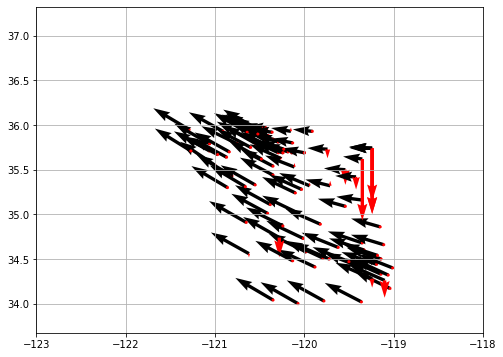

In [ ]:
# make a map with the vectors
fig0=plt.figure(figsize=(8,6))
for ista,sta in enumerate(stalist):
    plt.quiver(gps_loc['longitude'][gps_loc['station']==sta],gps_loc['latitude'][gps_loc['station']==sta],Ve[ista]/100,Vn[ista]/100,scale=1,units='xy')
    plt.quiver(gps_loc['longitude'][gps_loc['station']==sta],gps_loc['latitude'][gps_loc['station']==sta],0,Vu[ista]/50,scale=1,color='r',units='xy')
plt.grid(True)
plt.axis('equal')
plt.xlim(-123,-118)
plt.ylim(32,39)

In [ ]:
# Next activities could be fitting a sinisoidal functions
